In [1]:
setwd("/home/wangjl/data/apa/191111Figure/f3/gDPAU_gPPAU")
getwd()

library(ggplot2)
library(Cairo)
library(pheatmap)


printP=function(...){
  print(paste(...))
}
printP0=function(...){
  print(paste0(...))
}


#1. tools
pP=function(...){  print(paste(...)) }
pP0=function(...){  print(paste0(...)) }
ph=function(...){  print(head(...)) }
pd=function(...){  print(dim(...)) }
pl=function(...){  print(length(...)) }
debug=function(...){
    pd(...)
    ph(...)
}

#2. tools
getDF_fromNamesXX=function(namedXX){
  rs=data.frame(
    name=names(namedXX),
    value=as.numeric(namedXX)
  )
  row.names(rs)=rs$name
  rs=rs[order(-rs$value),]
  print(dim(rs))
  print(head(rs))
  return(rs)
}

[1] "/data/jinwf/wangjl/apa/191111Figure/f3/gDPAU_gPPAU"

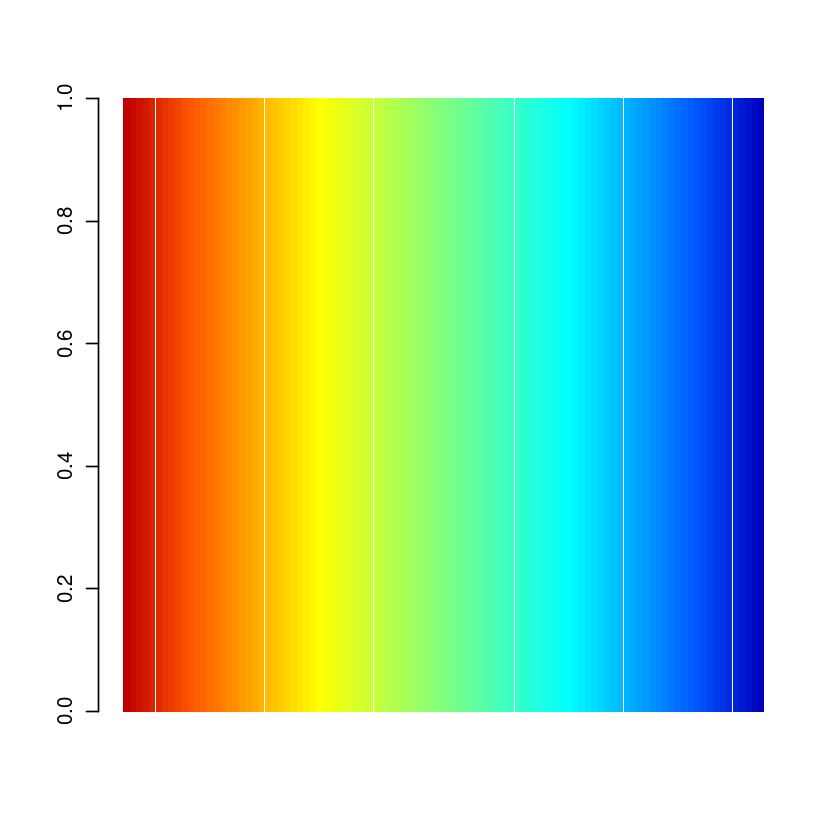

In [2]:
# get color for heaatmap
table.ramp = function (n, mid = 0.5, sill = 0.5, base = 1, height = 1) {
  
  x <- seq(0, 1, length.out = n) #0-1, n number
  y <- rep(0, length(x)) #array of 0
  
  ### define limits of still
  sill.min <- max( c(1, round( (n-1)*(mid-sill/2) ) + 1) ) #14
  sill.max <- min( c(n, round( (n-1)*(mid+sill/2) ) + 1) ) #19
  
  y[sill.min:sill.max] <- 1
  y
  
  base.min <- round( (n-1)*(mid-base/2) ) + 1 #6
  base.max <- round( (n-1)*(mid+base/2) ) + 1 #27
  
  xi <- base.min:sill.min #[1]  6  7  8  9 10 11 12 13 14
  yi <- seq(0, 1, length.out = length(xi))
  # [1] 0.000 0.125 0.250 0.375 0.500 0.625 0.750 0.875 1.000
  
  i <- which(xi > 0 & xi <= n) #[1] 1 2 3 4 5 6 7 8 9
  y[xi[i]] <- yi[i] 
  y
  
  xi <- sill.max:base.max # [1] 19 20 21 22 23 24 25 26 27
  yi <- seq(1, 0, length.out = length(xi))
  #[1] 1.000 0.875 0.750 0.625 0.500 0.375 0.250 0.125 0.000
  
  i <- which(xi > 0 & xi <= n) #[1] 1 2 3 4
  y[xi[i]] <- yi[i]
  y
  
  height * y
  # [1] 0.000 0.000 0.000 0.000 0.000 0.000 0.125 0.250 0.375 0.500 0.625 0.750 0.875
  #  [14] 1.000 1.000 1.000 1.000 1.000 1.000 0.875 0.750 0.625
}


getColors=function(n=100){
  rr=do.call("table.ramp", as.list(c(n, c(0.8, 0.2, 1)))) 
  gg=do.call("table.ramp", as.list(c(n, c(0.5, 0.4, 1)))) 
  bb=do.call("table.ramp", as.list(c(n, c(0.2, 0.2, 1)))) 
  rgb(rr, gg, bb)
}


hmcols=rev(getColors(100))
barplot(rep(1,length(hmcols)), border = NA, col=hmcols)

# load info, apaM

In [3]:
apaSiteFile="/data/jinwf/wangjl/apa/190705PAS/bed/pasPostions_Location_transcriptName-noChrM_noInnerPrime_PY-filterCountCell-motif-Header.bed"
apaMatrixFile="/data/jinwf/wangjl/apa/190705PAS/bed/apa_Matrix_afterFilterByCounts_cell_20222.csv"
#
apaSite=read.table(apaSiteFile, header = T,row.names = 1, stringsAsFactors = F)
row.names(apaSite)=apaSite$PASid
dim(apaSite) #20222 12
apaSite[1:4,]
#                          PASid   chr     pos strand count region transcript                down20   gene
# chr10:320403:-   chr10:320403:- chr10  320403      - 10945   UTR3  DIP2C-201 TGAAAATAGCAGTTTCTTAAT  DIP2
#
apaM=read.csv(apaMatrixFile, header = T,row.names = 1, stringsAsFactors = F)
dim(apaM) #20222 225
head(apaM[, 1:5])
#                c01ROW07 c01ROW12 c01ROW24 c01ROW31 c01ROW35
#chr10:320403:-         0        0       30      159       10
#chr10:855485:-         0        0        0        0       82

[1] 20222    12

PASid           chr   pos     strand count region transcript
chr10:320403:-  chr10:320403:-  chr10  320403 -      10945 UTR3   DIP2C-201 
chr10:855485:-  chr10:855485:-  chr10  855485 -       3583 PA     LARP4B-201
chr10:1085971:- chr10:1085971:- chr10 1085971 -      10905 UTR3   IDI1-201  
chr10:1087286:- chr10:1087286:- chr10 1087286 -        947 exon   IDI1-205  
                down20                gene  
chr10:320403:-  TGAAAATAGCAGTTTCTTAAT DIP2C 
chr10:855485:-  TCAATTTTTCTTTTGATTTTT LARP4B
chr10:1085971:- AAAGTTAAATGTTTGTTAAAT IDI1  
chr10:1087286:- AAAGGAAGAACTAAAAGAACT IDI1  
                up60                                                         
chr10:320403:-  TCTGTGATAACGCCTGTTTTATATTCAAATGAACAAATAAAAGCTTTTATTTTTGTTGCTC
chr10:855485:-  GTGTAAAACTGTCTAATTTGAAAAAAAATGTAGGTTATGAAAATAAAGATTTAGGCACTGT
chr10:1085971:- ACAGATTTATTATTCTTAAATGCTGTATGATAATGAAGAAAAATAAAAATTTATTTCTTGC
chr10:1087286:- TGAGGAAGAATGTAACTTTGAATCCAGATCCCAATGAGATTAAAAGCTATTGTTATGTGTC
                motif  distance
chr10:320403:-  AATAAA 26      
chr10:855485:-  AATAAA 20      
chr10:1085971:- AATAAA 20      
chr10:1087286:- ATTAAA 23

[1] 20222   225

c01ROW07 c01ROW12 c01ROW24 c01ROW31 c01ROW35
chr10:320403:-  0         0        30      159      10      
chr10:855485:-  0         0         0        0      82      
chr10:1085971:- 2        68       101       33       0      
chr10:1087286:- 0         0         0        0       0      
chr10:2153297:- 0         0         0        0       0      
chr10:2276972:- 0         0         0       11       0

In [4]:
## get gene list with multiple polyA sites.
polyAsites.per.gene=(function(){
    gene_df=getDF_fromNamesXX(table(apaSite$gene)) #9455    2
    # remove NA gene name
    colnames(gene_df)=c('gene', 'apaSites')
    gene_df=gene_df[gene_df$gene!='.',] # 9454    2
    gene_df
    #debug(gene_df) 
})()
debug(polyAsites.per.gene) #9454    2

[1] 9455    2
           name value
.             .  1560
MALAT1   MALAT1    46
EGFR       EGFR    40
NCL         NCL    32
ANKRD11 ANKRD11    21
DEK         DEK    21
[1] 9454    2
           gene apaSites
MALAT1   MALAT1       46
EGFR       EGFR       40
NCL         NCL       32
ANKRD11 ANKRD11       21
DEK         DEK       21
TAX1BP1 TAX1BP1       21


In [1049]:
gene1site=rownames( polyAsites.per.gene[which(polyAsites.per.gene$apaSites==1),] )
length(gene1site)
writeLines(gene1site, 'gene1site.gene.txt')

[1] 5351

## load cell info

In [5]:
# cell info
cellFile="/home/wangjl/data/apa/190530Mix/cellInfo.V4.txt"
cellInfo=read.csv(cellFile, row.names = 1, stringsAsFactors = F)
dim(cellInfo) #225 6
head(cellInfo)

[1] 225   6

geneNumber countsPerCell countsPerGene cellType  cellCycle
c01ROW24 5693       1950601       342.6315      HeLa_sync G2M      
c01ROW35 6768       3048970       450.4979      HeLa_sync M        
c01ROW31 6542       2783703       425.5125      HeLa_sync S        
c05ROW02 6012       1263249       210.1213      HeLa_sync S        
c05ROW14 5853       1313664       224.4428      HeLa_sync S        
c05ROW19 4372        493417       112.8584      HeLa_sync S        
         cellType2   
c01ROW24 HeLa_syncMix
c01ROW35 HeLa_syncMix
c01ROW31 HeLa_syncMix
c05ROW02 HeLa_syncMix
c05ROW14 HeLa_syncMix
c05ROW19 HeLa_syncMix

In [73]:
cid.BC=rownames(cellInfo[which( substr(cellInfo$cellType,0,2)=="BC" ),])
pl(cid.BC)

[1] 169


In [74]:
cid.HeLa=rownames(cellInfo[which( substr(cellInfo$cellType,0,2)=="He" ),])
pl(cid.HeLa)

[1] 56


In [1569]:
table(cellInfo$cellType)


       BC_0        BC_1 HeLa_normal   HeLa_sync 
         87          82          29          27 

## load RNA expression level, rnaM

In [8]:
# RNA expression level
rnaFile="/home/wangjl/data/apa/190530Mix/BC_HeLa.225cells.count.V3.csv"
rnaM=read.csv(rnaFile, row.names = 1, stringsAsFactors = F)
dim(rnaM) #18679 225
rnaM[1:5,1:5]

[1] 18679   225

c01ROW24 c01ROW35 c01ROW31 c05ROW02 c05ROW14
A1BG-AS1 0        0        0        0        0       
A2M      0        0        0        0        0       
A2M-AS1  0        0        0        0        0       
A2ML1    0        0        0        0        0       
A2MP1    0        0        0        0        0

In [9]:
rnaM.cpm=apply(rnaM, 2, function(x){
    1e6*x/sum(x)
})
rnaM.cpm[1:5,1:5]

c01ROW24 c01ROW35 c01ROW31 c05ROW02 c05ROW14
A1BG-AS1 0        0        0        0        0       
A2M      0        0        0        0        0       
A2M-AS1  0        0        0        0        0       
A2ML1    0        0        0        0        0       
A2MP1    0        0        0        0        0

In [10]:
rnaM.log2cpm=apply(rnaM.cpm, 2, function(x){
    log2(x+1)
})
rnaM.log2cpm[1:5,1:5]

c01ROW24 c01ROW35 c01ROW31 c05ROW02 c05ROW14
A1BG-AS1 0        0        0        0        0       
A2M      0        0        0        0        0       
A2M-AS1  0        0        0        0        0       
A2ML1    0        0        0        0        0       
A2MP1    0        0        0        0        0

### order gene by cpm sum

In [1003]:
# order gene by cpm sum
orderedGeneNames=getDF_fromNamesXX( apply(rnaM.cpm,1,sum) )
colnames(orderedGeneNames)=c('gene', 'cpm')
head(orderedGeneNames, n=10)

[1] 18679     2
           name   value
MT-ATP6 MT-ATP6 9736716
MT-ND4   MT-ND4 9458798
MT-RNR2 MT-RNR2 6361875
MT-CO2   MT-CO2 5284310
MT-CYB   MT-CYB 4837817
MT-CO3   MT-CO3 4674185


gene     cpm    
MT-ATP6  MT-ATP6  9736716
MT-ND4   MT-ND4   9458798
MT-RNR2  MT-RNR2  6361875
MT-CO2   MT-CO2   5284310
MT-CYB   MT-CYB   4837817
MT-CO3   MT-CO3   4674185
MT-CO1   MT-CO1   2828872
MTCO1P12 MTCO1P12 1350757
PTMA     PTMA     1323428
MALAT1   MALAT1   1269465

[1] 2

In [ ]:
#cor between sc and bulk
(function(){
    #
    bulk1=read.table("/home/wangjl/data/apa/bulk/htseq/bulkP1_R2.bam.count", row.names = 1,header = F)
    colnames(bulk1)="bulkP1"
    pd(bulk1) #18679   225
    head(bulk1)


    bulk2=read.table("/home/wangjl/data/apa/bulk/htseq/bulkP2_R2.bam.count", row.names = 1,header = F)
    colnames(bulk2)="bulkP2"
    pd(bulk2)
    head(bulk2)
    
    bulkAll0=cbind(bulk1,bulk2)
    head(bulkAll0)
    
    #
    getNormalizedCts <- function ( cts ) {
      #cts <- read.table ( ctsPath , header = T , as.is = T )
      apply ( cts , 2 , function ( x ) { log2 ( ( 10^6 ) * x / sum ( x ) + 1 ) })
    }
    
    bulkAll=getNormalizedCts(bulkAll0)
    bulkAll=as.data.frame(bulkAll)
    head(bulkAll)
    
    ## cor of bulk1 and bulk2
    #cor1=cor(bulkAll$bulkP1, bulkAll$bulkP2); cor1 #0.9858327

    cor1.test=cor.test(bulkAll$bulkP1, bulkAll$bulkP2); cor1.test
    #########
    gene.common=intersect(rownames(orderedGeneNames), rownames(bulkAll))
    orderedGeneNames=orderedGeneNames[gene.common,]
    bulkAll=bulkAll[gene.common,]
    ph(orderedGeneNames)
    ph(bulkAll)
    #
    cor1=cor( log2(1+orderedGeneNames$cpm/225), bulkAll$bulkP2); print(cor1)
    
    library(ggplot2)
    g=ggplot(NULL, aes(bulkAll$bulkP2, log2(1+orderedGeneNames$cpm/225) ) )+theme_classic()+
      geom_point(size=0.02, alpha=0.1)+
      geom_text(aes(x=0,y=14,label=paste0("Rp=", round(cor1[1],3) ) ),hjust=0 )+  
      labs(x="BC bulk", y="BC pool sc",title="Correlation of gene counts\n(sum normalized and log2 scaled counts)")
    CairoPDF('../../f1/bulk/bulk_PoolSC.cor.pdf', width=4,height=4)
    print(g)
    dev.off()
    print('==end==')
})()

In [1562]:
getwd()

[1] "/data/jinwf/wangjl/apa/191111Figure/f3/gDPAU_gPPAU"

### DE RNA in HeLa

In [417]:
table(cellInfo$cellType)


       BC_0        BC_1 HeLa_normal   HeLa_sync 
         87          82          29          27 

Warning message:
“Removed 1741 rows containing missing values (geom_point).”


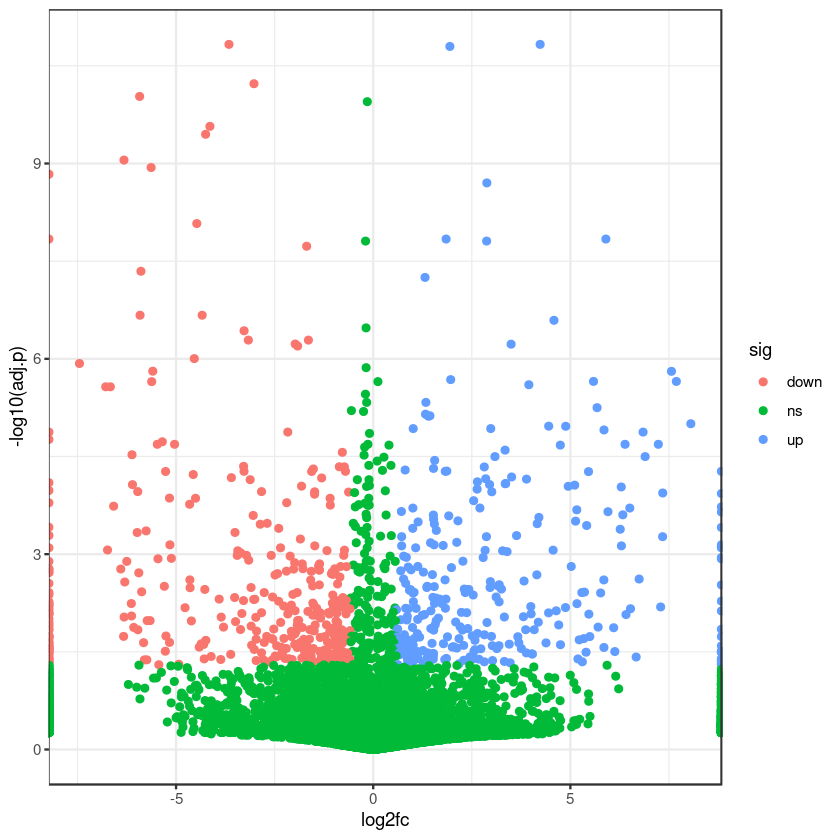

In [427]:
getDEG=function(df, cid.A, cid.B){
    #df=rnaM.log2cpm[,cid.HeLa]
    keep=apply(df, 1, sum)>0
    df=df[keep,]


    ###
    tmp_df=NULL;
    for(i in 1: nrow(df)){
        gene=rownames(df)[i]
        a=as.numeric( df[gene, cid.A] )
        b=as.numeric( df[gene, cid.B] )
        
        p=1
        if(length(a)>=2 & length(b)>=2 ){
            p=t.test(a,b)$p.value;
        }
        tmp_df=rbind(tmp_df, data.frame(
            gene=gene,
            fc=mean(a)/mean(b),
            p=p
        ))
    }
    rownames(tmp_df)=tmp_df$gene;
    tmp_df$adj.p=p.adjust(tmp_df$p, method = 'fdr')
    tmp_df$log2fc=log2(tmp_df$fc);
    tmp_df=tmp_df[order(tmp_df$adj.p),]
    #
    tmp_df$sig="ns";
    tmp_df[which(tmp_df$adj.p<0.05 & tmp_df$log2fc >log2(1.5) ),]$sig="up";
    tmp_df[which(tmp_df$adj.p<0.05 & tmp_df$log2fc < (-log2(1.5) ) ),]$sig="down";
    #
    head(tmp_df);
    g=ggplot(tmp_df, aes(log2fc, -log10(adj.p), color=sig))+geom_point()+theme_bw()
    print(g)
    
    #save to file
    write.table(tmp_df, "../DEG/HeLa_sync_vs_normal.txt")
    writeLines(rownames(tmp_df[which(tmp_df$sig=="up"),]), '../DEG/HeLa_sync_vs_normal.up.gene')
    writeLines(rownames(tmp_df[which(tmp_df$sig=="down"),]), '../DEG/HeLa_sync_vs_normal.down.gene')
    #
    return(tmp_df)
}

#
cid.A=rownames(cellInfo[which(cellInfo$cellType=="HeLa_sync"),])
cid.B=rownames(cellInfo[which(cellInfo$cellType=="HeLa_normal"),])
DEG.HeLa=getDEG(rnaM.log2cpm, cid.A, cid.B)

In [432]:
head(DEG.HeLa, n=10)

gene   fc          p            adj.p        log2fc     sig 
ACTA2  ACTA2  18.81454049 1.749550e-15 1.481694e-11  4.2337761 up  
KRT19  KRT19   0.07921818 1.003213e-15 1.481694e-11 -3.6580246 down
COL1A1 COL1A1  3.84992379 2.821865e-15 1.593225e-11  1.9448299 up  
MT-TT  MT-TT   0.12292960 1.406249e-14 5.954762e-11 -3.0240958 down
AZGP1  AZGP1   0.01647271 2.755713e-14 9.335252e-11 -5.9237779 down
PTMA   PTMA    0.90153103 3.979807e-14 1.123499e-10 -0.1495509 ns  
S100A7 S100A7  0.05668895 1.111609e-13 2.689776e-10 -4.1407887 down
EPCAM  EPCAM   0.05253291 1.681657e-13 3.560489e-10 -4.2506346 down
S100A9 S100A9  0.01251293 4.705561e-13 8.855865e-10 -6.3204364 down
S100A8 S100A8  0.02016634 6.811420e-13 1.153718e-09 -5.6319066 down

In [431]:
table(DEG.HeLa$sig)


 down    ns    up 
  368 18018   293 

# gDPAU

## simulation stratege to cope with zero devision error

[1] 0.1720157

[1] 2.244929

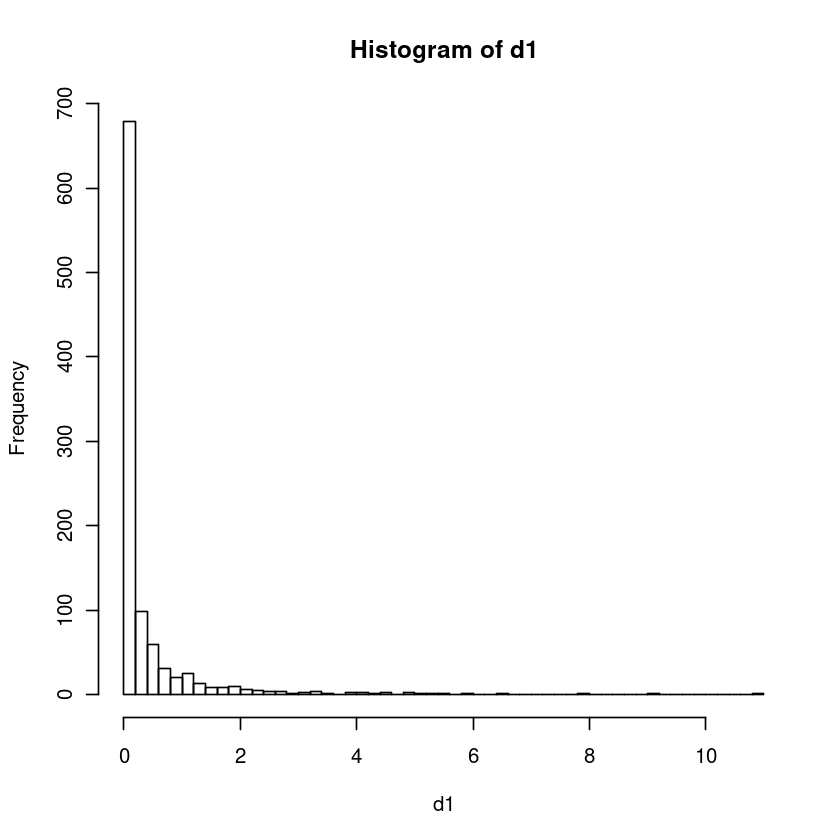

In [12]:
# Gamma distribution
a=0.2;b=2;d1=rgamma(1000, shape=a, scale=b);hist(d1, n=50)
m1=mean(d1);#m1
v1=var(d1);#v1
#
m1**2/v1 #a
v1/m1 #b

           p1         p2
3  0.80000000 0.20000000
7  0.93333333 0.06666667
8  0.00000000 1.00000000
11 0.00000000 1.00000000
14 0.06666667 0.93333333
19 1.00000000 0.00000000
           p1         p2     ratio
3  0.80000000 0.20000000 0.6666667
7  0.93333333 0.06666667 0.5517241
8  0.00000000 1.00000000 2.0000000
11 0.00000000 1.00000000 2.0000000
14 0.06666667 0.93333333 1.8125000
19 1.00000000 0.00000000 0.5000000


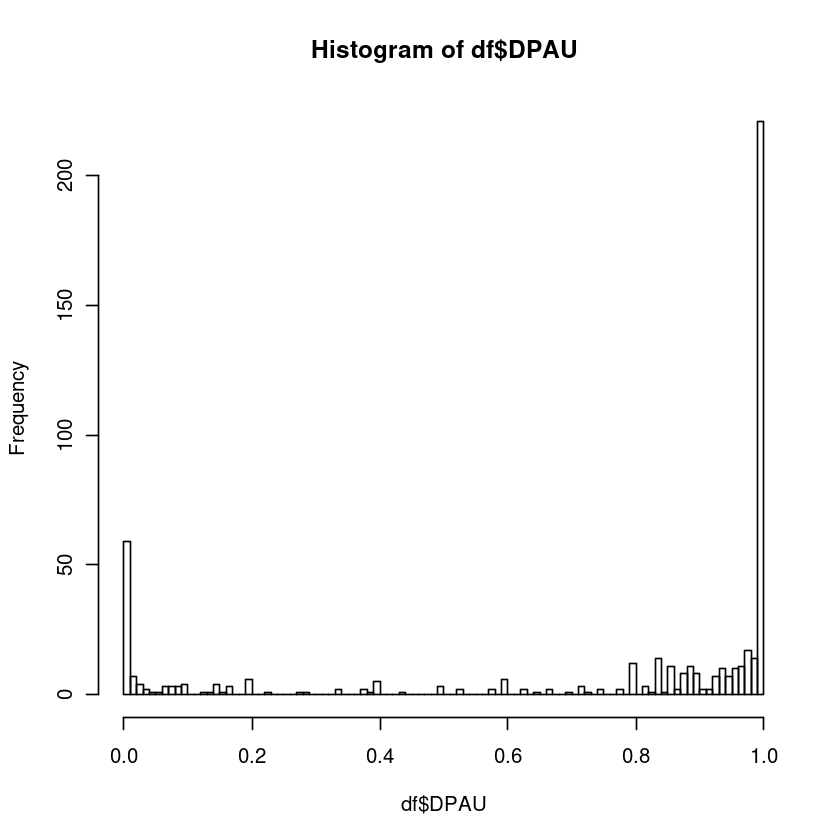

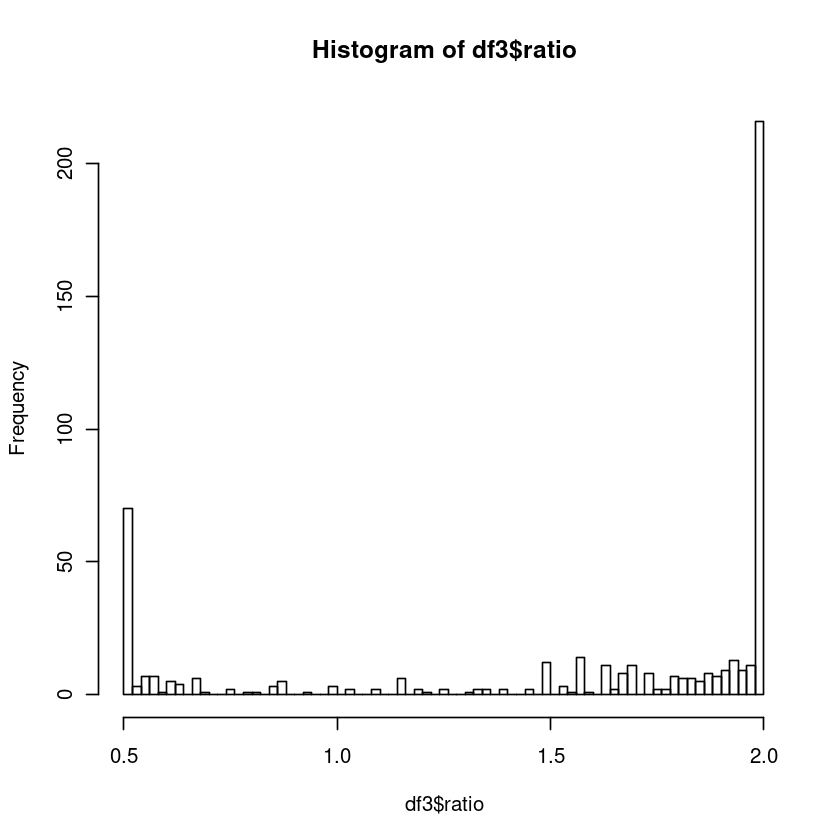

In [13]:
# simulation
getDPAU_Simulation=function(para, debug=F){
  #set.seed(21)
  n=3000
  #rdm=rbinom(n*2, 2000,0.0003);
  a1=data.frame(
    p1=rgamma(n, para[1]),
    p2=rgamma(n, para[2]) #rbinom(n, 200,0.003)
  )
  fn_nom=function(x){
    round( (x-min(x))/ (max(x)-min(x)) * 300 )
  }
  #
  a1$p1=fn_nom(a1$p1)+rpois(n, 0.5)
  a1$p2=fn_nom(a1$p2)+rpois(n, 0.5)
  
  #remove less than 5
  keep= (a1$p1+a1$p2)>=5
  a1=a1[keep,]
  #print(dim(a1))
  a1$DPAU=a1$p2 / (a1$p1+a1$p2)
  #remove na
  a1=a1[complete.cases(a1),]
  
  if(debug){
      #print(dim(a1))
      #print(head(a1))

      #print(a1[is.na(a1),])

      par(mfrow=c(2,1), mar=c(3,2,1,1))
      hist(a1$DPAU, n=100, main="Simulation of DPAU")
      plot(density(a1$DPAU), main="Simulation of DPAU")
  }
  #ks.test(a1$p1, a1$p2)
  return(a1)
}


############
(function(){
    #set.seed(21)
    DPAU.simulation1=getDPAU_Simulation(c(0.05,0.05)) #50
    DPAU.simulation2=getDPAU_Simulation(c(0.015,0.05)) #100
    DPAU.simulation3=getDPAU_Simulation(c(0.03,0.015)) #0
    #
    dim(DPAU.simulation1)
    dim(DPAU.simulation2)
    dim(DPAU.simulation3)
    #
    head(DPAU.simulation1)
    #
    df=DPAU.simulation2
    hist(df$DPAU, n=100)
    
    # count to pct;
    df2=t( apply(df[,c(1,2)],1,function(x){x/sum(x)}) )
    ph(df2)
    
    ###################
    delta=1 #when delta changed, the ratio remains, but the x axis xpanded
    ###################
    # [0,1] - > [ (0+delta)/(1+delta),  (1+delta)/(0+delta)  ]
    df3=df2;
    ratio=apply(df2,1,function(x){
        (x[2]+delta)/(x[1]+delta)
    })
    
    ratio2=as.numeric(ratio)
    df3=cbind(df3,'ratio'=ratio2)
    df3=as.data.frame(df3)
    ph(df3)
    hist(df3$ratio, n=100)
    #
})()

## get gDPAU, gPPAU, gRatio

In [714]:
## get gDPAU
getGeneralRatio_Long_vs_Short=function(Debug=F){    
    gene.set1=unique(apaSite$gene)
    pl(gene.set1) #9455
    
    ###############
    # step1 filter and get gene list with multiple polyA sites.
    gene_df=getDF_fromNamesXX(table(apaSite$gene)) #9455    2
    # remove NA gene name
    colnames(gene_df)=c('gene', 'apaSites')
    gene_df=gene_df[gene_df$gene!='.',] # 9454    2
    #remove 1 site
    gene_df2=gene_df[which(gene_df$apaSites>1),] #4103    2
    
    ###############
    #step2 get gDPAU
    #w=1
    gDPAU=NULL;
    gPPAU=NULL;
    gRatio=NULL;
    for(gene in rownames(gene_df2)){
        #w=w+1
        #if(w>30)break;
        
        #(1) use gene name to get its polyA sites
        polyA.sites=apaSite[which(apaSite$gene==gene),]
        #(2) order the polyA site
        if(polyA.sites[1,'strand']=="+"){
            polyA.sites=polyA.sites[order(polyA.sites$pos),]
        }else{
            polyA.sites=polyA.sites[order(-polyA.sites$pos),]
        }
        #print(polyA.sites[, -c(1,7,8,10)])
        polyA.list=rownames(polyA.sites)
        #(3) get apaM of this gene by polyA.list
        apaM.gene=apaM[polyA.list,]
        #(4) calculate a gene's gDPAU, gPPAU in each cell, filter genes whose read count at all polyA sites of this gene is less than 5
        # rename as NA, or 0? 0 will be better I think
        gD.tmp=NULL;
        gP.tmp=NULL;
        gR.tmp=NULL;
        for(cid in colnames(apaM.gene)){
            apaCounts.cell=as.numeric(apaM.gene[,cid]);
            gD=0;gP=0;gR=0;
            if(sum(apaCounts.cell)>=5){ #less than 5, gD, gP=NA will not chanage;
                # for genes whose apa reads larger than 5, add one reads for all polyA sites to eliminate 0 division later
                #apaCounts.cell=apaCounts.cell+1
                # counts to pct
                apaCounts.cell.pct=apaCounts.cell/sum(apaCounts.cell);
                n=length(apaCounts.cell.pct);
                for(i in 1:length(apaCounts.cell.pct)){
                    gD=gD+ (i-1)*apaCounts.cell.pct[i]
                    gP=gP+ (n-i)*apaCounts.cell.pct[i]
                }
                gD=gD/(n-1);
                gP=gP/(n-1);
                gR=gD/gP;
            }else{
                gD=NA;gP=NA;gR=NA;
            }
            #
            gD.tmp=c(gD.tmp, gD);
            gP.tmp=c(gP.tmp, gP);
            gR.tmp=c(gR.tmp, gR);
        }
        
        #(5) name gDPAU, and combine to data.frame
        nameArr=function(arr){
             names(arr)=colnames(apaM);
            arr=as.data.frame( t(arr) )
             rownames(arr)=gene;
            return(arr)
        }
        gDPAU=rbind(gDPAU, nameArr(gD.tmp));
        gPPAU=rbind(gPPAU, nameArr(gP.tmp));
        gRatio=rbind(gRatio, nameArr(gR.tmp));
    }
    # check
    if(Debug){
        print(gDPAU[,1:5])
        print(gPPAU[,1:5])
        print(gRatio[,1:5])
    }
    
    return(list('gDPAU'=gDPAU, 'gPPAU'=gPPAU, 'gRatio'=gRatio))
}

GeneralRatio_Long_vs_Short=getGeneralRatio_Long_vs_Short() #time consuming: 10:31 - 10:35

[1] 9455
[1] 9455    2
           name value
.             .  1560
MALAT1   MALAT1    46
EGFR       EGFR    40
NCL         NCL    32
ANKRD11 ANKRD11    21
DEK         DEK    21


In [715]:
# check
length(GeneralRatio_Long_vs_Short)
gDPAU=GeneralRatio_Long_vs_Short[['gDPAU']]
dim(gDPAU) #4103 225
#
gPPAU=GeneralRatio_Long_vs_Short[['gPPAU']]
dim(gPPAU)
#
gRatio=GeneralRatio_Long_vs_Short[['gRatio']]
dim(gRatio)

head(gRatio[,1:10])

[1] 3

[1] 4103  225

[1] 4103  225

[1] 4103  225

c01ROW07  c01ROW12  c01ROW24  c01ROW31   c01ROW35   c04ROW06  
MALAT1  0.6141229 0.5459839 0.5881301  0.5652401  0.5005334  0.5943068
EGFR           NA        NA        NA         NA 31.0666667 18.5000000
NCL     1.6421417 2.2553191 2.8801325  4.7370929  2.0743138  2.8601533
ANKRD11 9.4731861 0.5420928        NA  0.9246120  0.8706574  1.5441696
DEK     1.8984064 1.1885522 4.4691689  0.3382443  1.6183844  0.4920369
TAX1BP1 0.5050427 0.5537489 0.7575659 22.4523810  0.6361121  0.7903930
        c04ROW14  c05ROW02  c05ROW14  c05ROW19
MALAT1  0.6380465 0.5311970 0.5656798 0.885761
EGFR           NA        NA        NA       NA
NCL     1.3898305 3.6845034 2.6479419 1.949260
ANKRD11 1.2222222 0.4662757 1.0452311 1.649842
DEK     1.3653396 2.6909871 1.1052632 1.401372
TAX1BP1 4.4501217 0.8895801 0.7781852 1.733485

In [716]:
table(is.na(gDPAU))
table(is.na(gPPAU))
table(is.na(gRatio))


 FALSE   TRUE 
481676 441499 


 FALSE   TRUE 
481676 441499 


 FALSE   TRUE 
481676 441499 

In [717]:
## filter out all NA genes
keep=apply(gRatio, 1, function(x){
    sum(!is.na(x))
})
table(keep<10)
table(keep==0) #no all NA genes


FALSE  TRUE 
 4096     7 


FALSE 
 4103 

In [718]:
#save to files
fn_saveListToFile=function(sourcelist, output){
    write.table(sourcelist[['gDPAU']], paste0(output, "01_generalDPAU.txt"), quote = F)
    write.table(sourcelist[['gPPAU']], paste0(output,"02_generalPPAU.txt"), quote = F)
    write.table(sourcelist[['gRatio']], paste0(output,"03_generalRatio_long_vs_short.txt"), quote = F)
}
fn_saveListToFile(GeneralRatio_Long_vs_Short, output="Matrix_")

## gRatio

In [719]:
# order by RNA level
gRatio=gRatio[   intersect( rownames(orderedGeneNames), rownames(gRatio))   ,]
dim(gRatio)
gRatio[1:10,1:10]

[1] 4038  225

c01ROW07     c01ROW12     c01ROW24     c01ROW31     c01ROW35    
PTMA   1.718261e+01   10.2898273    3.5585419    2.6655238    2.1568434
FTH1   2.457490e+00    1.0000000    1.1663717    2.0914634    2.8930818
RPS11  1.070300e+04 1639.0000000 3049.0000000 3470.0000000 3422.0000000
MALAT1 6.141229e-01    0.5459839    0.5881301    0.5652401    0.5005334
GAPDH           Inf          Inf          Inf  123.1851852 1664.0000000
RPS27A 3.969453e+00    3.9785254    3.9084249    4.0000000    3.9564772
RPS14  2.011666e+00    1.9901639    1.9966216    2.0055096    2.0087719
RPS19  1.000000e+00    1.0000000    1.0000000    1.0000000    1.1327434
RPL5   1.409286e+02  167.8235294  124.6500000   25.4254279   24.8095238
UBB    5.540000e+03          Inf 7001.0000000          Inf          Inf
       c04ROW06     c04ROW14     c05ROW02     c05ROW14     c05ROW19
PTMA      5.5619390   12.2453988    6.7700831    6.0022026 2.400000
FTH1      0.9944134    1.1428571    0.9622642    1.0363636 1.000000
RPS11  5423.0000000 4463.0000000 1747.0000000          Inf      Inf
MALAT1    0.5943068    0.6380465    0.5311970    0.5656798 0.885761
GAPDH           Inf          Inf 7233.0000000          Inf      Inf
RPS27A    3.9887892    3.9498495    3.8946958    3.9452954 4.000000
RPS14     1.9743316    2.0000000    1.9963746    2.1311301 2.000000
RPS19     1.0000000    1.0000000    1.0000000    1.0000000 1.000000
RPL5   1934.5000000          Inf   66.5937500   84.0000000      Inf
UBB             Inf          Inf          Inf 1240.6000000      Inf

### zero distribution(means not detectable)

In [720]:
table(is.na(gRatio))


 FALSE   TRUE 
476131 432419 

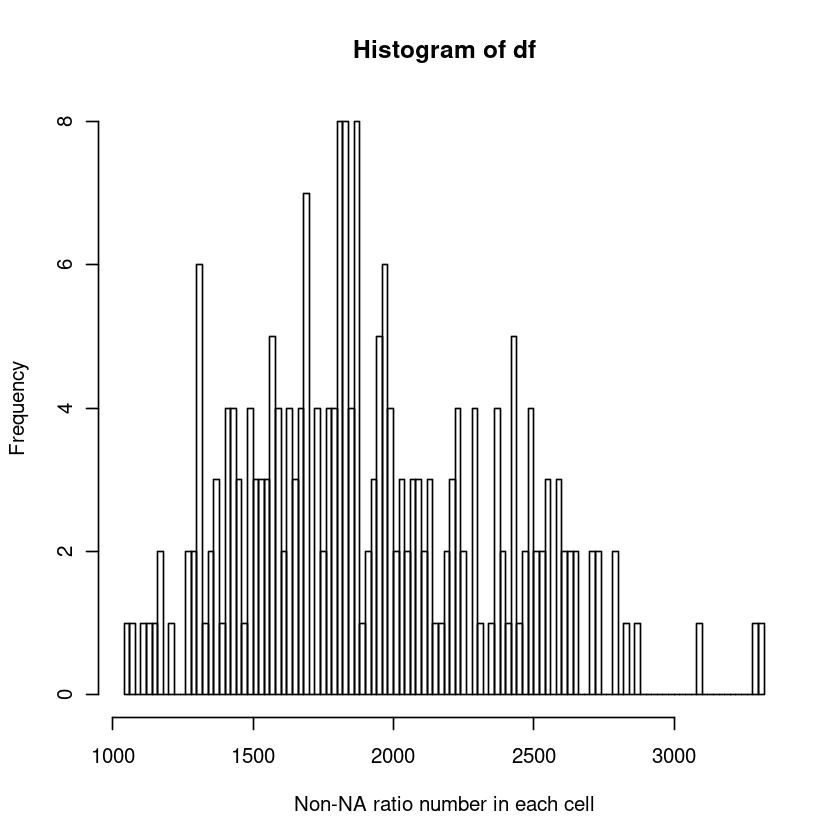

In [721]:
# 0 in each cell
(function(){
    df=apply(gRatio, 2, function(x){
        sum( is.na(x))
    })
    hist(df, n=100, xlab="Non-NA ratio number in each cell")
})()

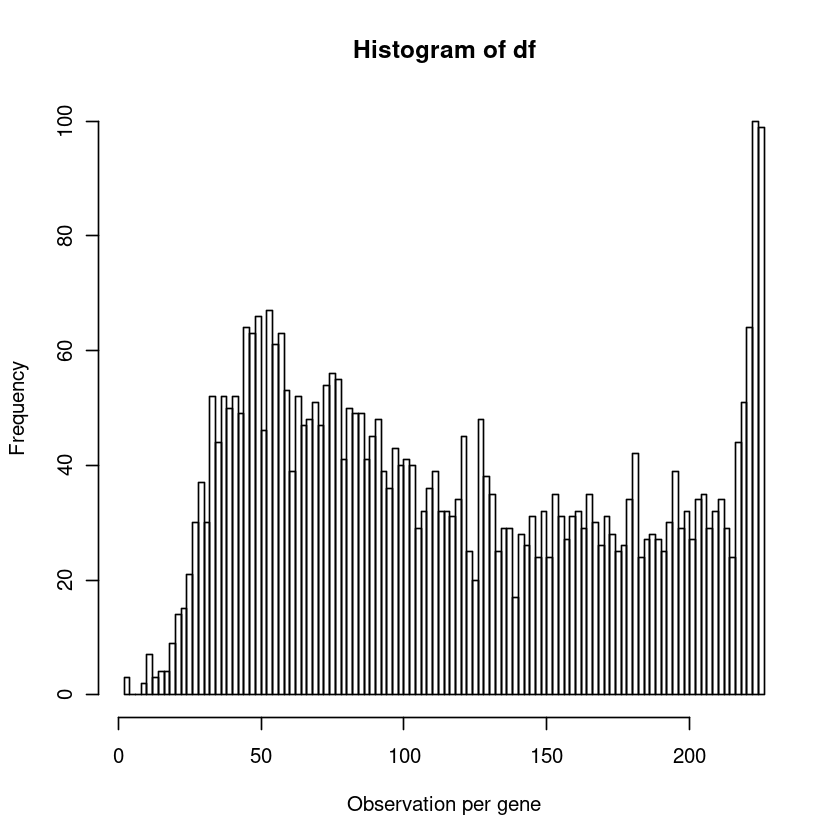

In [724]:
# non-NA in each cell
(function(){
    df=apply(gRatio, 1, function(x){
        sum(! is.na(x))
    })
    hist(df, n=100, xlab="Observation per gene")
})()

### distribution of gRatio in each cell

In [725]:
(function(){
    df=gRatio
    
    df[sapply(df,is.infinite)]<-2e4;
    max(df, na.rm = T) #17843
})()
gRatio[sapply(gRatio,is.infinite)]<-2e4;

gRatio[1:5,1:10]
table(is.na(gRatio))

min(gRatio, na.rm = T) #0
max(gRatio, na.rm = T) #Inf
#
min(gDPAU, na.rm = T) #0
max(gDPAU, na.rm = T) #1

[1] 20000

c01ROW07     c01ROW12     c01ROW24     c01ROW31     c01ROW35    
PTMA   1.718261e+01 1.028983e+01 3.558542e+00    2.6655238    2.1568434
FTH1   2.457490e+00 1.000000e+00 1.166372e+00    2.0914634    2.8930818
RPS11  1.070300e+04 1.639000e+03 3.049000e+03 3470.0000000 3422.0000000
MALAT1 6.141229e-01 5.459839e-01 5.881301e-01    0.5652401    0.5005334
GAPDH  2.000000e+04 2.000000e+04 2.000000e+04  123.1851852 1664.0000000
       c04ROW06     c04ROW14     c05ROW02     c05ROW14     c05ROW19   
PTMA   5.561939e+00 1.224540e+01    6.7700831 6.002203e+00 2.40000e+00
FTH1   9.944134e-01 1.142857e+00    0.9622642 1.036364e+00 1.00000e+00
RPS11  5.423000e+03 4.463000e+03 1747.0000000 2.000000e+04 2.00000e+04
MALAT1 5.943068e-01 6.380465e-01    0.5311970 5.656798e-01 8.85761e-01
GAPDH  2.000000e+04 2.000000e+04 7233.0000000 2.000000e+04 2.00000e+04


 FALSE   TRUE 
476131 432419 

[1] 0

[1] 20000

[1] 0

[1] 1

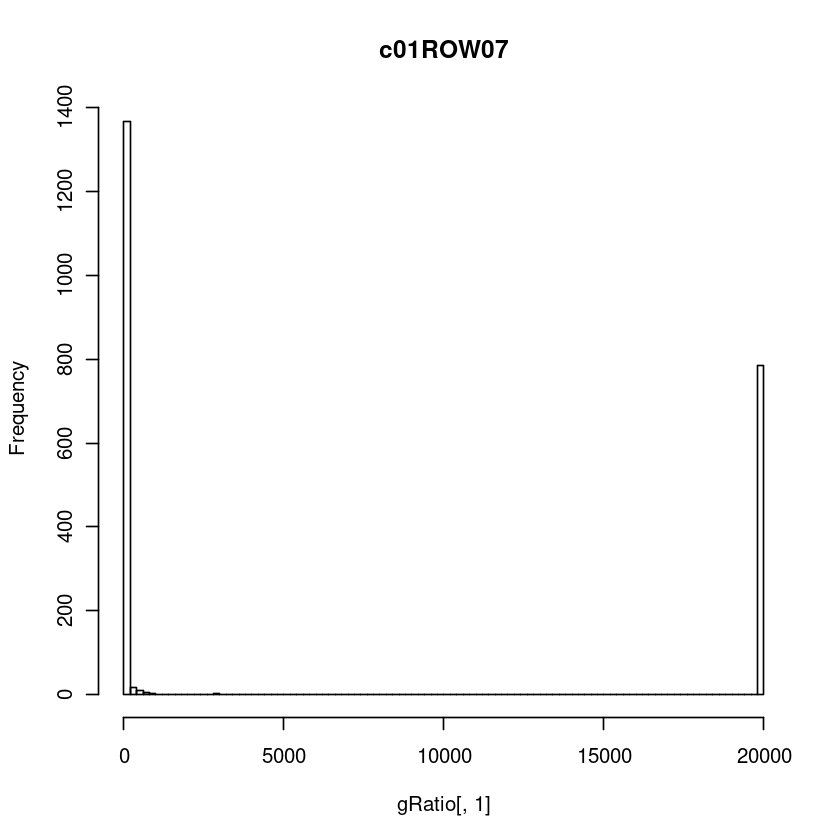

In [726]:
hist(gRatio[,1], n=100, main=colnames(gRatio)[1])

[1] "1 c01ROW07"
[1] "2 c01ROW12"
[1] "3 c01ROW24"
[1] "4 c01ROW31"
[1] 225


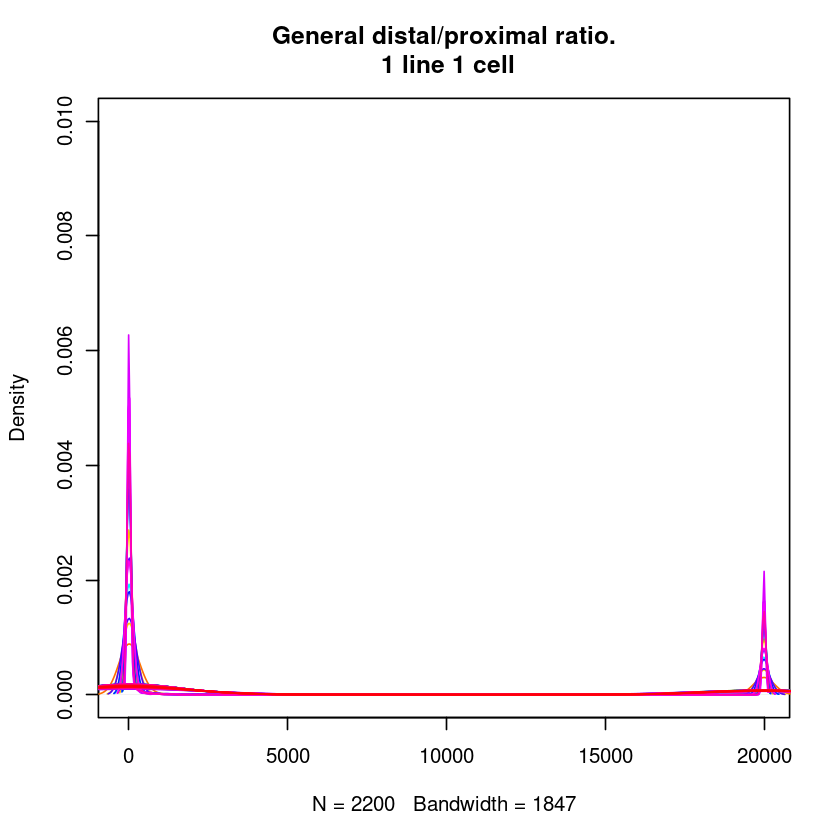

In [727]:
# 1 cell 1 line
plot(density(gRatio[, 1], na.rm = T),xlim=c(-150,20000), ylim=c(0,0.01), 
     main="General distal/proximal ratio.\n 1 line 1 cell",
     col=rainbow(ncol(gRatio))[1])
#
for(i in 1:ncol(gRatio)){
    cid=colnames(gRatio)[i]
    if(i<5)pP(i, cid)
    lines(density(gRatio[, cid], na.rm = T), col=rainbow(ncol(gRatio))[i])
}
print(i)

> Gamma distribution, when alpha<=1

[1] "1 c12ROW02"
[1] "2 c12ROW03"
[1] "3 c12ROW04"
[1] "4 c12ROW05"
[1] 169


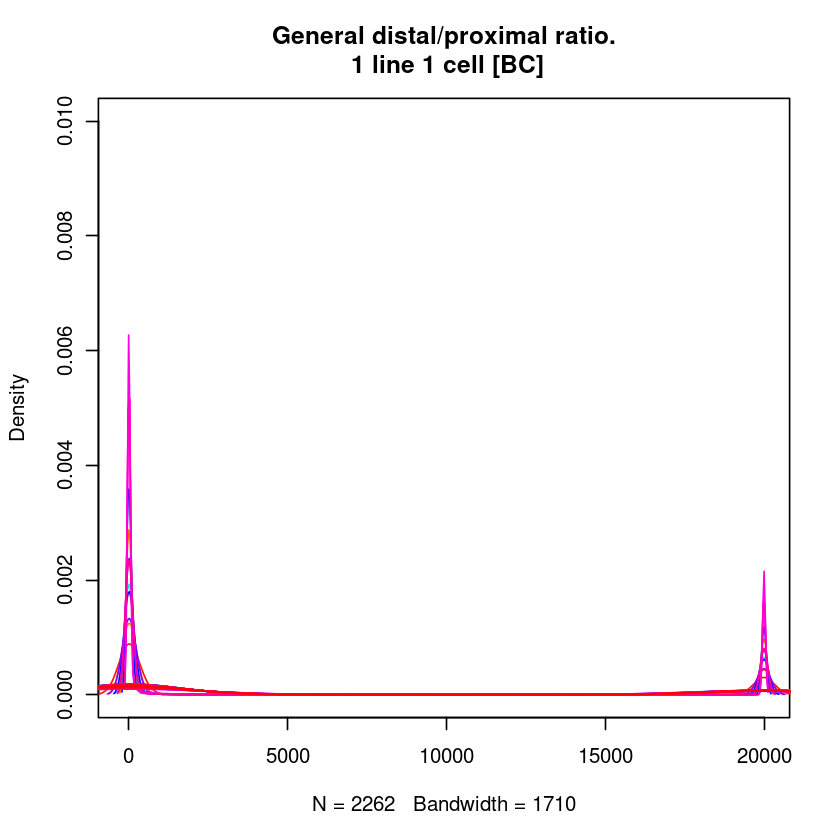

In [728]:
# 1 cell 1 line, BC
(function(){
    cids.BC=rownames(cellInfo[which( substr(cellInfo$cellType,0,2)=="BC" ),])
    df=gRatio[,cids.BC]
    plot(density(df[, 1], na.rm = T),xlim=c(-150,20000), ylim=c(0,0.01), 
         main="General distal/proximal ratio.\n 1 line 1 cell [BC]",
         col=rainbow(ncol(df))[1])
    #
    for(i in 1:ncol(df)){
        cid=colnames(df)[i]
        if(i<5)pP(i, cid)
        lines(density(df[, cid], na.rm = T), col=rainbow(ncol(df))[i])
    }
    print(i)
})()

[1] "1 c01ROW24"
[1] "2 c01ROW35"
[1] "3 c01ROW31"
[1] "4 c05ROW02"
[1] 56


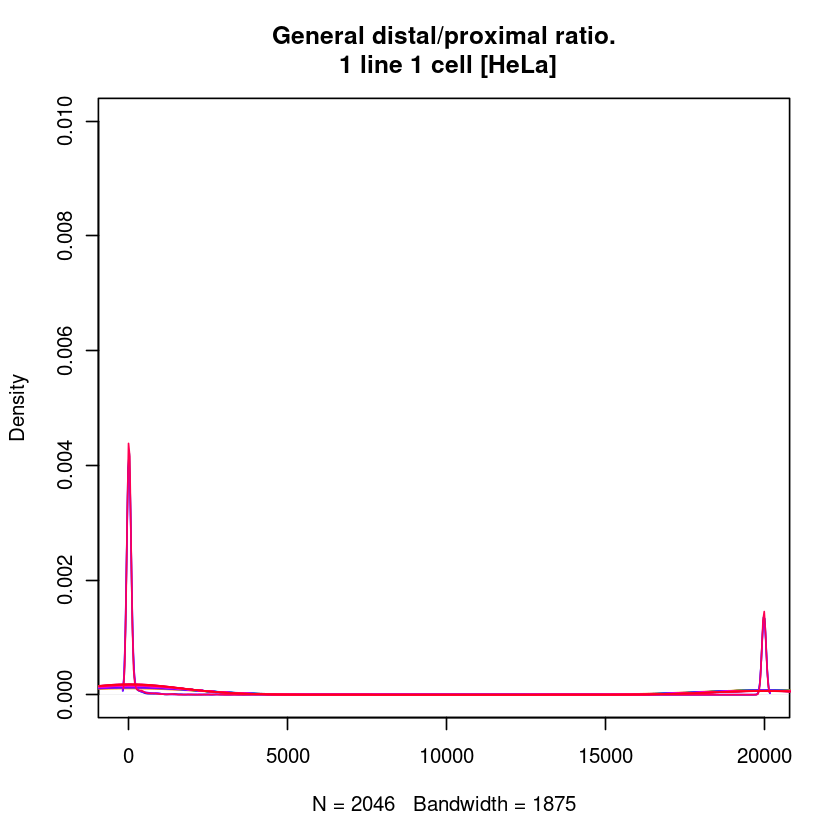

In [729]:
# 1 cell 1 line, HeLa
(function(){
    cids.HeLa=rownames(cellInfo[which( substr(cellInfo$cellType,0,2)=="He" ),])
    df=gRatio[,cids.HeLa]
    plot(density(df[, 1], na.rm = T),xlim=c(-150,20000), ylim=c(0,0.01), 
         main="General distal/proximal ratio.\n 1 line 1 cell [HeLa]",
         col=rainbow(ncol(df))[1])
    #
    for(i in 1:ncol(df)){
        cid=colnames(df)[i]
        if(i<5)pP(i, cid)
        lines(density(df[, cid], na.rm = T), col=rainbow(ncol(df))[i])
    }
    print(i)
})()

### distribution of gRatio in each gene

In [730]:
## order gene by RNA expression DESC
get00_subGRatio=function(){
    gene.common=intersect(rownames(orderedGeneNames), rownames(gRatio))
    print(setdiff(rownames(gRatio), rownames(orderedGeneNames))) # psudo genes has been filtered in RNA expression matrix. should or not?
    
    #pl(gene.common) #4038
    #ph(orderedGeneNames, n=20)
    #ph(gene.common)
    
     gRatio[gene.common,]
}
pd(gRatio)
gRatio2=get00_subGRatio()
pd(gRatio2)
ph(gRatio2[,1:4])

pd(gRatio)

[1] 4038  225
character(0)
[1] 4038  225
           c01ROW07     c01ROW12     c01ROW24     c01ROW31
PTMA   1.718261e+01 1.028983e+01 3.558542e+00    2.6655238
FTH1   2.457490e+00 1.000000e+00 1.166372e+00    2.0914634
RPS11  1.070300e+04 1.639000e+03 3.049000e+03 3470.0000000
MALAT1 6.141229e-01 5.459839e-01 5.881301e-01    0.5652401
GAPDH  2.000000e+04 2.000000e+04 2.000000e+04  123.1851852
RPS27A 3.969453e+00 3.978525e+00 3.908425e+00    4.0000000
[1] 4038  225


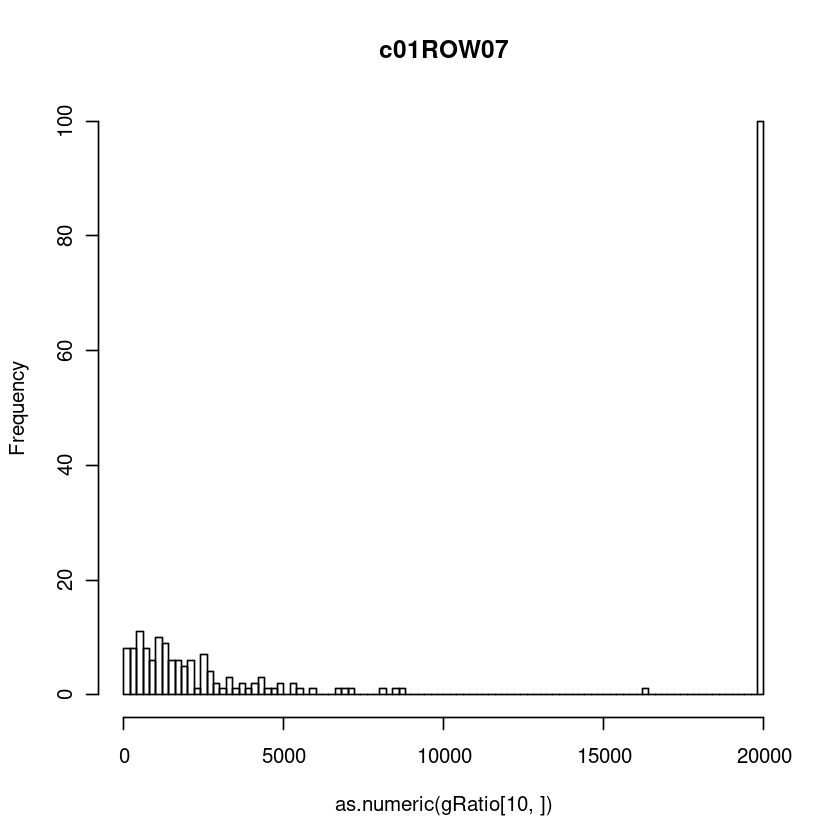

In [731]:
hist( as.numeric(gRatio[10,]), n=100, main=colnames(gRatio)[1])

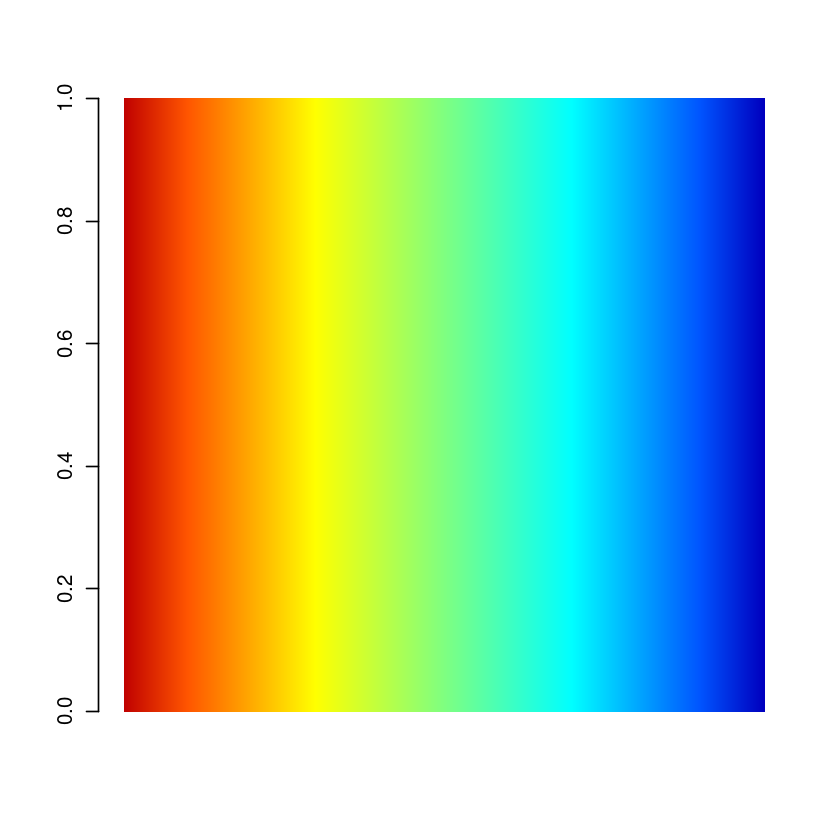

In [732]:
hmcols=rev(getColors(nrow(gRatio)))
barplot(rep(1,length(hmcols)), border = NA, col=hmcols)

[1] 4038


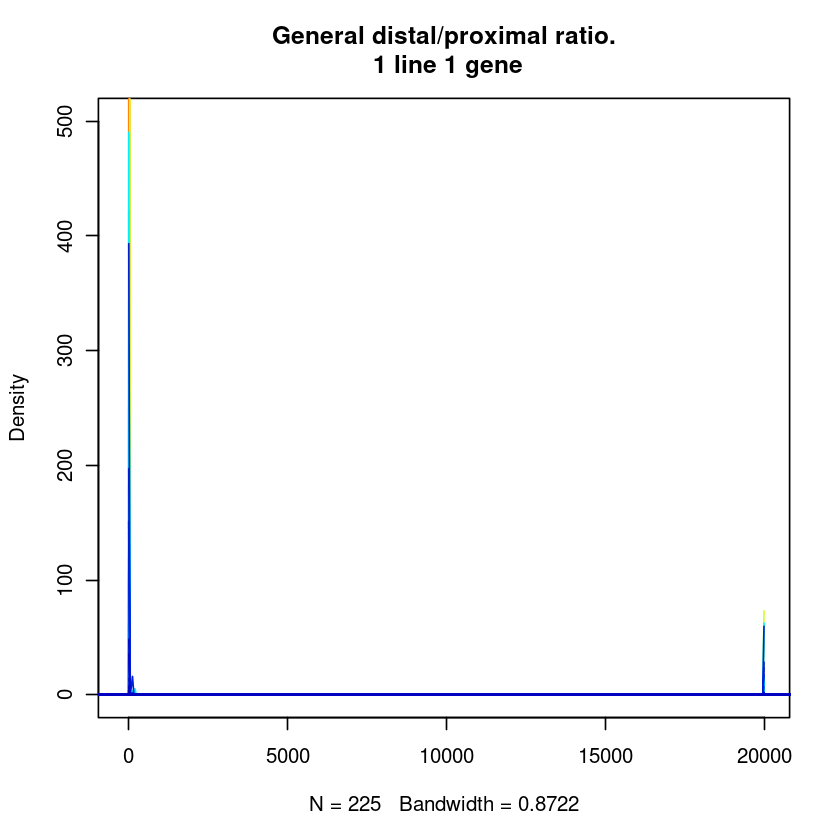

In [733]:
# 1 cell 1 gene: time consuming: 15s
plot(density( as.numeric(gRatio2[1, ]) , na.rm = T ),xlim=c(-150,20000), ylim=c(0,500), 
     main="General distal/proximal ratio.\n 1 line 1 gene",
     col=hmcols[1])
#
for(i in 1:nrow(gRatio2)){
    gene=rownames(gRatio2)[i]
    #if(i<5)pP(i, gene)
    arr=as.numeric( gRatio2[gene, ])
    arr=arr[!is.na(arr)]
    if(length(arr)<2){print(gene); next}
    lines(density(arr), col=hmcols[i])
}
print(i)

[1] "1 PTMA"
[1] "2 FTH1"
[1] "3 RPS11"
[1] "4 MALAT1"
[1] 4038


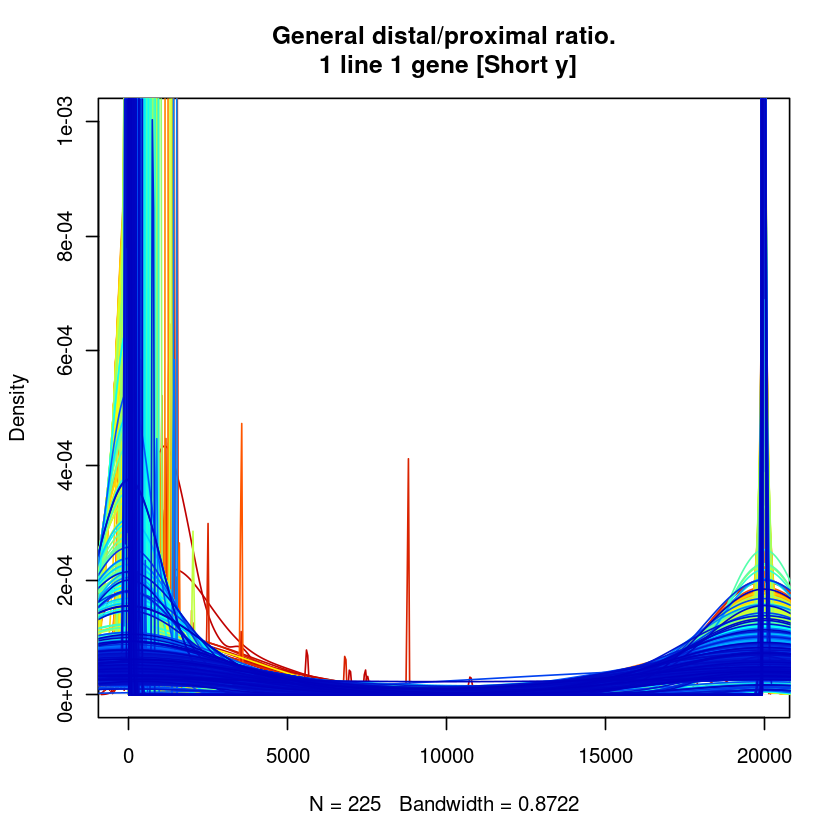

In [735]:
# 1 cell 1 gene: time consuming: 15s
plot(density( as.numeric(gRatio2[1, ]) , na.rm = T ),xlim=c(-150,20000), ylim=c(0,0.001), 
     main="General distal/proximal ratio.\n 1 line 1 gene\t[Short y]",
     col=hmcols[1])
#
for(i in 1:nrow(gRatio2)){
    gene=rownames(gRatio2)[i]
    if(i<5)pP(i, gene)
    lines(density(as.numeric( gRatio2[gene, ]) , na.rm = T ), col=hmcols[i])
}
print(i)

[1] "1 PTMA"
[1] "2 FTH1"
[1] "3 RPS11"
[1] "4 MALAT1"
[1] 501


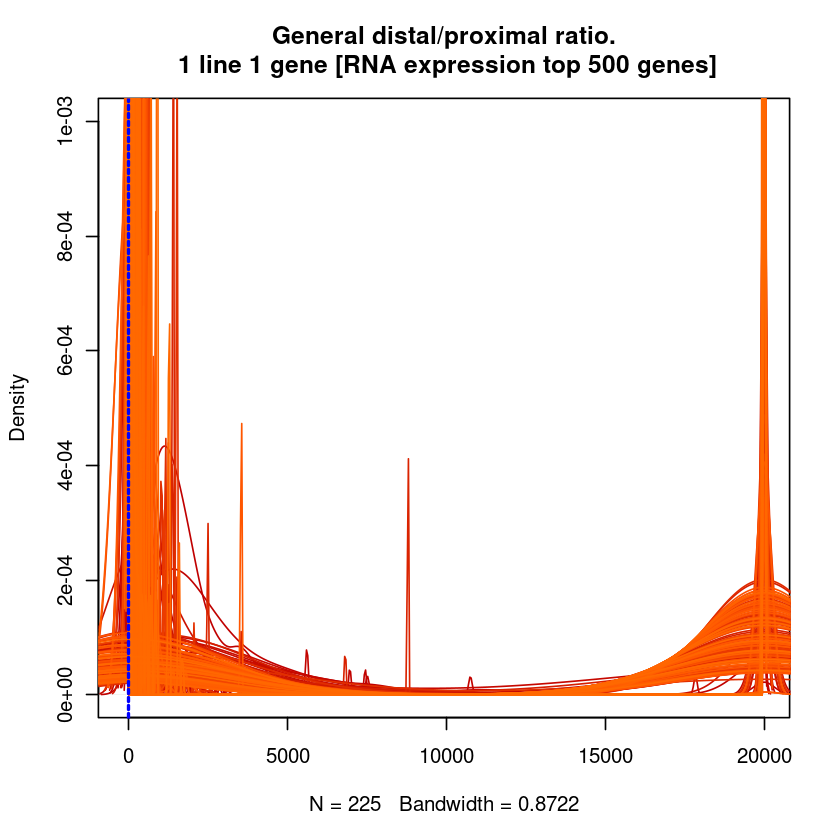

In [736]:
# 前500个基因
# 1 cell 1 gene: time consuming: 15s
plot(density( as.numeric(gRatio2[1, ]), na.rm = T ),xlim=c(-150,20000), ylim=c(0,0.001), 
     main="General distal/proximal ratio.\n 1 line 1 gene [RNA expression top 500 genes]",
     col=hmcols[1])
#
for(i in 1:nrow(gRatio2)){
    if(i>500)break;
    gene=rownames(gRatio2)[i]
    if(i<5)pP(i, gene)
    lines(density(as.numeric( gRatio2[gene, ]), na.rm = T ), col=hmcols[i])
}
abline(v = 0,lty=2,col='blue', lwd=2)
print(i)

[1] 4038


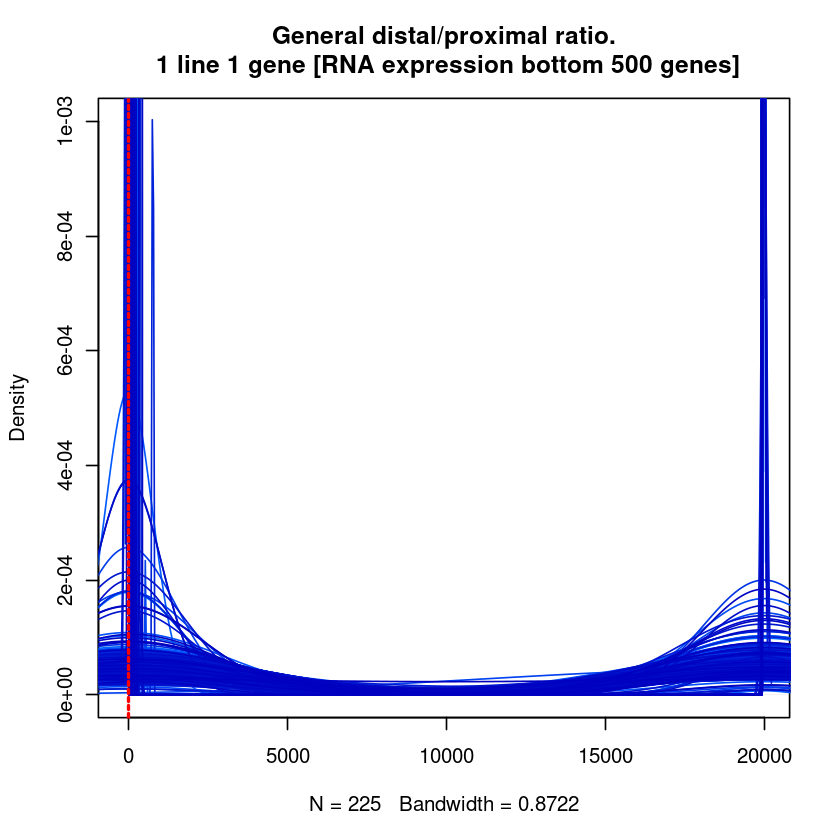

In [737]:
# 后500个基因
# 1 cell 1 gene: time consuming: 15s
plot(density( as.numeric(gRatio2[1, ]) , na.rm = T),xlim=c(-150,20000), ylim=c(0,0.001), 
     type="n",
     main="General distal/proximal ratio.\n 1 line 1 gene [RNA expression bottom 500 genes]",
     col=hmcols[1])

#
for(i in 1:nrow(gRatio2)){
    if(i<3500)next;
    gene=rownames(gRatio2)[i]
    #if(i<5)pP(i, gene)
    lines(density(as.numeric( gRatio2[gene, ]) , na.rm = T), col=hmcols[i])
}
abline(v = 0,lty=2,col='red', lwd=2)
print(i)

### heatmap

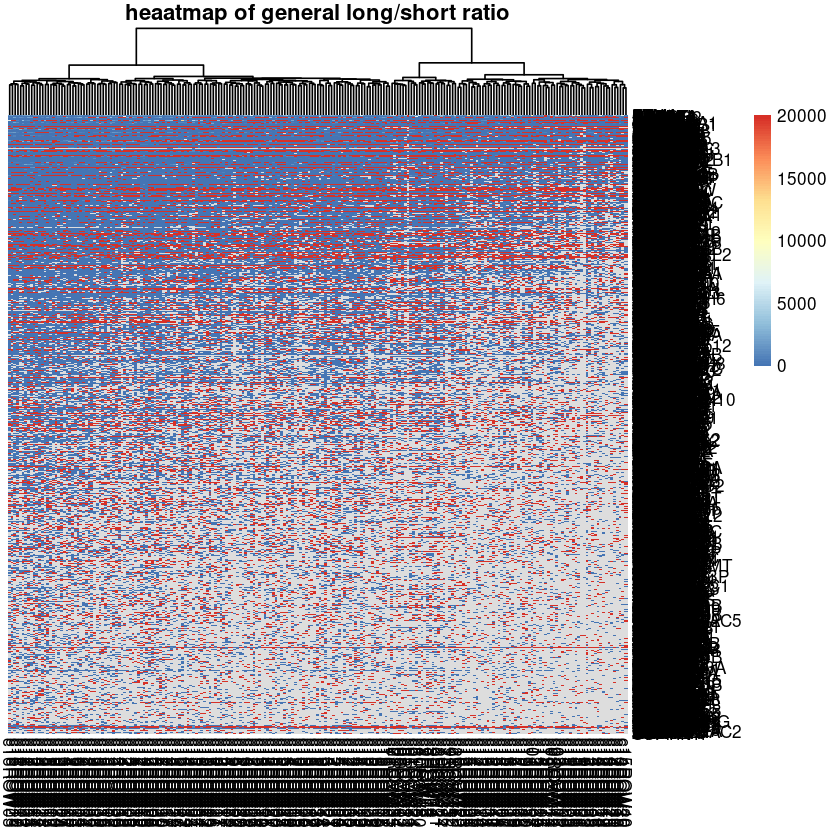

In [738]:
# consume 15s
pheatmap(gRatio, border_color = NA, #scale='row',
        clustering_method="ward.D2",
         cluster_rows=FALSE,  #对row聚类会报错
         #cluster_cols=FALSE, 
        main="heaatmap of general long/short ratio")

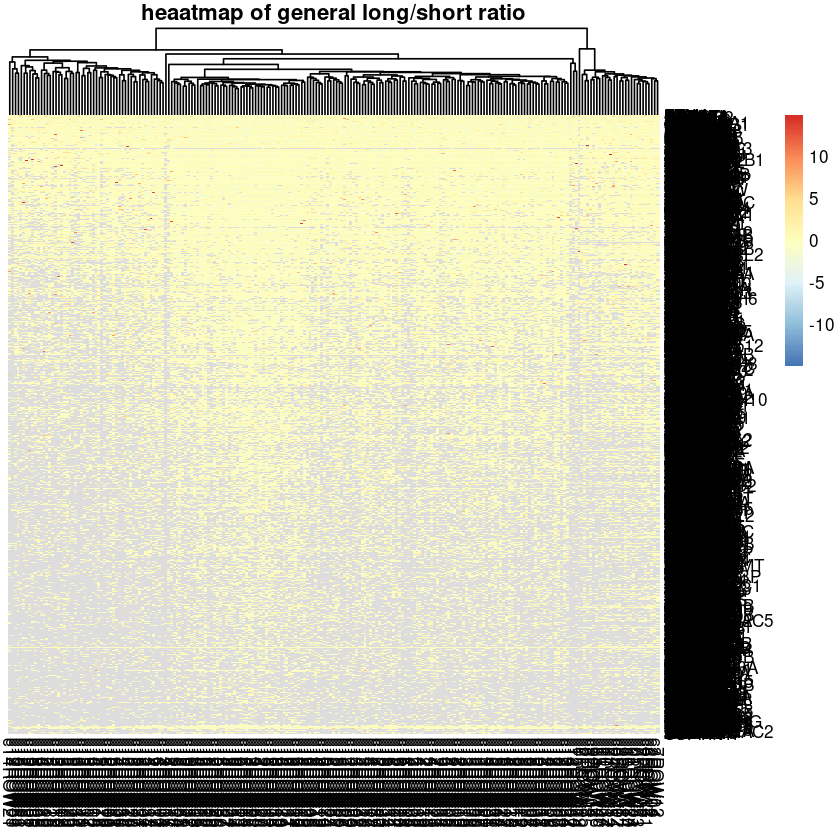

In [739]:
# consume 15s
pheatmap(gRatio, border_color = NA, scale='row',
         cluster_rows=FALSE,  #对row聚类会报错
        clustering_method="ward.D2",
        main="heaatmap of general long/short ratio")

In [740]:
# add cell info to the heatmap
ph(cellInfo)
table(cellInfo$cellType)
table(cellInfo$cellType2)

pd(gRatio2)
gRatio2[1:4,1:4]

         geneNumber countsPerCell countsPerGene  cellType cellCycle
c01ROW24       5693       1950601      342.6315 HeLa_sync       G2M
c01ROW35       6768       3048970      450.4979 HeLa_sync         M
c01ROW31       6542       2783703      425.5125 HeLa_sync         S
c05ROW02       6012       1263249      210.1213 HeLa_sync         S
c05ROW14       5853       1313664      224.4428 HeLa_sync         S
c05ROW19       4372        493417      112.8584 HeLa_sync         S
            cellType2
c01ROW24 HeLa_syncMix
c01ROW35 HeLa_syncMix
c01ROW31 HeLa_syncMix
c05ROW02 HeLa_syncMix
c05ROW14 HeLa_syncMix
c05ROW19 HeLa_syncMix



       BC_0        BC_1 HeLa_normal   HeLa_sync 
         87          82          29          27 


        BC_0         BC_1  HeLa_normal    HeLa_sync HeLa_syncMix 
          87           82           29           12           15 

[1] 4038  225


c01ROW07     c01ROW12     c01ROW24     c01ROW31    
PTMA   1.718261e+01   10.2898273    3.5585419    2.6655238
FTH1   2.457490e+00    1.0000000    1.1663717    2.0914634
RPS11  1.070300e+04 1639.0000000 3049.0000000 3470.0000000
MALAT1 6.141229e-01    0.5459839    0.5881301    0.5652401

cellType  cellType2    cellCycle
c01ROW24 HeLa_sync HeLa_syncMix G2M      
c01ROW35 HeLa_sync HeLa_syncMix M        
c01ROW31 HeLa_sync HeLa_syncMix S        
c05ROW02 HeLa_sync HeLa_syncMix S        
c05ROW14 HeLa_sync HeLa_syncMix S        
c05ROW19 HeLa_sync HeLa_syncMix S

$cellType
       BC_0        BC_1 HeLa_normal   HeLa_sync 
  "#FF9ECE"   "#F81082"   "#005FFF"   "#619CFF" 

$cellType2
        BC_0         BC_1  HeLa_normal    HeLa_sync HeLa_syncMix 
   "#FF9ECE"    "#F81082"    "#005FFF"    "#619CFF"    "#98BEFD" 

$cellCycle
      G1S         S       G2M         M       MG1 
"#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3" "#A6D854"

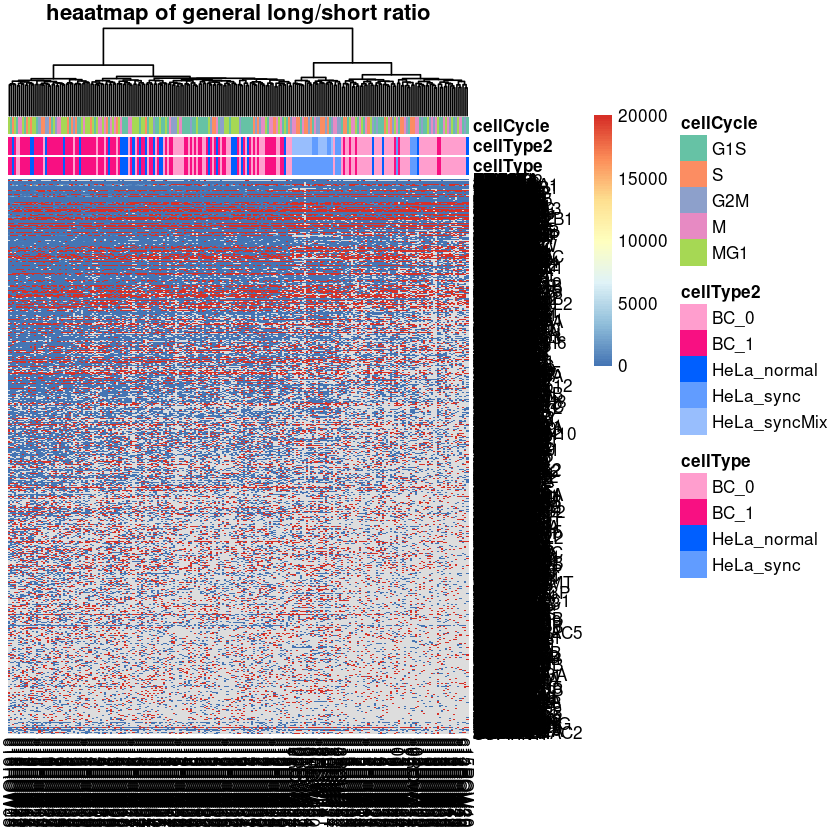

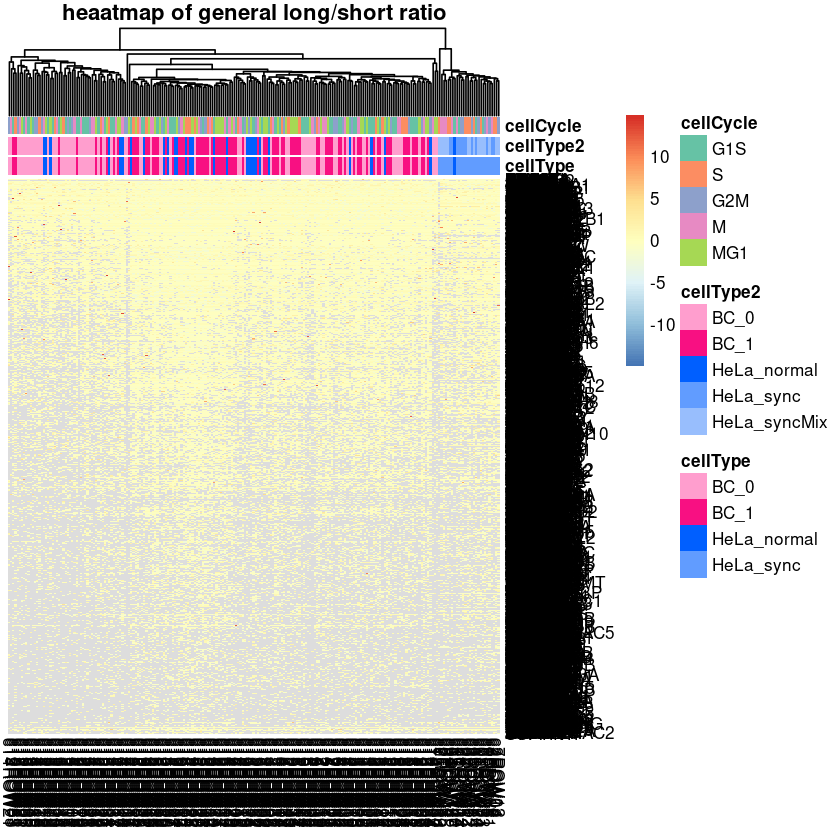

In [741]:
# heatmap with known info
###########
#section 1
annotation_col = data.frame(
  cellType = as.character(cellInfo$cellType),
  cellType2 = as.character(cellInfo$cellType2),
  cellCycle=factor(cellInfo$cellCycle, levels = c('G1S', 'S', 'G2M', 'M', 'MG1') )
)
rownames(annotation_col) = rownames(cellInfo)
head(annotation_col)

###########
#section 2
col=RColorBrewer::brewer.pal(n = 5,name = "Set2")
ann_colors = list(  
  cellType = c('BC_0'="#FF9ECE", 'BC_1'="#F81082", 'HeLa_normal'="#005FFF", 'HeLa_sync'="#619CFF"),
  cellType2 = c('BC_0'="#FF9ECE", 'BC_1'="#F81082", 'HeLa_normal'="#005FFF", 'HeLa_sync'="#619CFF", 'HeLa_syncMix'="#98BEFD"),  
  cellCycle=c('G1S'=col[1], 'S'=col[2], 'G2M'=col[3],   'M'=col[4], 'MG1'=col[5])
)
head(ann_colors)

###########
#section 3  # consume 15s+15s
pheatmap(gRatio2, border_color = NA, #scale='row',
         cluster_rows=FALSE,  #对row聚类会报错
        clustering_method="ward.D2",
         annotation_col=annotation_col,
         annotation_colors = ann_colors,
        main="heaatmap of general long/short ratio")

pheatmap(gRatio2, border_color = NA, scale='row',
         cluster_rows=FALSE,  #对row聚类会报错
        clustering_method="ward.D2",
         annotation_col=annotation_col,
         annotation_colors = ann_colors,
        main="heaatmap of general long/short ratio")

> Perhaps, we need to select genes to draw heatmap

In [931]:
# consume 15min: 14:00 - 14:14
#17:40 - 
get25_001=function(){
    dt=gRatio
    h_cor=cor(t(dt), method="pearson")
    h_dist=dist(h_cor) #time consuming step
    h_dist
}
h_dist=get25_001()

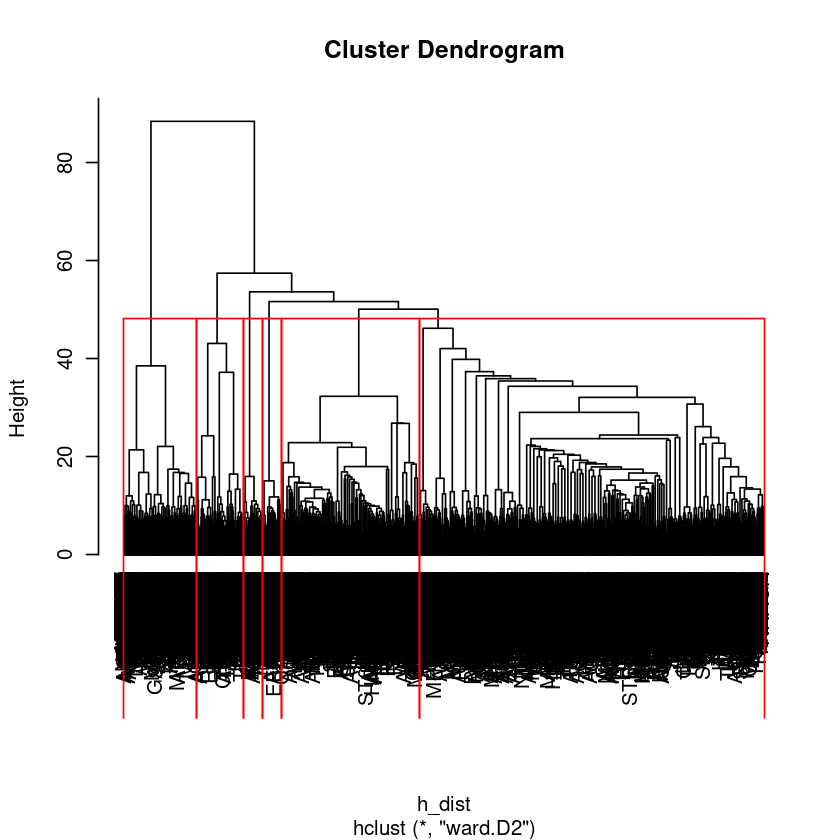

In [933]:
(function(){
    clust.ward=hclust(h_dist, method="ward.D2")
    plot(clust.ward, hang = -1)
    rect.hclust(clust.ward,6)
})()

### gRatio to 0-1

In [137]:
getgRatio.std01=function(dt, cid){
    dt=dt[,cid]
    # filter out all 0 ratio rows
    keep=apply(dt, 1, sum)>0
    dt=dt[keep,]
    #print(tail(dt[,1:5]))
    gRatio.std01=apply(dt, 1, function(x){
        x=log10(x+1);
        (x-min(x)) / (max(x) - min(x))
    })
    as.data.frame(t(gRatio.std01))
}
 
gRatio.std01.BC=getgRatio.std01(gRatio2, cid.BC)
pd(gRatio.std01.BC)
ph(gRatio.std01.BC[,1:4])

[1] 4036  169
        c12ROW02  c12ROW03  c12ROW04  c12ROW05
PTMA   0.1630223 0.2587580 0.2964344 0.3458945
FTH1   0.1878004 0.4941514 0.2059042 0.2226384
RPS11  0.7499263 0.7251855 0.3997524 0.8721151
MALAT1 0.5334274 0.1802163 0.8035909 0.1692022
GAPDH  0.8801408 0.6865075 0.7196845 0.6976757
RPS27A 0.6311817 0.4462000 0.5411747 0.5093076


In [138]:
gRatio.std01.HeLa=getgRatio.std01(gRatio2, cid.HeLa)
pd(gRatio.std01.HeLa)

[1] 4028   56


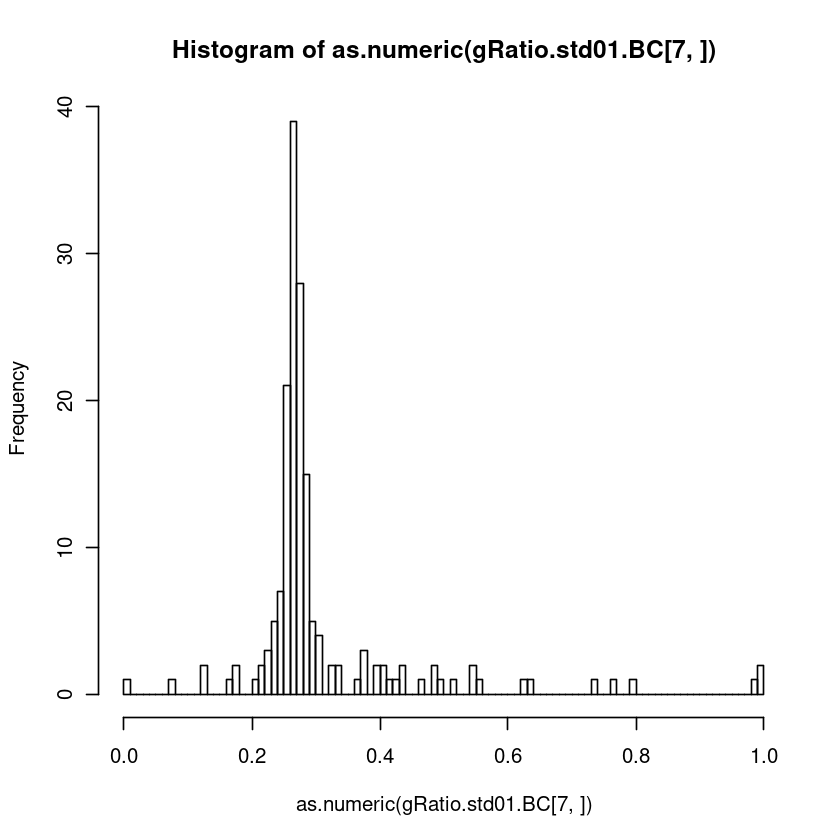

In [139]:
hist( as.numeric(gRatio.std01.BC[7,]), n=100)

In [141]:
table(complete.cases(gRatio.std01.HeLa))



TRUE 
4028 

### deltaRatio of sync vs normal HeLa

In [575]:
table(cellInfo$cellType)


       BC_0        BC_1 HeLa_normal   HeLa_sync 
         87          82          29          27 

In [742]:
# normalize gRatio to (0,1)
# method 1(log, (x-min)/(max-min) ),
# method 2(original raw ratio)
# method 3: x/(x+1)
compareA_B=function(dt, cid.A, cid.B){
    #input
    #dt=gRatio.std01.HeLa
    #
    dt=dt[, c(cid.A, cid.B)]
    #filter out 0
    keep=apply(dt, 1, function(x){ sum(x, na.rm = T)})>0
    dt=dt[keep,]
    #ph(dt[,1:4])
    #
    pd(dt)
    
    #
    #dt=apply(dt,2,function(x){
    #  x/(x+1)
    #})
    dt=as.data.frame(dt)
    #
    
    genes= rownames(dt);    
    df=NULL;
    j=0
    for(i in 1:length(genes)){
        gene=genes[i]        
        arrA=as.numeric(dt[gene,cid.A])
        arrB=as.numeric(dt[gene,cid.B])
        # filter out 0 ratio
        arrA=arrA[!is.na(arrA)]
        arrB=arrB[!is.na(arrB)]
        
        #
        p=1.1
        if(length(arrA)>=2 & length(arrB)>=2){
            if(sd(arrA)!=0 & sd(arrB)!=0){
                p=t.test(arrA, arrB)$p.value;
                j=j+1
            }else{
                pP('>>>Constant:',i, gene)
            }
        }else{
            pP('>>>Either side less then 2 obs: ',i, gene, length(arrA), length(arrB))
        }
        
        df=rbind(df, data.frame(
            #gene=gene,
            nA=length(arrA), nB=length(arrB),
            meanA=mean(arrA),meanB=mean(arrB),
            sdA=sd(arrA),sdB=sd(arrB),
            p=p,
            row.names=gene
        ))
    }
    pP("=========>>>j=",j)
    #rownames(df)=df$gene
    df$cvA=df$sdA / df$meanA
    df$cvB=df$sdB / df$meanB
    #
    df$adj.p=p.adjust(df$p, method ='fdr')
    df=df[order(df$adj.p),]
    df$fc=df$meanA / df$meanB
    df$delta=df$meanA - df$meanB
    df
}


###
cid.A=rownames( cellInfo[which(cellInfo$cellType == "HeLa_sync"),] ) #27
cid.B=rownames( cellInfo[which(cellInfo$cellType == "HeLa_normal"),] ) #29
#
#ratio.sync_normal=compareA_B(gRatio.std01.HeLa, cid.A, cid.B)
ratio.sync_normal=compareA_B(gRatio, cid.A, cid.B)
debug(ratio.sync_normal)

[1] 4015   56
[1] ">>>Either side less then 2 obs:  41 RPS23 2 1"
[1] ">>>Constant: 73 MGP"
[1] ">>>Constant: 158 NDUFB9"
[1] ">>>Constant: 207 S100A16"
[1] ">>>Either side less then 2 obs:  213 HSPA8 1 12"
[1] ">>>Either side less then 2 obs:  221 KRT19 1 28"
[1] ">>>Constant: 237 SSR4"
[1] ">>>Constant: 259 PSMB5"
[1] ">>>Constant: 260 SNHG29"
[1] ">>>Constant: 292 EEF1D"
[1] ">>>Constant: 339 SIGMAR1"
[1] ">>>Constant: 370 MRPS15"
[1] ">>>Constant: 385 DAD1"
[1] ">>>Either side less then 2 obs:  399 AZGP1 0 28"
[1] ">>>Either side less then 2 obs:  416 S100A7 1 27"
[1] ">>>Constant: 429 SLPI"
[1] ">>>Either side less then 2 obs:  517 RARRES1 0 20"
[1] ">>>Constant: 526 KRT17"
[1] ">>>Constant: 529 MLF2"
[1] ">>>Either side less then 2 obs:  583 S100A9 0 28"
[1] ">>>Either side less then 2 obs:  606 EPCAM 0 23"
[1] ">>>Constant: 616 IRAK1"
[1] ">>>Constant: 628 CSAG1"
[1] ">>>Constant: 630 NDUFA11"
[1] ">>>Either side less then 2 obs:  691 CLDN10 0 18"
[1] ">>>Constant: 704 AURKAIP1"

[1] 4015   12
       nA nB       meanA      meanB        sdA      sdB            p       cvA
EIF3K  27 29    42.23825 15377.4713   74.70124 8353.820 1.238897e-10 1.7685684
RPS20  27 29  2315.36763 14666.8789 6372.60412 8798.791 1.737694e-07 2.7523077
RPS29  25 29 18401.70000  6293.7931 5531.86661 9357.667 4.292654e-07 0.3006171
APEX1  27 29 18524.54938  7135.0472 5315.92361 9503.432 1.327124e-06 0.2869664
MRPL34 25 28 12807.39303   749.0722 9787.91679 3774.326 2.433619e-06 0.7642396
GRB10  21 10 18096.16911  2013.5265 6012.91237 6319.945 3.537528e-06 0.3322754
             cvB        adj.p           fc     delta
EIF3K  0.5432506 4.974170e-07  0.002746762 -15335.23
RPS20  0.5999089 3.488421e-04  0.157863690 -12351.51
RPS29  1.4868088 5.745002e-04  2.923785330  12107.91
APEX1  1.3319368 1.332100e-03  2.596275665  11389.50
MRPL34 5.0386674 1.954196e-03 17.097675321  12058.32
GRB10  3.1387444 2.367196e-03  8.987301321  16082.64



FALSE  TRUE 
 3993    22 

[1] "EIF3K"    "RPS20"    "RPS29"    "APEX1"    "MRPL34"   "GRB10"   
 [7] "EEF2"     "SSBP1"    "NIPSNAP2" "SLC44A2"  "SERF2"    "PINK1"   
[13] "SDF2"     "GAPDH"    "SEC61G"   "RPL11"    "MAL2"     "FNDC3A"  
[19] "UQCRFS1"  "DMAC1"    "TIMM10"   "FTL"


lengthen       ns  shorten 
      17     3993        5 

Warning message:
“Removed 121 rows containing missing values (geom_point).”


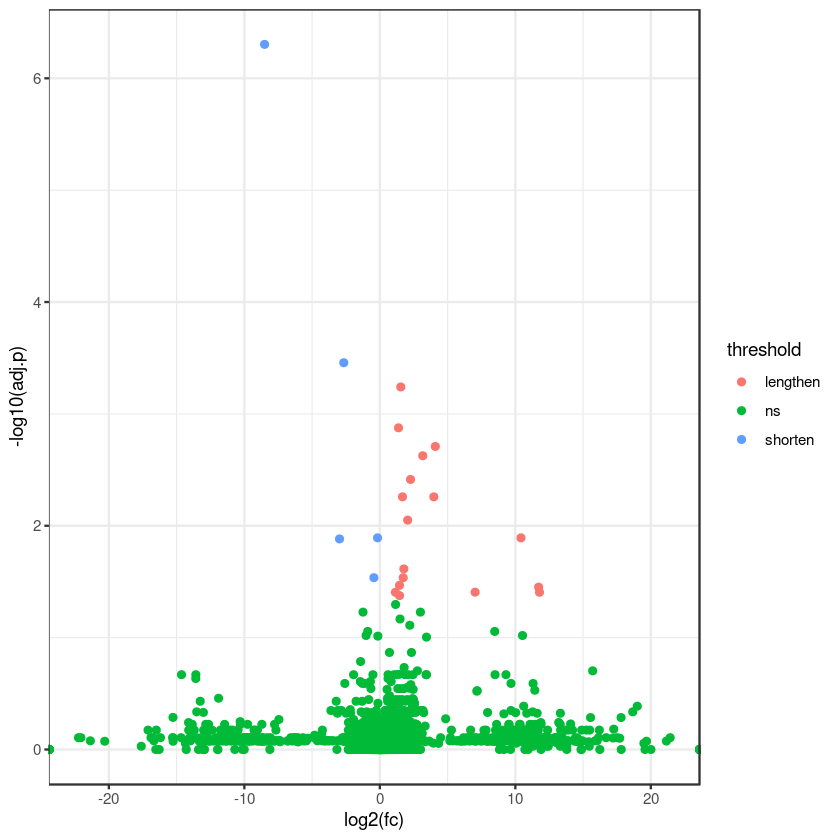

In [743]:
dif=ratio.sync_normal

table(dif$adj.p<0.05)
rownames(dif[dif$adj.p<0.05,])

dif$threshold="ns"
dif[which( dif$fc > 1 & dif$adj.p<0.05), ]$threshold="lengthen";
dif[which( dif$fc < 1 & dif$adj.p<0.05), ]$threshold="shorten";
table(dif$threshold)

#head(dif)
ggplot(dif, aes(log2(fc), -log10(adj.p), color=threshold))+geom_point()+
    theme_bw()


FALSE  TRUE 
  580  3314 

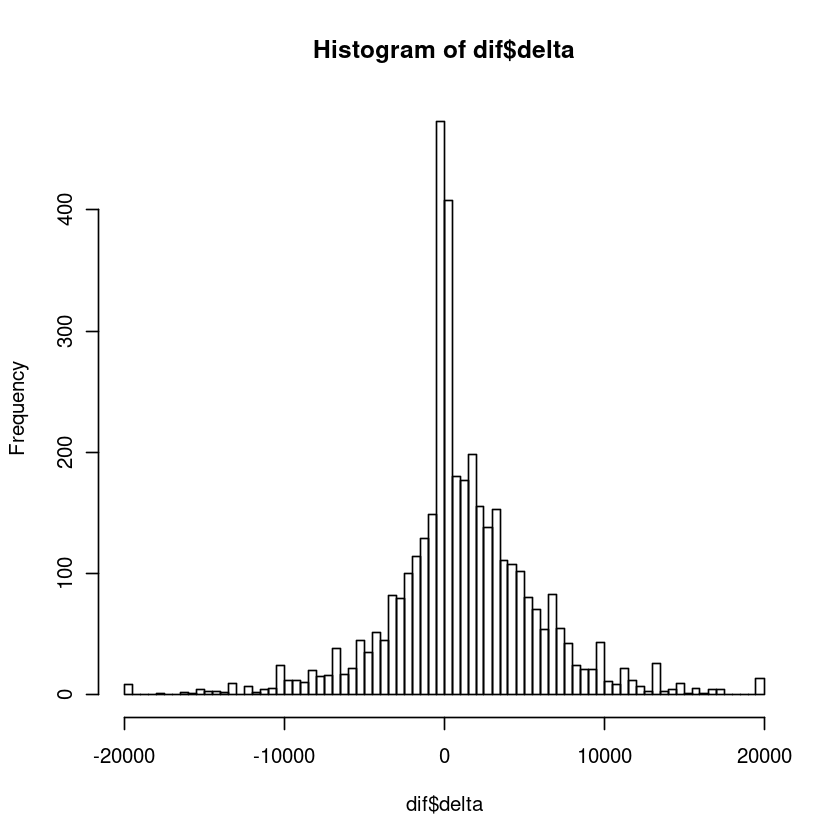

In [600]:
hist(dif$delta, n=100)

table(abs(dif$delta)>3)

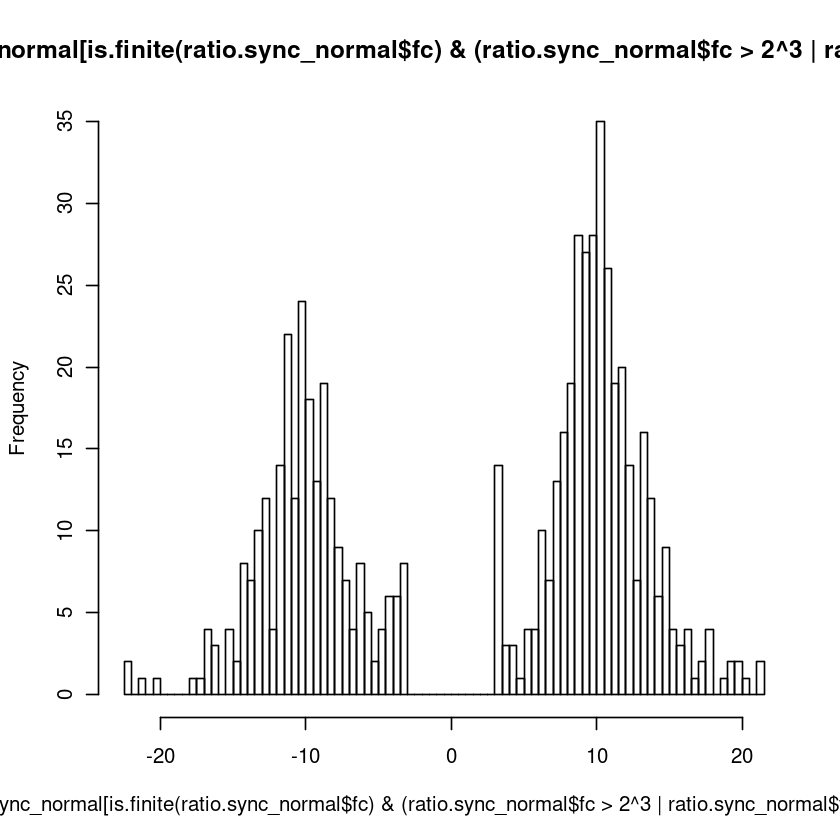

In [754]:
hist( log2( ratio.sync_normal[is.finite(ratio.sync_normal$fc) & (ratio.sync_normal$fc>2**3 | ratio.sync_normal$fc<2**(-3) ),]$fc ),n=100 )

[1] 440

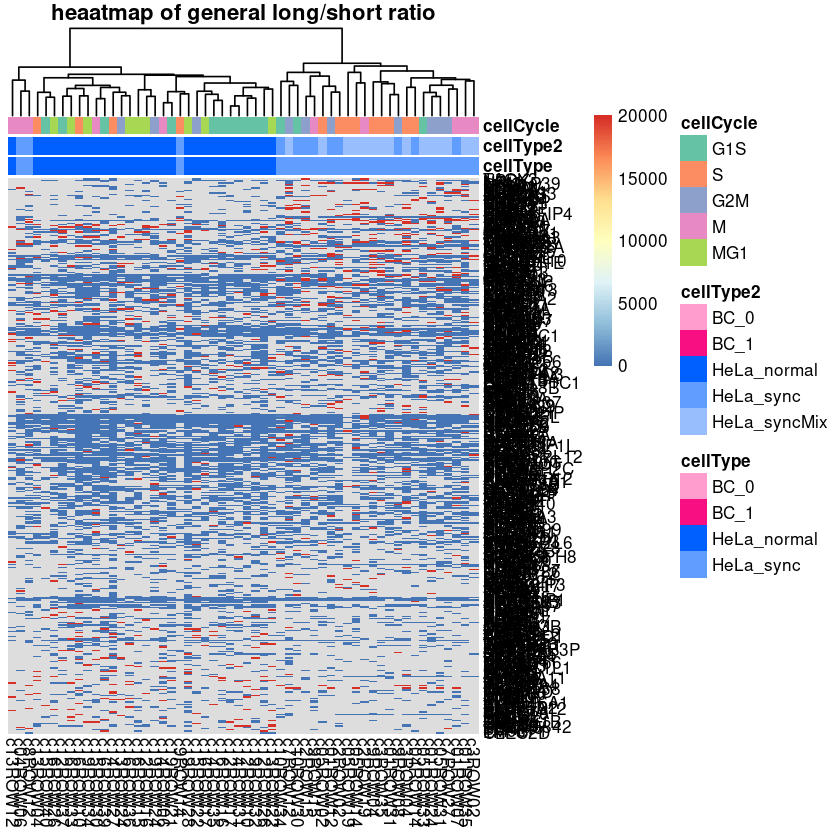

In [772]:
cid.A=rownames(cellInfo[cellInfo$cellType=='HeLa_sync',])
cid.B=rownames(cellInfo[cellInfo$cellType=='HeLa_normal',])

genes=c( rownames(ratio.sync_normal[is.infinite(ratio.sync_normal$fc),]),  
       rownames(ratio.sync_normal[is.finite(ratio.sync_normal$fc) & (ratio.sync_normal$fc>2**10 | ratio.sync_normal$fc<2**(-10) ),])
)
#ratio.sync_normal
length(genes)
pheatmap(gRatio2[genes, c(cid.A,cid.B)], border_color = NA, #scale='row',
         cluster_rows=F,  #对row聚类会报错
         cluster_cols=T, 
        clustering_method="ward.D2",
         annotation_col=annotation_col,
         annotation_colors = ann_colors,
        main="heaatmap of general long/short ratio")

[1] "3236.36746715033 66454.7209385974"
[1] "-127012.49217516 133485.227109461"


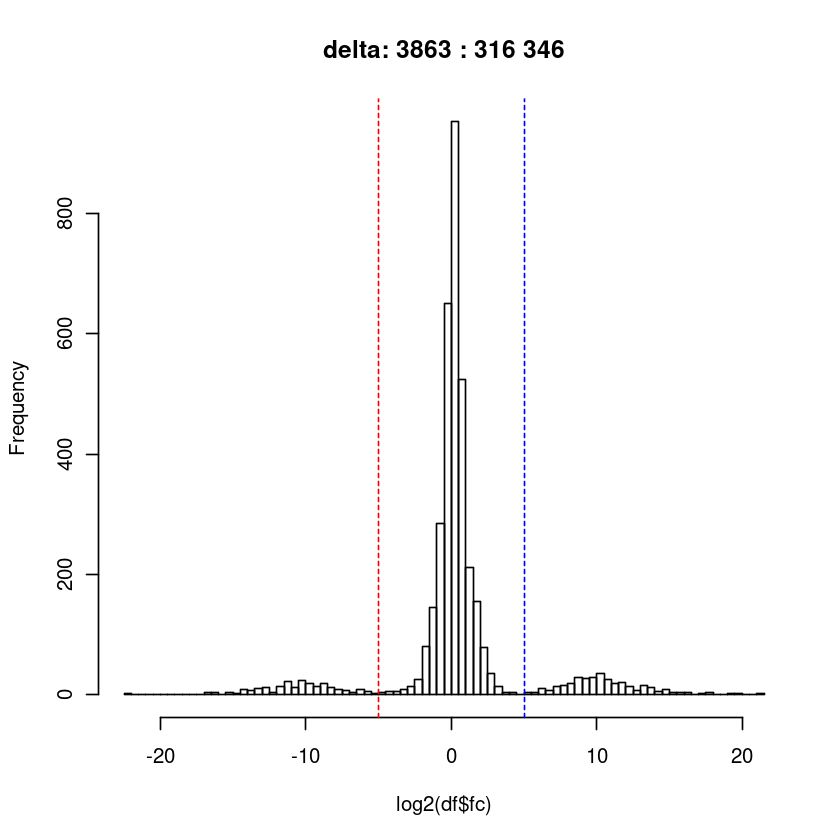

In [622]:
#hist( log2(dif$fc), n=100)

(function(){
    df=ratio.sync_normal
    # filter delta NA
    df=df[!is.na(df$fc),]
    df=df[!is.nan(df$fc),]
    df=df[is.finite(df$fc),]
    #
    m1=mean(df$fc, na.rm = T)
    sd1=sd(df$fc, na.rm = T)
    pP(m1, sd1)
    #
    t1=m1-qnorm(0.975)*sd1; t2=m1+qnorm(0.975)*sd1;
    pP(t1, t2)
    #
    #df1=df[df$fc < t1,];
    #df2=df[df$fc > t2,];
    
    df1=df[df$fc < 2**(-5),];
    df2=df[df$fc > 2**(5),];
    #
    writeLines(rownames(df1), 'gRatio_HeLa/gRatio_fc_shorten.gene')
    writeLines(rownames(df2), 'gRatio_HeLa/gRatio_fc_lengthen.gene')
    #
    hist( log2(df$fc), n=100, main=paste('delta:',nrow(df),':', nrow(df1), nrow(df2)))
    abline(v=5, lty=2, col='blue')
    abline(v=-5, lty=2, col='red')
})()

In [602]:
head(dif)
rownames(dif[which(dif$adj.p<0.05),])

nA nB meanA       meanB      sdA        sdB      p            cvA      
EIF3K  27 29    42.23825 15377.4713   74.70124 8353.820 1.238897e-10 1.7685684
RPS20  27 29  2315.36763 14666.8789 6372.60412 8798.791 1.737694e-07 2.7523077
RPS29  25 29 18401.70000  6293.7931 5531.86661 9357.667 4.292654e-07 0.3006171
APEX1  27 29 18524.54938  7135.0472 5315.92361 9503.432 1.327124e-06 0.2869664
MRPL34 25 28 12807.39303   749.0722 9787.91679 3774.326 2.433619e-06 0.7642396
GRB10  21 10 18096.16911  2013.5265 6012.91237 6319.945 3.537528e-06 0.3322754
       cvB       adj.p        fc           delta     threshold
EIF3K  0.5432506 4.974170e-07  0.002746762 -15335.23 shorten  
RPS20  0.5999089 3.488421e-04  0.157863690 -12351.51 shorten  
RPS29  1.4868088 5.745002e-04  2.923785330  12107.91 lengthen 
APEX1  1.3319368 1.332100e-03  2.596275665  11389.50 lengthen 
MRPL34 5.0386674 1.954196e-03 17.097675321  12058.32 lengthen 
GRB10  3.1387444 2.367196e-03  8.987301321  16082.64 lengthen

[1] "EIF3K"    "RPS20"    "RPS29"    "APEX1"    "MRPL34"   "GRB10"   
 [7] "EEF2"     "SSBP1"    "NIPSNAP2" "SLC44A2"  "SERF2"    "PINK1"   
[13] "SDF2"     "GAPDH"    "SEC61G"   "RPL11"    "MAL2"     "FNDC3A"  
[19] "UQCRFS1"  "DMAC1"    "TIMM10"   "FTL"

[1] "1139.091498503 4656.35115267706"
[1] "-7987.1890601156 10265.3720571216"


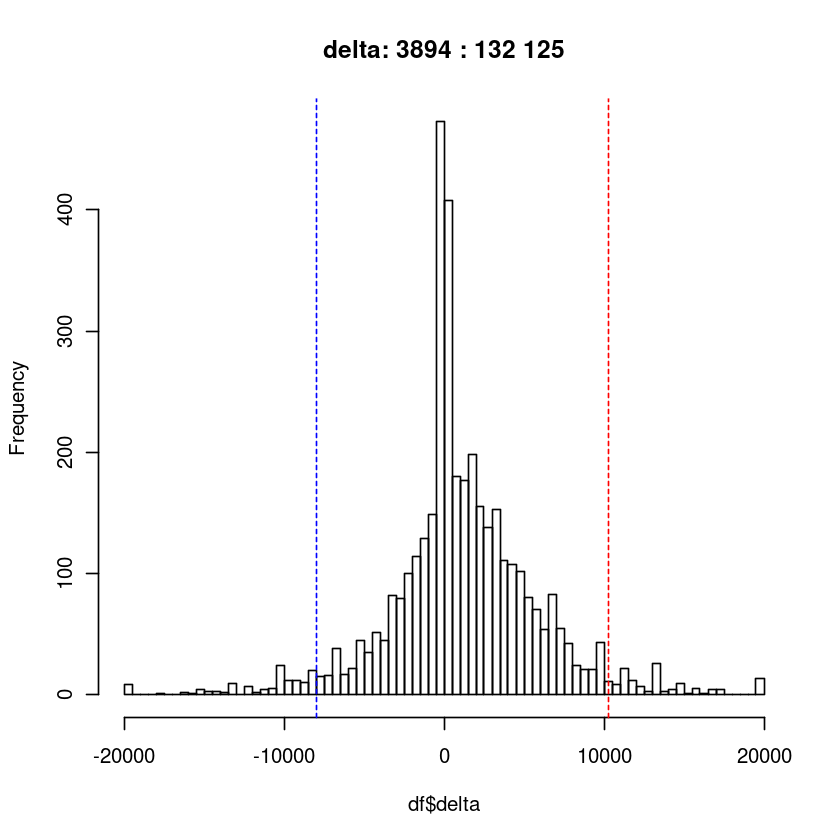

In [609]:
(function(){
    df=ratio.sync_normal
    # filter delta NA
    df=df[!is.na(df$delta),]
    #
    m1=mean(df$delta, na.rm = T)
    sd1=sd(df$delta, na.rm = T)
    pP(m1, sd1)
    #
    t1=m1-qnorm(0.975)*sd1; t2=m1+qnorm(0.975)*sd1;
    pP(t1, t2)
    #
    df1=df[df$delta < t1,];
    df2=df[df$delta > t2,];
    
    #df1=df[df$delta < (-10),];
    #df2=df[df$delta > (10),];
    #
    writeLines(rownames(df1), 'gRatio_HeLa/gRatio3rd_shorten.gene')
    writeLines(rownames(df2), 'gRatio_HeLa/gRatio3rd_lengthen.gene')
    #
    hist(df$delta, n=100, main=paste('delta:',nrow(df),':', nrow(df1), nrow(df2)))
    abline(v=t1, lty=2, col='blue')
    abline(v=t2, lty=2, col='red')
})()

In [164]:
getwd()

[1] "/data/jinwf/wangjl/apa/191111Figure/f3/gDPAU_gPPAU"

## Mean,sd of distal/proximal ratio for each gene

In [49]:
pd(gRatio2)
ph(gRatio2[,1:5])
debug(polyAsites.per.gene)

[1] 4038  225
           c01ROW07     c01ROW12     c01ROW24    c01ROW31    c01ROW35
PTMA     10.7180157    8.1810089    3.4430678    2.618360    2.114781
FTH1      2.4173228    1.0000000    1.1604096    2.074269    2.852308
RPS11  1529.8571429  820.0000000 1017.0000000 1157.333333 1369.400000
MALAT1    0.6154354    0.5479396    0.5898166    0.566482    0.502365
GAPDH  3835.0000000 7783.0000000 2305.6666667  120.963636 1109.666667
RPS27A    3.9552000    3.9705515    3.8768116    3.986682    3.933943
[1] 9454    2
           gene apaSites
MALAT1   MALAT1       46
EGFR       EGFR       40
NCL         NCL       32
ANKRD11 ANKRD11       21
DEK         DEK       21
TAX1BP1 TAX1BP1       21


[1] 4038    4
[1] ">>>save to file."
[1] 4036    8


gene   Rn  Rmean        Rsd         cpm      log2cpm  Rcv       
PTMA   PTMA   225    4.5781065   3.1376900 2777.706 11.44020 0.68536850
FTH1   FTH1   225    1.3851666   0.8800268 2747.244 11.42429 0.63532199
RPS11  RPS11  225  924.5634344 441.0372551 2732.348 11.41645 0.47702217
MALAT1 MALAT1 225    0.6373566   0.1142456 2712.187 11.40577 0.17924913
GAPDH  GAPDH  225 1294.6438617 933.7754172 2598.973 11.34428 0.72126045
RPS27A RPS27A 225    3.9303154   0.1232561 2587.650 11.33798 0.03136035
       apaSites
PTMA   18      
FTH1    7      
RPS11   4      
MALAT1 46      
GAPDH   3      
RPS27A  6

gene    Rn  Rmean     Rsd        cpm      log2cpm  Rcv       apaSites
CSMD1   CSMD1    13  6.767399  3.9547248 9.438882 3.383895 0.5843788 2       
GET4    GET4    129 18.500963 49.1541910 8.968216 3.317335 2.6568450 2       
IFFO1   IFFO1    17  1.258503  1.3288273 6.272646 2.862480 1.0558792 4       
EFCAB10 EFCAB10  91  6.722039 10.2969220 4.672614 2.504014 1.5318153 3       
TTTY14  TTTY14  180  1.009149  0.6987025 4.600694 2.485606 0.6923683 9       
SUPT4H1 SUPT4H1  62 29.845257 63.8769520 1.734973 1.451527 2.1402715 2

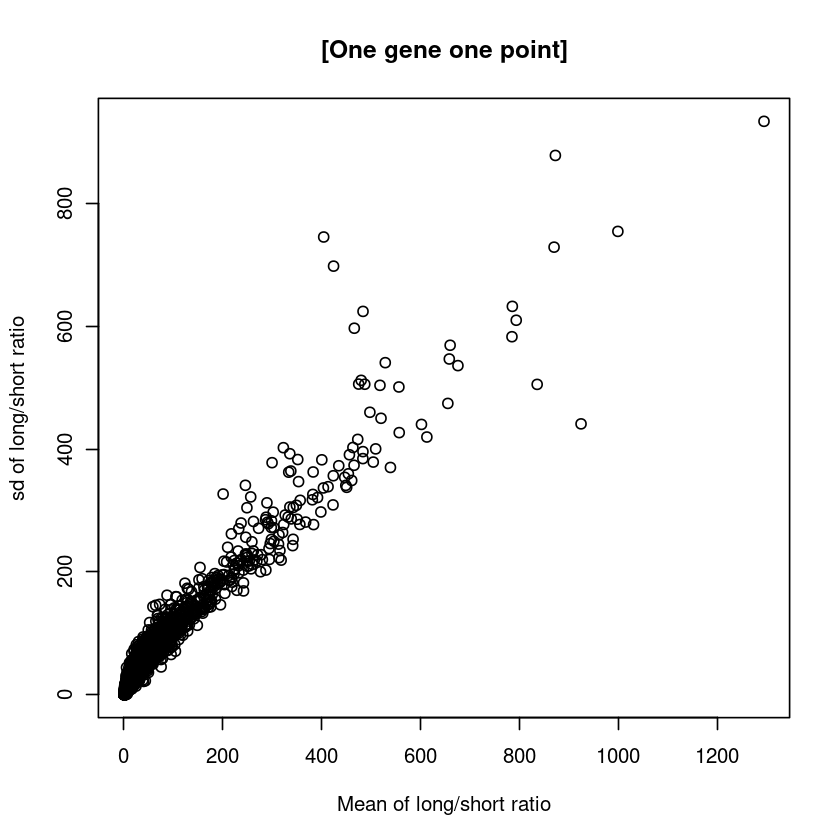

In [55]:
## remove all 0, which means not detectable(reads at the gene's all sites are less than 5)
# can pass in all, BC, or HeLa sub matrix.
get_Ratio.info=function(df, output="all/"){
    #df=gRatio2
    
    tmp.df=NULL;
    for(gene in rownames(df)){
        tmp=as.numeric(df[gene,])
        tmp=tmp[tmp!=0]
        tmp.df=rbind(tmp.df, data.frame(
            gene=gene,
            Rn=length(tmp),
            Rmean=mean(tmp),
            Rsd=sd(tmp)
        ))
    }
    #add rownames
    rownames(tmp.df)=tmp.df$gene
    #
    pd(tmp.df) #4038    3
    tmp.df$cpm=orderedGeneNames[rownames(df),'cpm']
    tmp.df$log2cpm=log2(tmp.df$cpm+1)
    #
    tmp.df$Rcv=tmp.df$Rsd/tmp.df$Rmean;
    
    # remove NA rows
    #tmp.df[!complete.cases(tmp.df),]
    tmp.df=tmp.df[complete.cases(tmp.df),]
    
    # add gene's polyA number
    tmp.df$apaSites=polyAsites.per.gene[rownames(tmp.df),'apaSites']
    
    # save to file
    write.table(tmp.df, paste0(output, '3_0_gRatio_mean_sd_n_cpm_apaSites.255.txt') )
    print(">>>save to file.")
    #
    return( tmp.df ) #Ratio.info
}
#

## 
Ratio.info=get_Ratio.info(gRatio2, 'all/'); #15:00-

pd(Ratio.info)
head(Ratio.info)
tail(Ratio.info)

# plot
plot( Ratio.info$Rmean, Ratio.info$Rsd, xlab="Mean of long/short ratio", ylab="sd of long/short ratio", main="[One gene one point]" )

### explor data with 3D plot

0

1

2



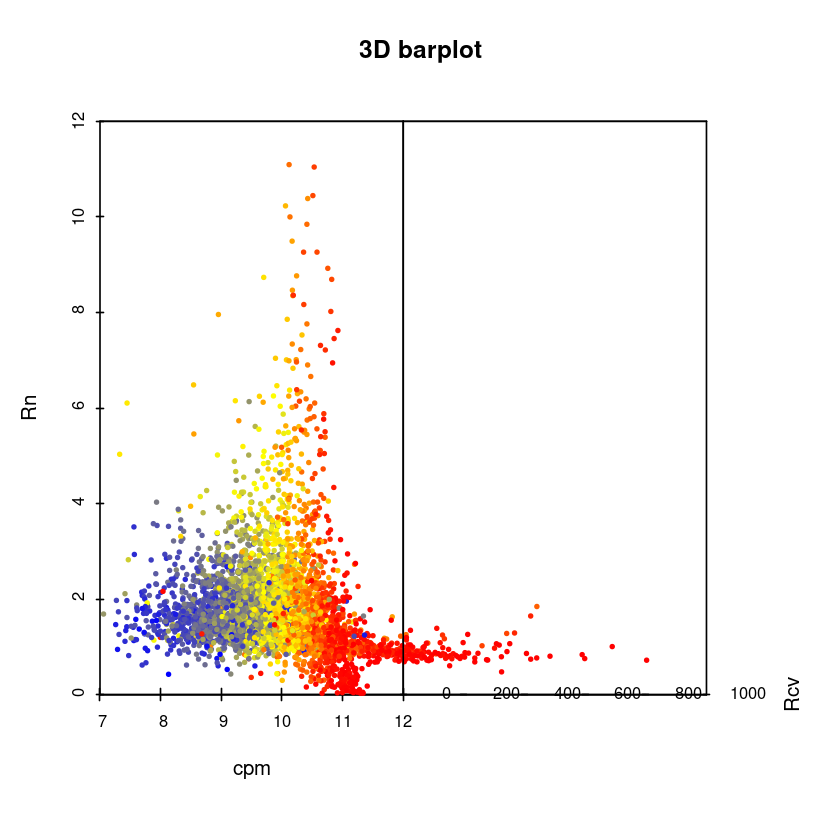

3



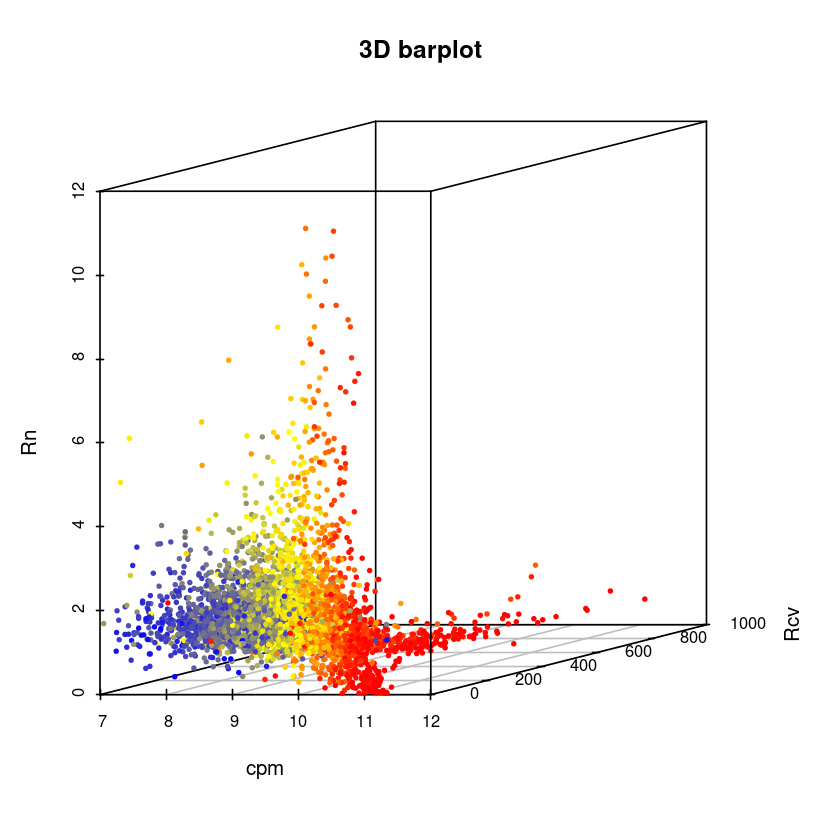

4



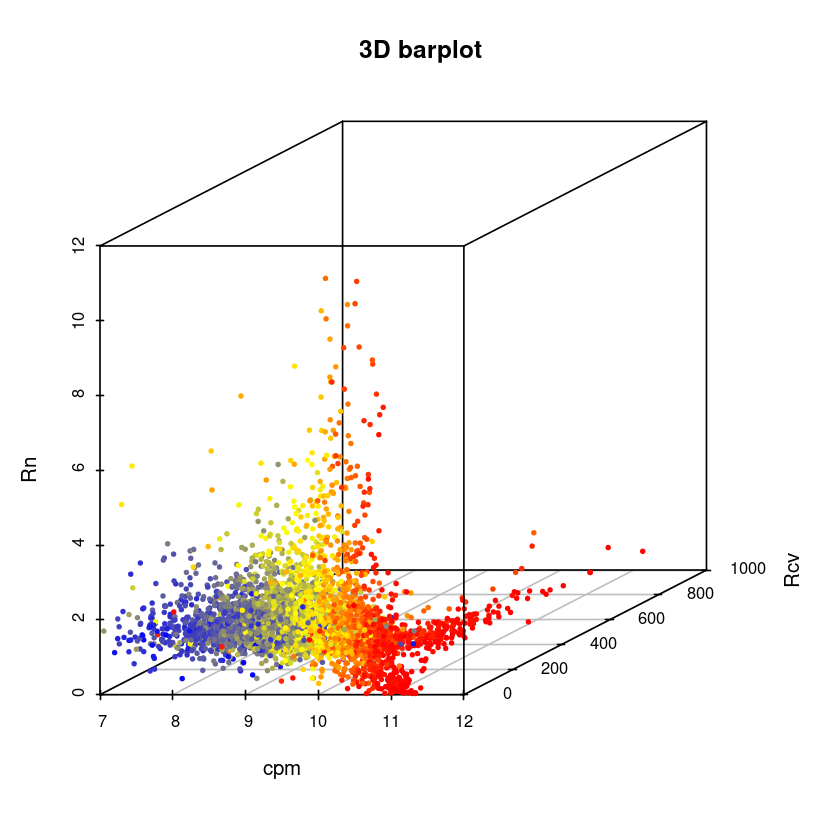

5



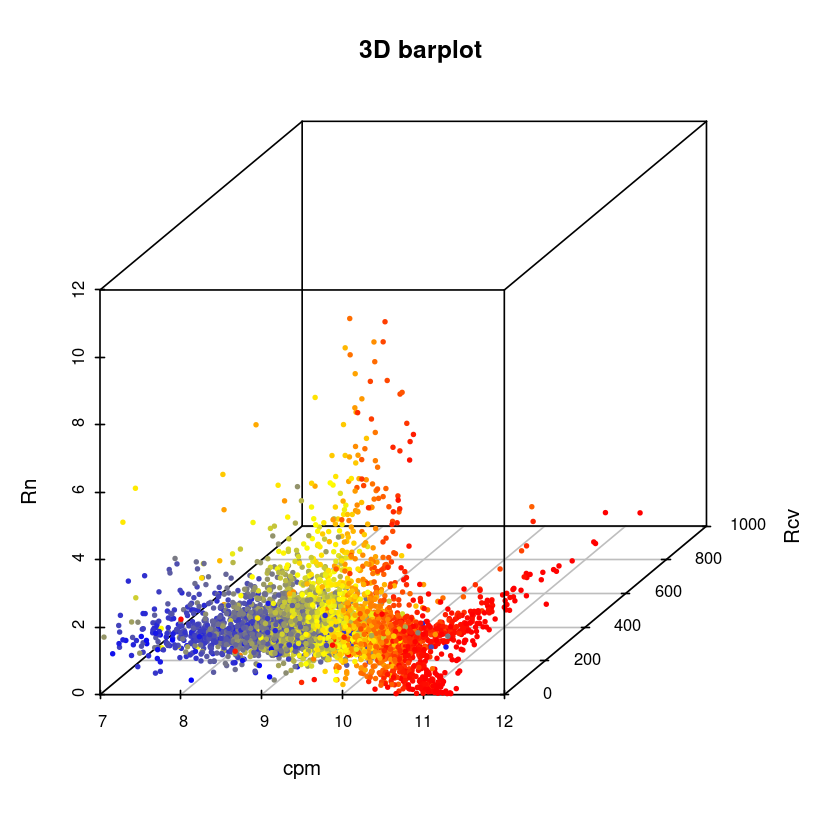

6



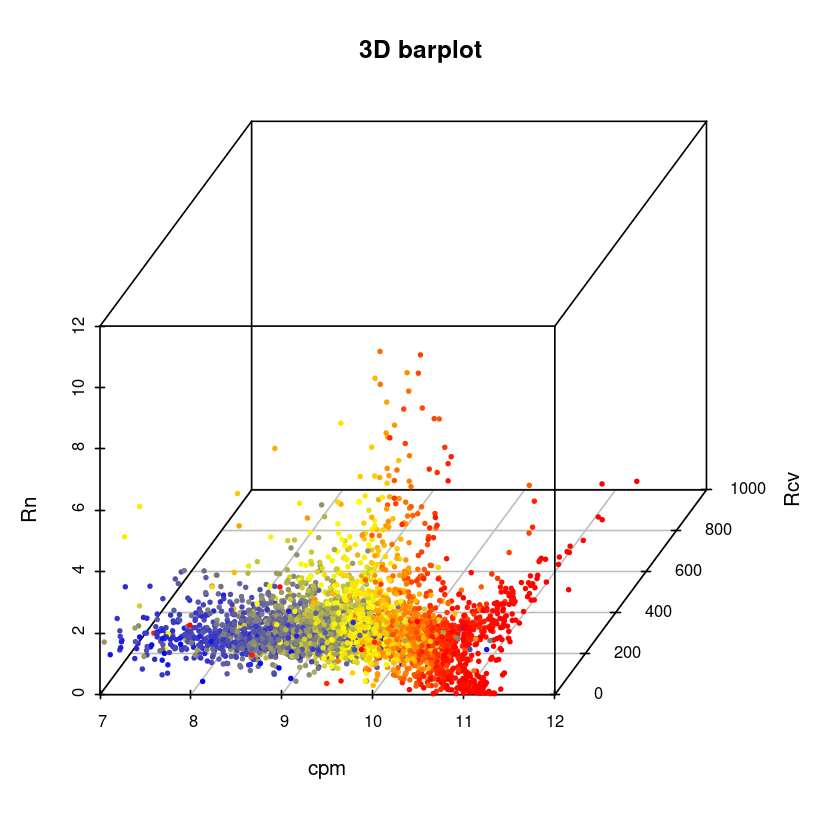

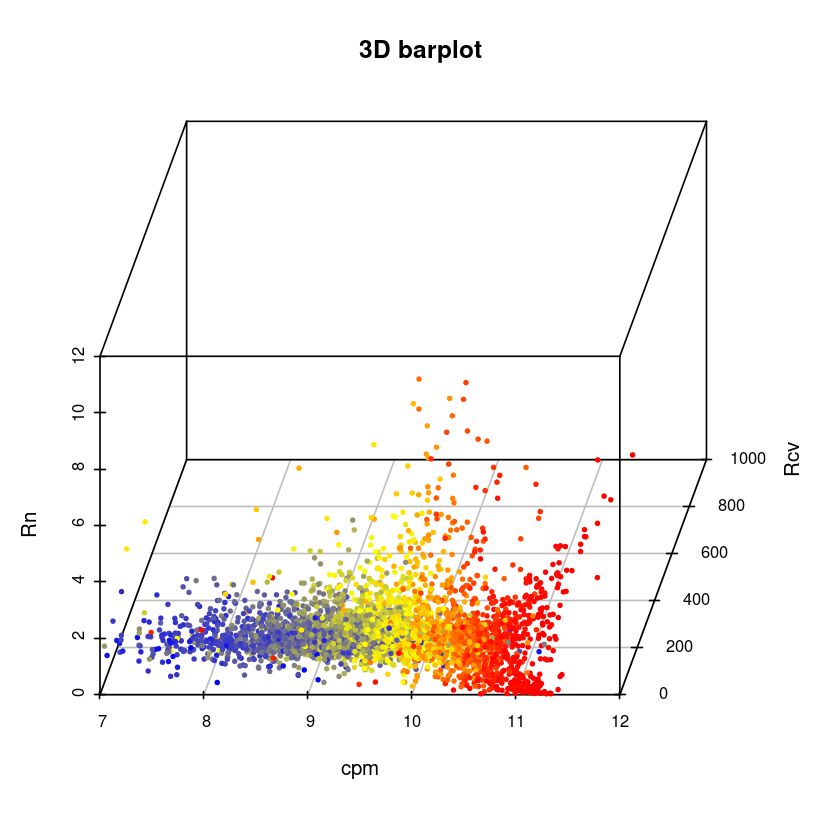

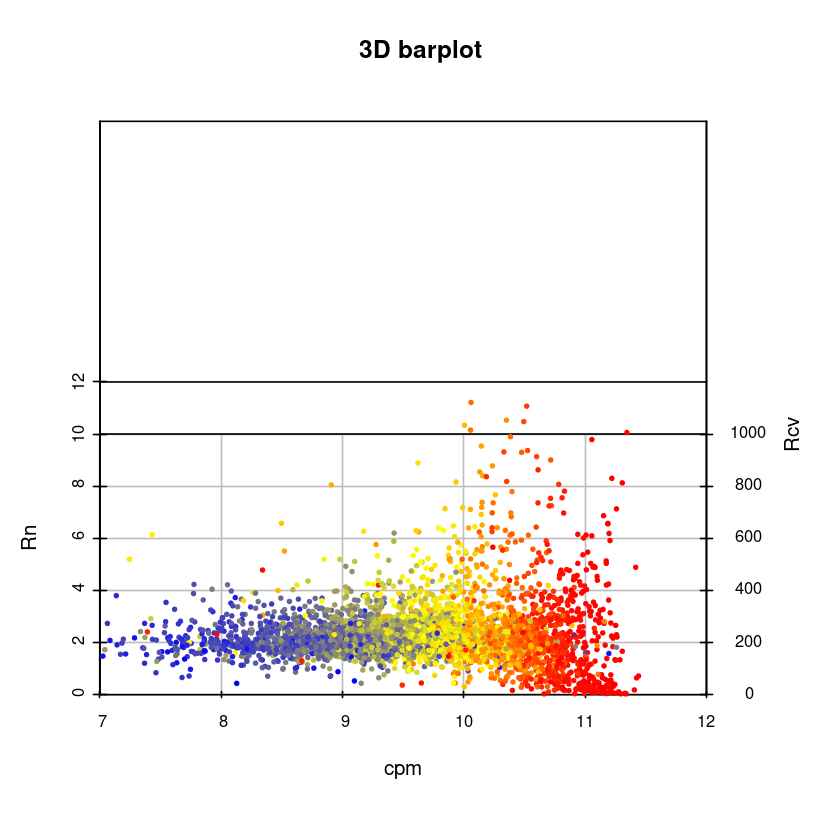

In [57]:
# in Rstudio is better!!!
# get color list
getColorList=function(df, i){
    #mycolors=colorRampPalette(colors = c("yellow",'red','purple'))( 201 )
    n=200
    #n=2
    mycolors=colorRampPalette(colors = c("blue",'yellow','red'))( n+1 )
    stdvalue=round( (df[,i]-min(df[,i]) )/( max(df[,i])- min(df[,i]) )*n );
   list.color=c()
    for(j in 1:nrow(df) ){
        color=mycolors[stdvalue[j]+1]
        list.color=c(list.color,color)
    }
    return(list.color)
}

library("scatterplot3d")

my3Dview=function(angle=30){
    df=Ratio.info
    
    df=df[which(df$log2cpm>7),]
    i=2; #color by this column
    scatterplot3d( #df[,c(3,4,6)], 
        x=(df[,6]), y=(df[,4]), z=df[,7], #zlim=c(0,3000),
        xlab=paste0("", colnames(df)[5] ),
        ylab=paste0('', colnames(df)[7] ),
        zlab=paste0('', colnames(df)[2]),
                type = "p", lwd = 1, pch = 16, cex.symbols=0.5,
                color = getColorList(df, i),
                angle=angle,
                main = "3D barplot")
}

for(i in 0:6){
    Sys.sleep(0.5)
    message(i)
    my3Dview(angle=i*15)
}
## should do this in R studio, to view more, in order to get information.

### plot(x=log2cpm, y=log10(ratio sd))

In [67]:
# plot(x=log2cpm, y=log10(ratio sd))
draw_31=function(df, output="", keyword=""){
    filename=paste0(output,"3.2_0_gRatio_",keyword,"_Xlog2cpm_Ylog10RatioSD.pdf");
    print(paste('Save to pdf file:', filename) )
    
    CairoPDF(filename , width=5, height=4)

    g1=ggplot(df, aes(log2cpm, Rsd, color=Rn))+
      geom_point(size=0.2, alpha=0.5)+theme_bw()+
      xlim(7,11.5)+
      labs(x="RNA expression level [log2(cpm+1)]",y="Standard deviation of \nlong/short ratio(log10 scale)",
           title='Devide by cell number(Original)')+
      geom_hline(aes(yintercept=125 ), colour="#666666", linetype="dashed")+
      scale_color_gradient2('Cell number',low="navy", mid="lightblue", high="red", midpoint = 100)
    ###
    g2=ggplot(df, aes(log2cpm, log10(Rsd), color=Rn))+
      geom_point(size=0.2, alpha=0.5)+theme_bw()+
      xlim(7,11.5)+
      labs(x="RNA expression level [log2(cpm+1)]",y="Standard deviation of \nlong/short ratio(log10 scale)",
           title='Devide by cell number')+
      geom_hline(aes(yintercept=log10(125) ), colour="#666666", linetype="dashed")+
      scale_color_gradient2('Cell number',low="navy", mid="lightblue", high="red", midpoint = 100)
    ###
    g3=ggplot(df, aes(log2cpm, log10(Rsd), color=cpm))+
      geom_point(size=0.2, alpha=0.5)+theme_bw()+
      xlim(7,11.5)+
      labs(x="RNA expression level [log2(cpm+1)]",y="Standard deviation of \nlong/short ratio(log10 scale)",
           title='Devide by cell RNA expression')+
      geom_hline(aes(yintercept=log10(125) ), colour="#666666", linetype="dashed")+
      scale_color_gradient2('CPM',low="navy", mid="lightblue", high="red", midpoint = 1000)
    ####
    g4=ggplot(df, aes(log2cpm, log10(Rsd), color=log10(Rmean) ))+
      geom_point(size=0.2, alpha=0.5)+theme_bw()+
      xlim(7,11.5)+
      labs(x="RNA expression level [log2(cpm+1)]",y="Standard deviation of \nlong/short ratio(log10 scale)",
           title='Devide by long/short ratio')+
      geom_hline(aes(yintercept=log10(125) ), colour="#666666", linetype="dashed")+
      scale_color_gradient2('log10(\nlong/short\nratio)',low="navy", mid="lightblue", high="red", midpoint = 1.1)
    #
    
    # divide gene
    g5=ggplot(Ratio.info, aes(log2cpm, log10(Rsd), color=Rn ))+
          geom_point(size=0.2, alpha=0.5)+theme_bw()+
          xlim(7,11.5)+
          labs(x="RNA expression level [log2(cpm+1)]",y="Standard deviation of \nlong/short ratio(log10 scale)",
               title='Devide by cell number')+
          scale_color_gradient2('Cell number',low="navy", mid="lightblue", high="red", midpoint = 100)+
        geom_hline(aes(yintercept=1 ), colour="#999999", linetype="dashed")+
        #geom_hline(aes(yintercept=2 ), colour="#666666", linetype="dashed")+
        geom_hline(aes(yintercept=log10(125) ), colour="#666666", linetype="dashed")+
        #
        #geom_vline(aes(xintercept=9.5 ), colour="#aaaaaa", linetype="dashed")+
        geom_vline(aes(xintercept=10 ), colour="#666666", linetype="dashed")
    #
    print(g1)
    print(g2)
    print(g3)
    print(g4)
    print(g5)
    #
    dev.off()
}

dev.off()
draw_31(Ratio.info, output="all/", keyword="all225")

null device 
          1

[1] "Save to pdf file: all/3.2_0_gRatio_all225_Xlog2cpm_Ylog10RatioSD.pdf"


Warning message:
“Removed 52 rows containing missing values (geom_point).”
Warning message:
“Removed 52 rows containing missing values (geom_point).”
Warning message:
“Removed 52 rows containing missing values (geom_point).”
Warning message:
“Removed 52 rows containing missing values (geom_point).”
Warning message:
“Removed 52 rows containing missing values (geom_point).”


null device 
          1

In [62]:
draw_31.2=function(df, output="", keyword=""){
    filename=paste0(output,"3.2_1_gRatio_",keyword,"_Xcpm_YRatioCV.pdf");
    print(paste('Save to pdf file:', filename) )
    
    CairoPDF(filename , width=5, height=4)
    g1=ggplot(df, aes(cpm, Rcv,color=Rn))+
      geom_point(size=0.6, alpha=0.8)+
      scale_color_gradient2( low="navy", mid='lightblue',  high="red", midpoint =120 )+
     #
      geom_hline(aes(yintercept=10**0.6 ), colour="#666666", linetype="dashed")+
      geom_hline(aes(yintercept=10**-0.2 ), colour="#666666", linetype="dashed")+
      geom_vline(aes(xintercept=2**10 ), colour="#666666", linetype="dashed")+
      theme_bw()
      
    g2=g1+ #xlim(6.5,11.5)+
      ylim(-0,5)
    
    
    print(g1)
    print(g2)
#     print(g3)
#     print(g4)
#     print(g5)
    #
    dev.off()
}

draw_31.2(Ratio.info, output="all/", keyword="all225")


[1] "Save to pdf file: all/3.2_1_gRatio_all225_Xcpm_YRatioCV.pdf"


Warning message:
“Removed 105 rows containing missing values (geom_point).”


png 
  2

In [930]:
## save to files
(function(){
    output="all/"; keyword="all225";
    pd(Ratio.info)
    #(1)
    print('### H:===')
    dfRNA.H=Ratio.info[which(Ratio.info$log2cpm>10),]; pd(dfRNA.H)
    #
    dfRatio.HLong=dfRNA.H[which(log10(dfRNA.H$Rsd)>2), ]; pd(dfRatio.HLong)
    dfRatio.HMid=dfRNA.H[which( log10(dfRNA.H$Rsd)<=2 & log10(dfRNA.H$Rsd)>=1), ]; pd(dfRatio.HMid)
    dfRatio.HShort=dfRNA.H[which(log10(dfRNA.H$Rsd)<1), ]; pd(dfRatio.HShort)
    
    #####
    #(2)
    print('### L:===')
    dfRNA.L=Ratio.info[which(Ratio.info$log2cpm<=10),]; pd(dfRNA.L)
    #
    dfRatio.LMid=dfRNA.L[which(log10(dfRNA.L$Rsd)<=2 & log10(dfRNA.L$Rsd)>=1),]; pd(dfRatio.LMid)
    dfRatio.LShort=dfRNA.L[which(log10(dfRNA.L$Rsd)<1),]; pd(dfRatio.LShort)
    #
    #####
    #(3)
    fn_save32=function(df, feature_name){
        write.table(rownames(df), paste0(output,'3_2_', keyword,"_genes_",feature_name,".txt"), 
                    quote = F, row.names = F, col.names = F)
    }
    #
    fn_save32(dfRatio.HLong, "RNAhigh_RatioLong")
    fn_save32(dfRatio.HMid, "RNAhigh_RatioMid")
    fn_save32(dfRatio.HShort, "RNAhigh_RatioShort")
    #
    fn_save32(dfRatio.LMid, "RNAlow_RatioMid")
    fn_save32(dfRatio.LShort, "RNAlow_RatioShort")
    #write.table(rownames(dfRatio.Long), paste0(output,'3_2_', keyword,"_genes_RNAhigh_RatioLong.txt"), quote = F, row.names = F )
    #write.table(rownames(dfRatio.Short), paste0(output,'3_2_', keyword,"_genes_RNAhigh_RatioShort.txt"), quote = F, row.names = F )
    #write.table(rownames(dfRatio.Mid), paste0(output,'3_2_', keyword,"_genes_RNAlow_RatioMid.txt"), quote = F, row.names = F )
})()

[1] 4036    7
[1] "### H:==="
[1] 1551    7
[1] 306   7
[1] 600   7
[1] 645   7
[1] "### L:==="
[1] 2485    7
[1] 2050    7
[1] 357   7


null device 
          1

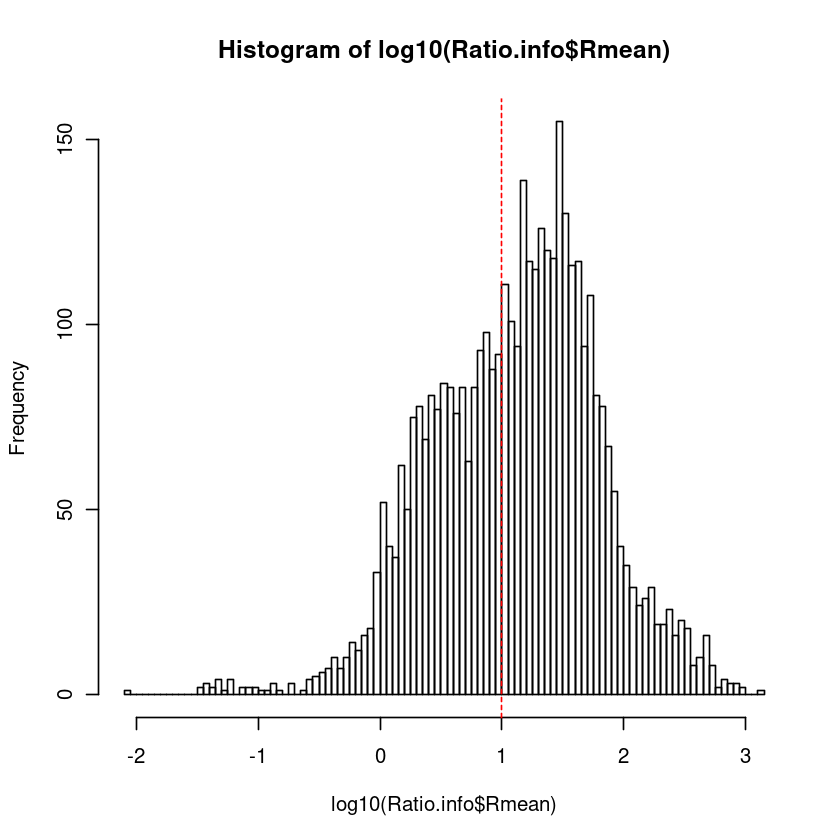

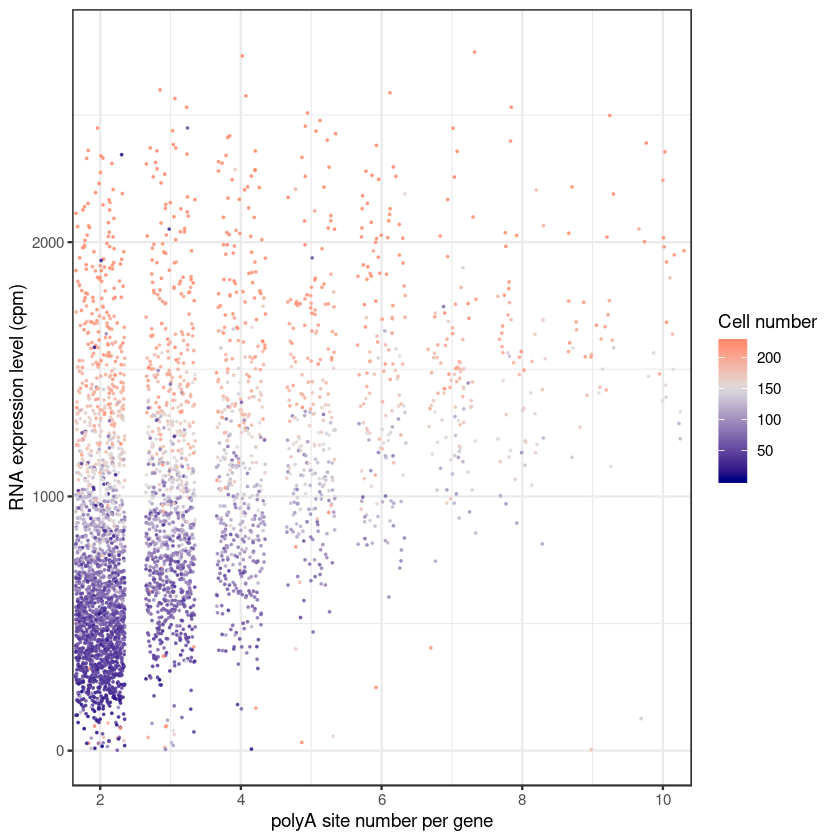

null device 
          1

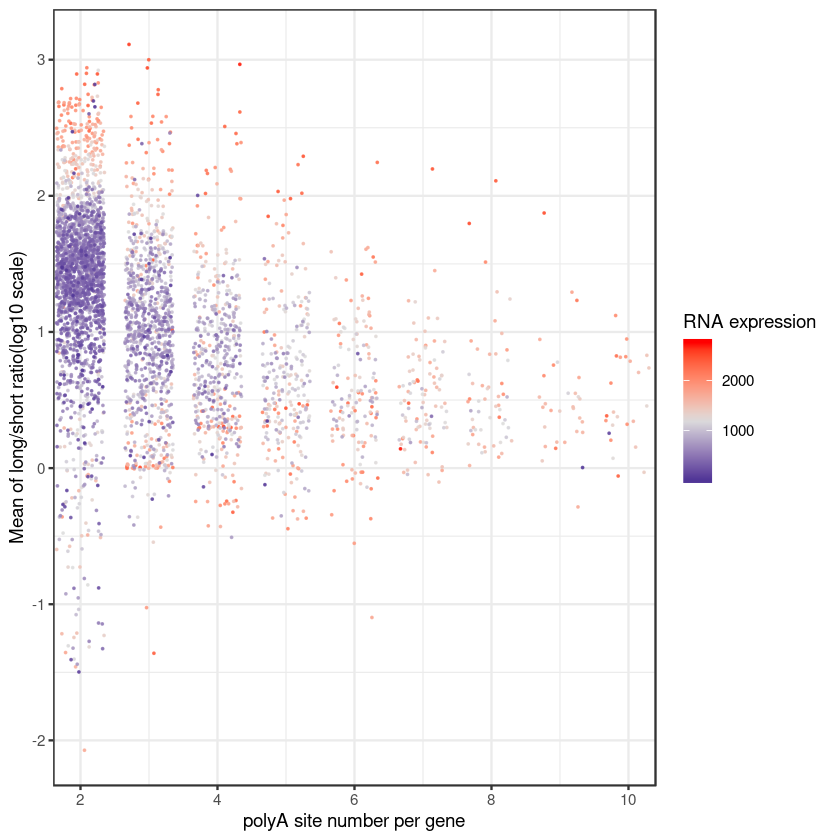

In [877]:
## genes dynamics in all cells
dev.off()
CairoPDF("3_0_gRatio_mean_sd_n_cpm_apaSites_255cell.pdf", width=5, height=4)

library(ggplot2)

if(0){
    # pic1
    ggplot(Ratio.info, aes(log10(Rmean), log10(Rsd), color=Rn))+
        geom_point(size=0.05, alpha=0.5)+
        scale_colour_gradientn('Cell number', colours=c('blue', 'white', 'red') )+
        labs(x="Mean of gene's long/short ratio\nacross cells (log10 scale)", 
             y="Standard deviation of \ngenes' long/short ratio (log10 scale)", 
             title="[One gene one point]")+
        theme_bw()
    # ok: 3 classes;
    
    
    # pic2:
    ggplot(Ratio.info, aes(log10(Rmean), log10(Rsd), color=log2cpm))+
        geom_point(size=0.05, alpha=0.5)+
        #scale_colour_gradientn('RNA expression', colours=c('blue', 'white', 'red') )+
        scale_color_gradient2('RNA expression', low="navy", mid='white',  high="red", midpoint =8 )+
        labs(x="Mean of gene's long/short ratio\nacross cells (log10 scale)", 
             y="Standard deviation of \ngenes' long/short ratio (log10 scale)", 
             title="[One gene one point]")+
        theme_bw()
    # no info
    
    
    ####### pic3: 
    hist( Ratio.info$log2cpm, n=100)
    abline(v=10, col='red')

    ggplot(Ratio.info, aes( log2cpm, Rsd, color=Rn))+
      geom_point(size=0.01, alpha=0.5) + 
      #scale_colour_gradientn('Cell number', colours=c('blue', 'white', 'red') )+
       scale_color_gradient2('Cell number', low="navy", mid='white',  high="red", midpoint =130 )+
      labs(x="RNA expression [log2(cpm+1)]",y="Standard deviation of long/short ratio",
           title="")+
      theme_bw()+
        geom_vline(aes(xintercept=10), colour="black", linetype="dashed")+
        geom_hline(aes(yintercept=100), colour="black", linetype="dashed")
    #
    ggplot(Ratio.info, aes( log2cpm, Rsd, color=Rn))+
      geom_point(size=0.01, alpha=0.8) + 
      #scale_colour_gradientn('Cell number', colours=c('blue', 'white', 'red') )+
       scale_color_gradient2('Cell number', low="navy", mid='white',  high="red", midpoint =130 )+
      labs(x="RNA expression [log2(cpm+1)]",y="Standard deviation of long/short ratio",
           title="Narrow span of y axis")+
      theme_bw()+
        geom_vline(aes(xintercept=10), colour="black", linetype="dashed")+
        geom_hline(aes(yintercept=25), colour="black", linetype="dashed")+
        coord_cartesian(ylim=c(0,100))
    #ok: 3 gene classes;
    
    ###### pic 4
    ggplot(Ratio.info, aes( cpm, log10(Rmean), color=Rn))+
    geom_point(size=0.01, alpha=0.4) + 
    scale_color_gradient2('Cell number', low="navy", mid='white',  high="red", midpoint =120 )+
    labs(x="RNA expression level [cpm]", y="Mean of gene's long/short ratio(log10 scale)")+
    theme_bw()#+
    #coord_cartesian(xlim=c(8,11.5))
    #ok: 3 gene class;
    
    
    ### pic5
    hist(log10(Ratio.info$Rmean), n=100)
    ggplot(Ratio.info, aes( Rn, log2cpm, color=log10(Rmean)))+
        geom_point(size=0.01, alpha=1) + 
        scale_color_gradient2('log10(Ratio mean)', low="navy", mid='white',  high="red", midpoint =1 )+
        labs(x="Cell number", y="RNA expression level [log2(cpm+1)]")+
        theme_bw()#+
        #coord_cartesian(xlim=c(8,11.5))
        #ok: 3 gene class;
    # no info;
    
    
    
}

hist(log10(Ratio.info$Rmean), n=100#, xlim=c(0,20)
    )
abline(v=1,lty=2,col='red')
    ggplot(Ratio.info, aes( apaSites, cpm, color=Rn))+
        #geom_point(size=0.01, alpha=1) + 
         geom_jitter(width=0.35,height=0, size=0.01, alpha=0.8)+
        scale_color_gradient2('Cell number', low="navy", mid='#dddddd',  high="red", midpoint =150 )+
        labs(x="polyA site number per gene", y="RNA expression level (cpm)")+
        theme_bw()+coord_cartesian(xlim=c(2,10))

    ggplot(Ratio.info, aes( apaSites, log10( Rmean), color=cpm))+
        #geom_point(size=0.01, alpha=1) + 
        geom_jitter(width=0.35,height=0, size=0.01, alpha=0.8)+
        #geom_boxplot()+
        scale_color_gradient2('RNA expression', low="navy", mid='#dddddd',  high="red", midpoint =1200 )+
        labs(x="polyA site number per gene", y="Mean of long/short ratio(log10 scale)")+
        theme_bw()+coord_cartesian(xlim=c(2,10))

dev.off()

## gDPAU

In [773]:
table(cellInfo$cellType)


       BC_0        BC_1 HeLa_normal   HeLa_sync 
         87          82          29          27 

### distribution of BC, HeLa

In [775]:
dim(gDPAU) #4103 225
#rownames(orderedGeneNames)
#rownames(gDPAU)

table(is.na(gDPAU))
#FALSE   TRUE 
#481676 441499

[1] 4103  225


 FALSE   TRUE 
481676 441499 

In [1438]:
get_gDPAU=function(cid){
    pl(cid)
    pd(gDPAU)
    
    ## cell subset
    gDPAU2=gDPAU[, cid] #4103  225
    
    # order gene by mean RNA expression level
    keep.gene=intersect(rownames(orderedGeneNames), rownames(gDPAU2))
    pP('gene length', length(keep.gene)) #4028
    gDPAU2=gDPAU2[keep.gene,]
    
    #filter out all NA rows
    keep=apply(gDPAU2, 1, function(x){
        sum(!is.na(x))
    })>=2
    pP('keep:', table(keep) ) #5"    "keep: 4033"
    gDPAU2=gDPAU2[keep,]
    
    # standarlize gDPAU to [0,100]
    gDPAU2=t( apply(gDPAU2, 1, function(x){  
        (x-min(x, na.rm = T)) / ( max(x, na.rm = T)-min(x, na.rm = T) )*100  }) 
    )
    pP('output: ',dim(gDPAU2) )
    return(as.data.frame(gDPAU2))
}
gDPAU.BC=get_gDPAU(cid.BC) #4033  169
write.table(gDPAU.BC, 'gDPAU_BC/00_gDPAU.BC.df.txt')

[1] 169
[1] 4103  225
[1] "gene length 4038"
[1] "keep: 5"    "keep: 4033"
[1] "output:  4033" "output:  169" 


In [1439]:
gDPAU.HeLa=get_gDPAU(cid.HeLa) #4012   56
write.table(gDPAU.HeLa, 'gDPAU_HeLa/00_gDPAU.HeLa.df.txt')

[1] 56
[1] 4103  225
[1] "gene length 4038"
[1] "keep: 26"   "keep: 4012"
[1] "output:  4012" "output:  56"  


In [785]:
(function(){
    df=gDPAU.HeLa['CHCHD2',]
    df2=df[!is.na(df)]
    df2
})()

[1]  78.69342  49.44655  78.10113  78.69342  77.02434  78.69342  77.83813
 [8] 100.00000  78.69342  77.93150  78.69342  78.69342  75.42882  10.51235
[15]  78.69342  78.26841  78.69342  78.69342  78.69342  78.69342  78.69342
[22]  78.69342  78.69342   0.00000  77.18864  78.69342  80.15039  74.90185
[29]  78.03649  78.19442  78.15268  78.69342  86.87473  78.69342  78.69342
[36]  79.30644  78.69342  78.69342  78.69342  74.53034  78.21689  78.69342
[43]  78.56146  72.32960  78.12062  78.69342  77.87310  78.69342  78.69342
[50]  78.69342  77.00384  74.80564  79.96327  78.69342  66.86332

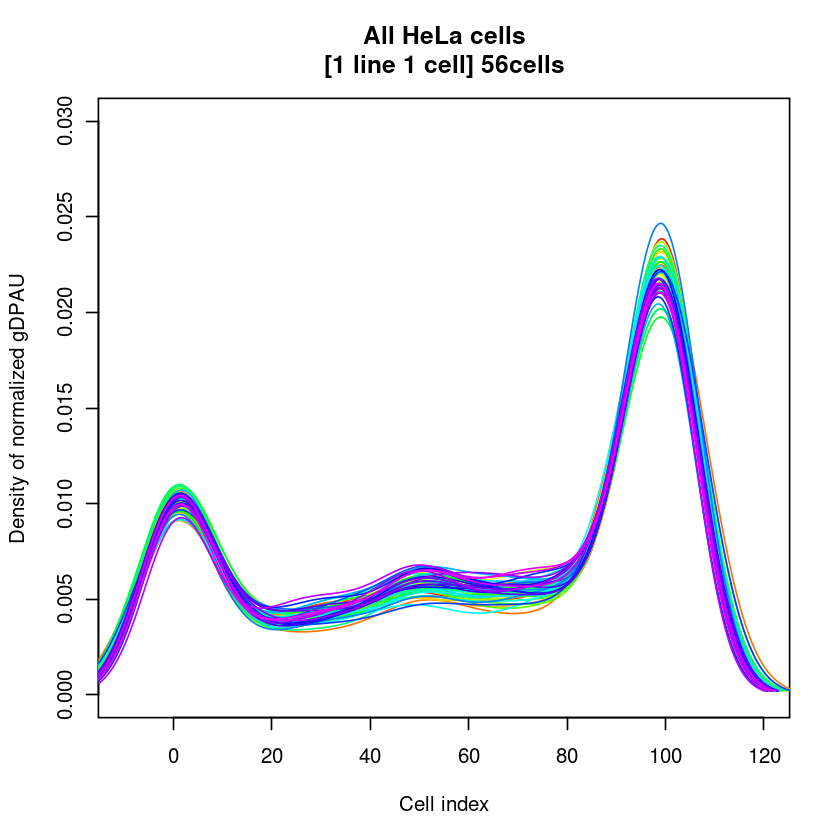

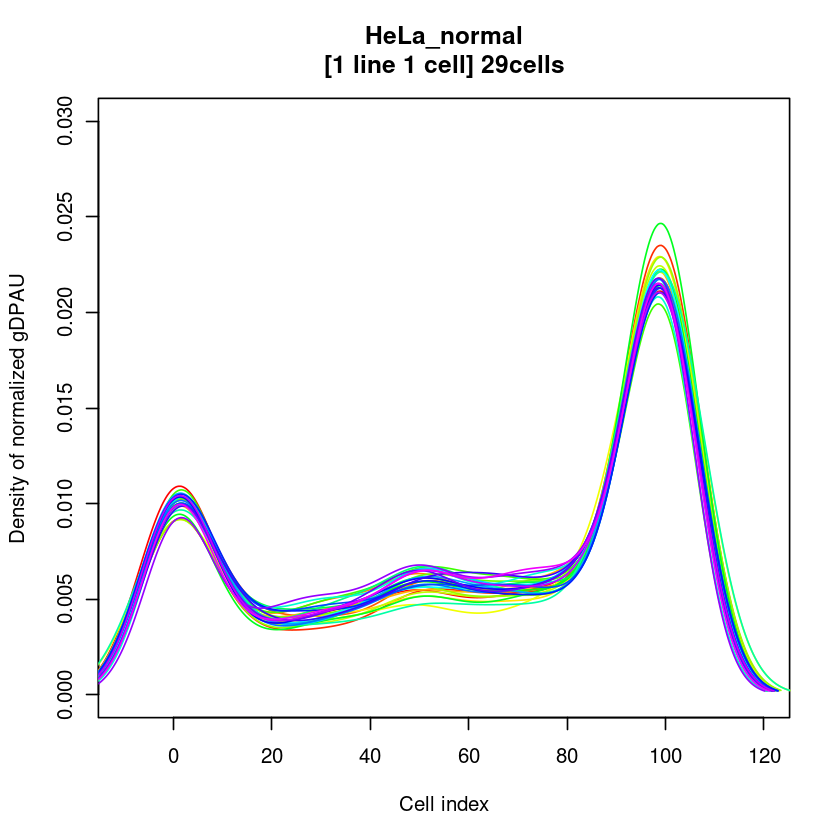

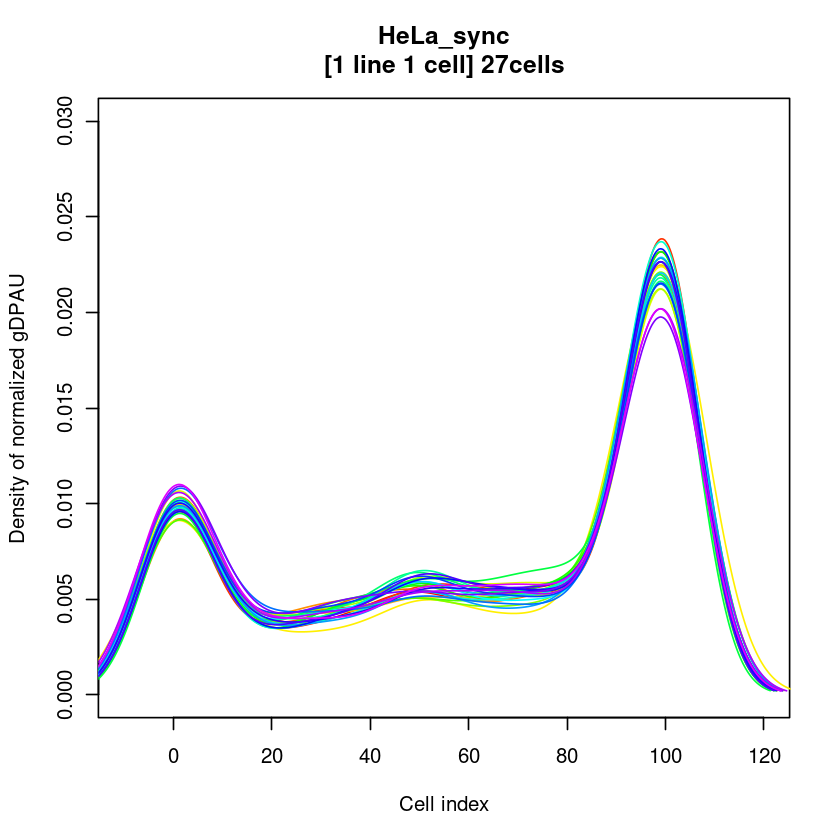

[1] "draw1 END=================<<<< All genes in HeLa 34 genes are too few non-NA values \n"


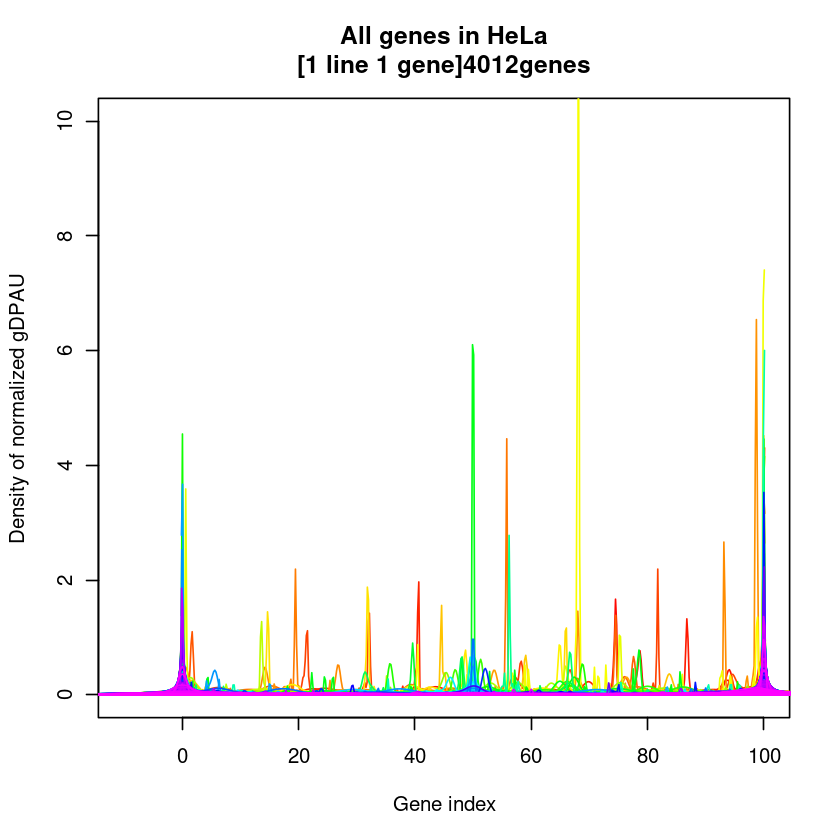

[1] "draw1 END=================<<<< All genes in HeLa 34 genes are too few non-NA values \n"


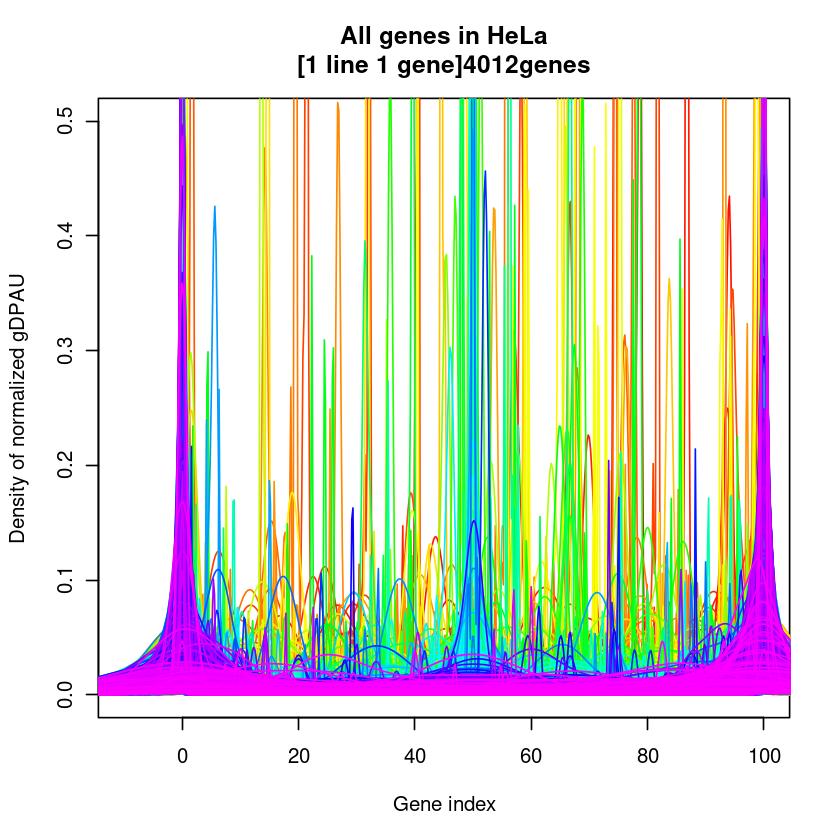

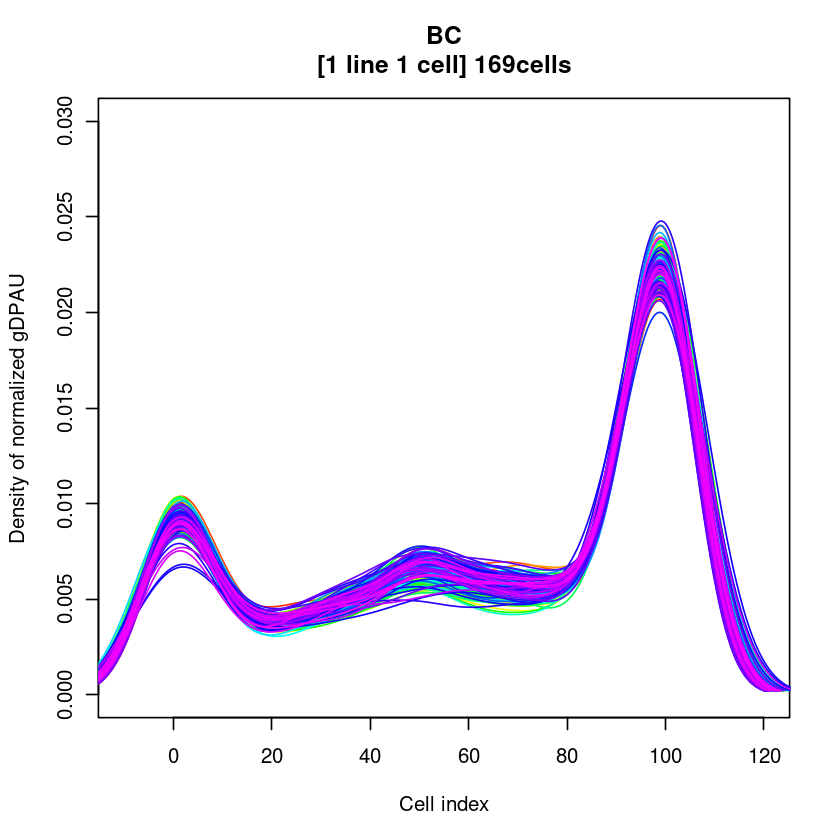

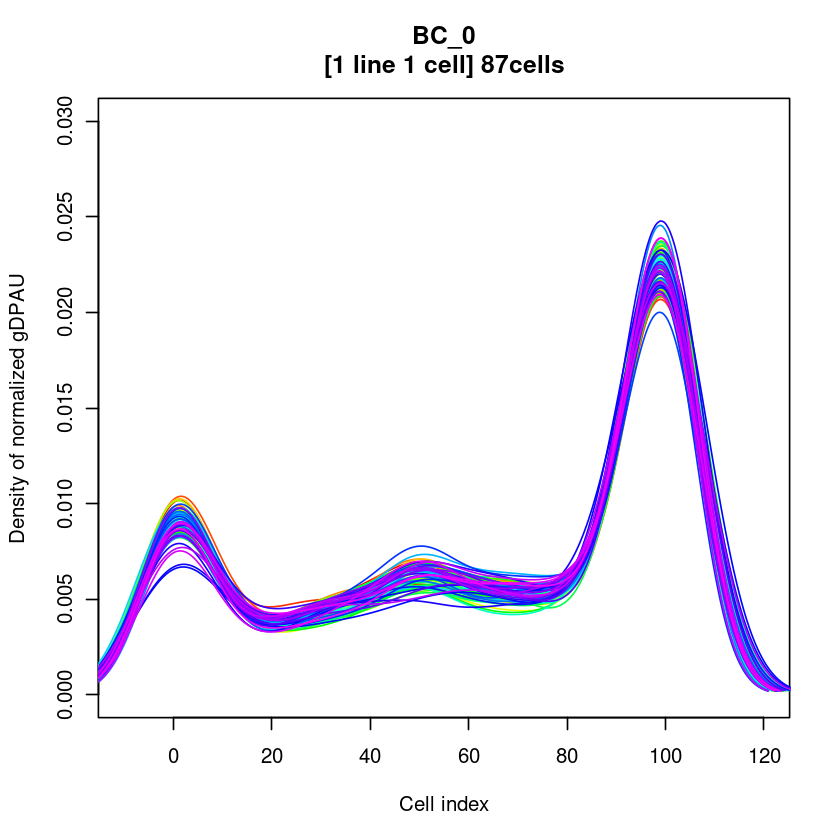

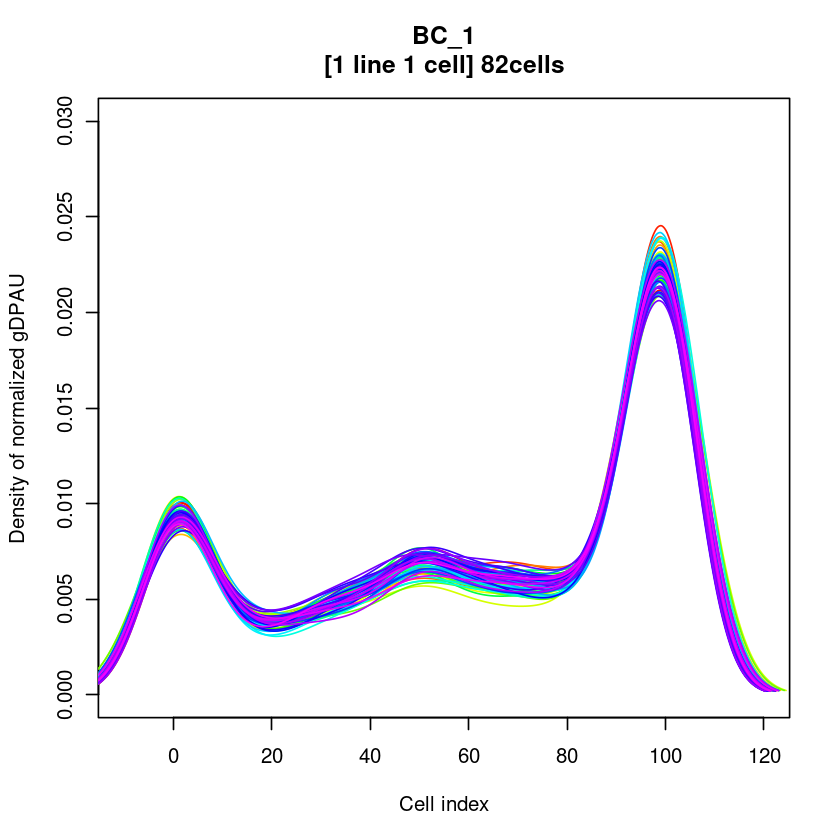

[1] "draw1 END=================<<<< BC 7 genes are too few non-NA values \n"


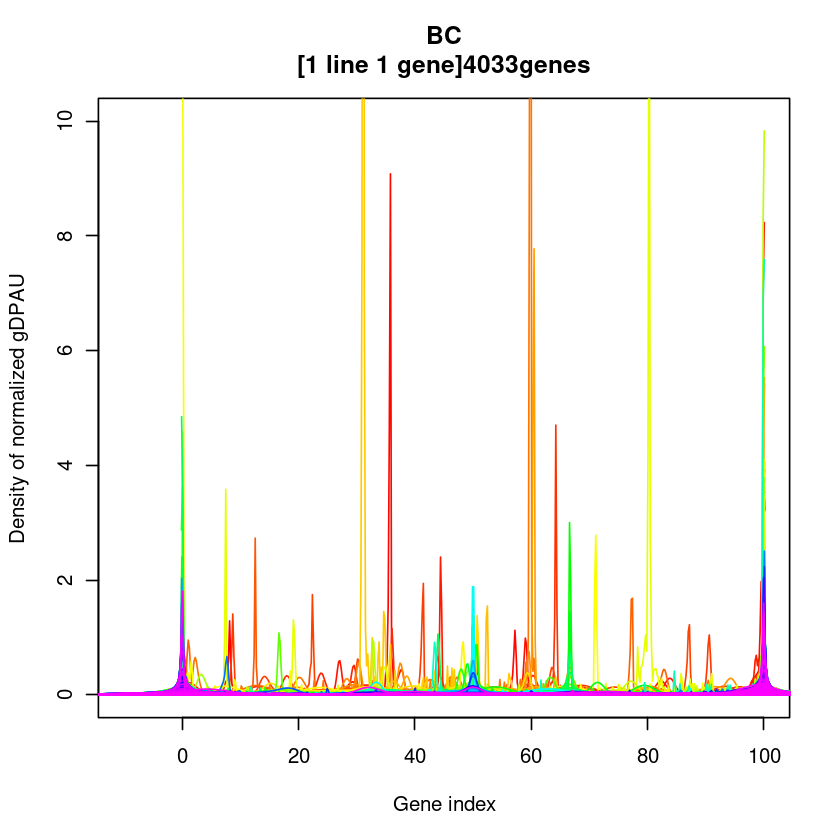

[1] "draw1 END=================<<<< BC(shorter y) 7 genes are too few non-NA values \n"


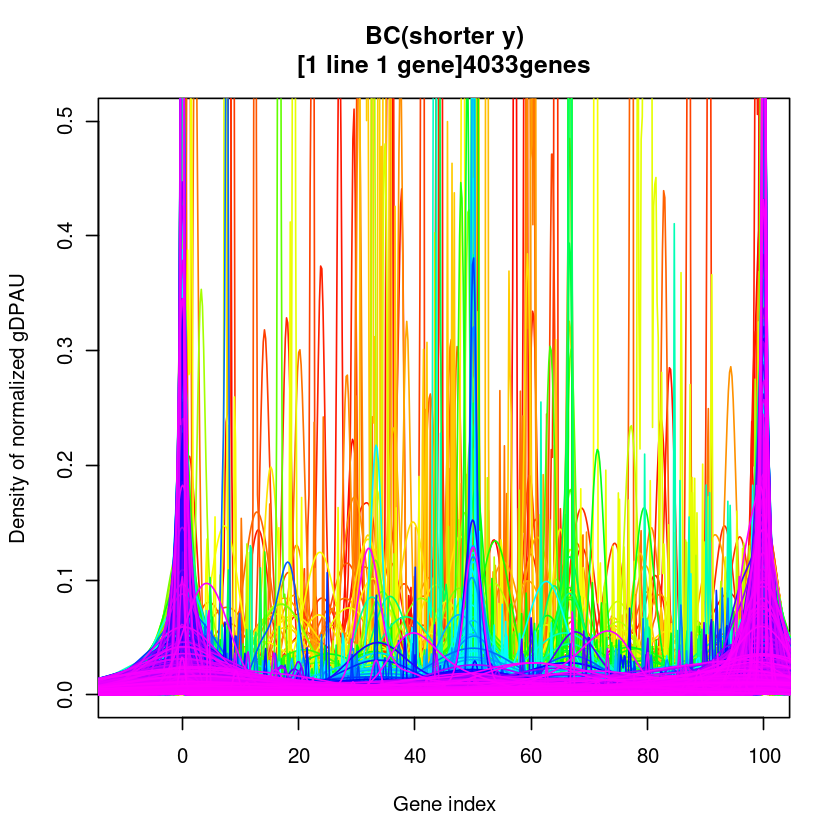

In [788]:
(function(){
    ##########################
    # begin ploting
    ##########################
    # 1 line 1 cell
    draw0=function(df, main="All HeLa cells", ylim=c(0,0.03)){
        #df=gDPAU2
        plot( NULL, xlim=c(-10,120), ylim=ylim, 
             xlab="Cell index", ylab="Density of normalized gDPAU",
             main=paste0(main, "\n[1 line 1 cell] ", ncol(df), 'cells') )
        colors=rainbow(ncol(df)*1.2)
        gRatio2=gRatio2[, colnames(df)]
        for(i in 1:ncol(df)){
            # filter NA
            arr=as.numeric( df[, i] )
            keep=!is.na(arr)
            gDistal=arr[keep]
            lines( density(gDistal), col=colors[i])
        }
    }
    draw0(gDPAU.HeLa)
    draw0(gDPAU.HeLa[, rownames(cellInfo[which(cellInfo$cellType=="HeLa_normal"),])], main="HeLa_normal")
    draw0(gDPAU.HeLa[, rownames(cellInfo[which(cellInfo$cellType=="HeLa_sync"),])], main="HeLa_sync")
    #
    
    ##########################
    # 1 line 1 gene
    draw1=function(df, main="All genes in HeLa", ylim=c(0,10)){
        #df=gDPAU2
        plot( NULL, xlim=c(-10,100), ylim=ylim, 
             xlab="Gene index", ylab="Density of normalized gDPAU",
             main= paste0(main, "\n[1 line 1 gene]",nrow(df), 'genes') )
        colors=rainbow(nrow(df)*1.2)
        gRatio2=gRatio2[, colnames(df)]
        
        tooShort=c();
        for(i in 1:nrow(df)){
            gene=rownames(df)[i]
            # filter NA
            arr=as.numeric( df[i, ] )
            keep=!is.na(arr)
            gDistal=arr[keep]

            if(length(gDistal)<2){
                #print(rownames(df)[i])
                tooShort=c(tooShort, gene)
                next;
            }
            lines( density(gDistal), col=colors[i])
        }
        pP('draw1 END=================<<<<', main, length(tooShort), 'genes are too few non-NA values','\n')
    }
    draw1(gDPAU.HeLa)
    draw1(gDPAU.HeLa,ylim=c(0, 0.5))
    
    #####################
    # for BC
    draw0(gDPAU.BC, main="BC")
    draw0(gDPAU.BC[, rownames(cellInfo[which(cellInfo$cellType=="BC_0"),])], main="BC_0")
    draw0(gDPAU.BC[, rownames(cellInfo[which(cellInfo$cellType=="BC_1"),])], main="BC_1")
    #
    draw1(gDPAU.BC, main="BC")
    draw1(gDPAU.BC, main="BC(shorter y)", ylim=c(0, 0.5))
})()

#### 1 cell 1 line

[1] 225


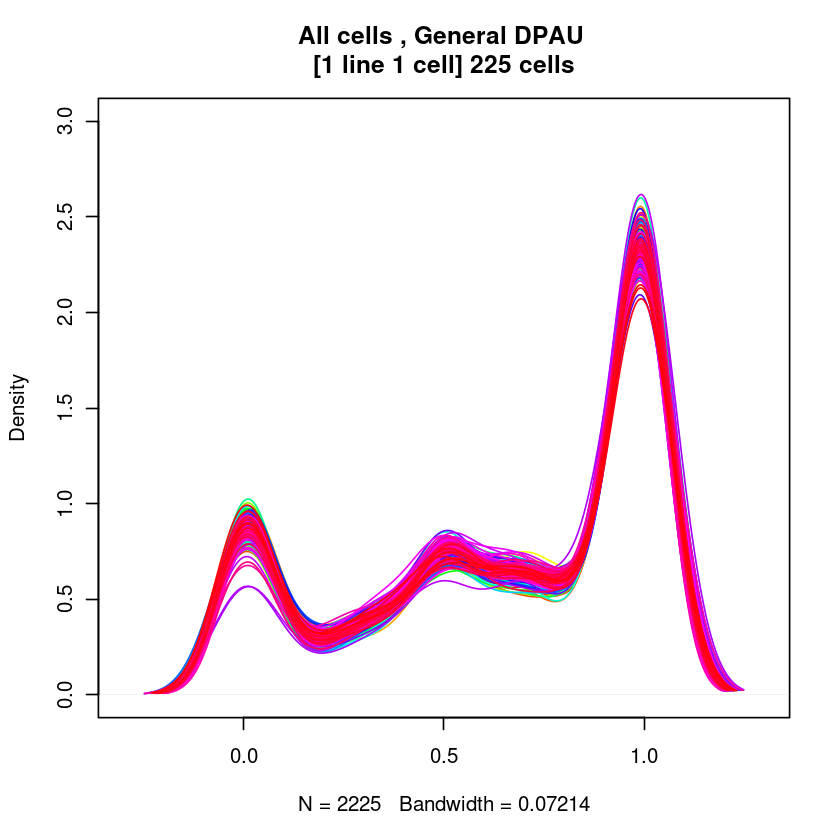

In [789]:
# 1 cell 1 line
plotDens=function(mt, xlim=c(-0.3,1.3), ylim=c(0,3), title=""){
    #mt=gDPAU
    plot(density(mt[, 1], na.rm = T),xlim=xlim, ylim=ylim, 
         main=paste(title, ", General DPAU \n[1 line 1 cell]", ncol(mt),'cells'),
         col=rainbow(ncol(mt))[1])
    #
    for(i in 1:ncol(mt)){
        cid=colnames(mt)[i]
        #if(i<5)pP(i, cid)
        lines(density(mt[, cid], na.rm = T), col=rainbow(ncol(mt))[i])
    }
    print(i)
}
plotDens(gDPAU, title="All cells")

[1] 169
[1] 87
[1] 82


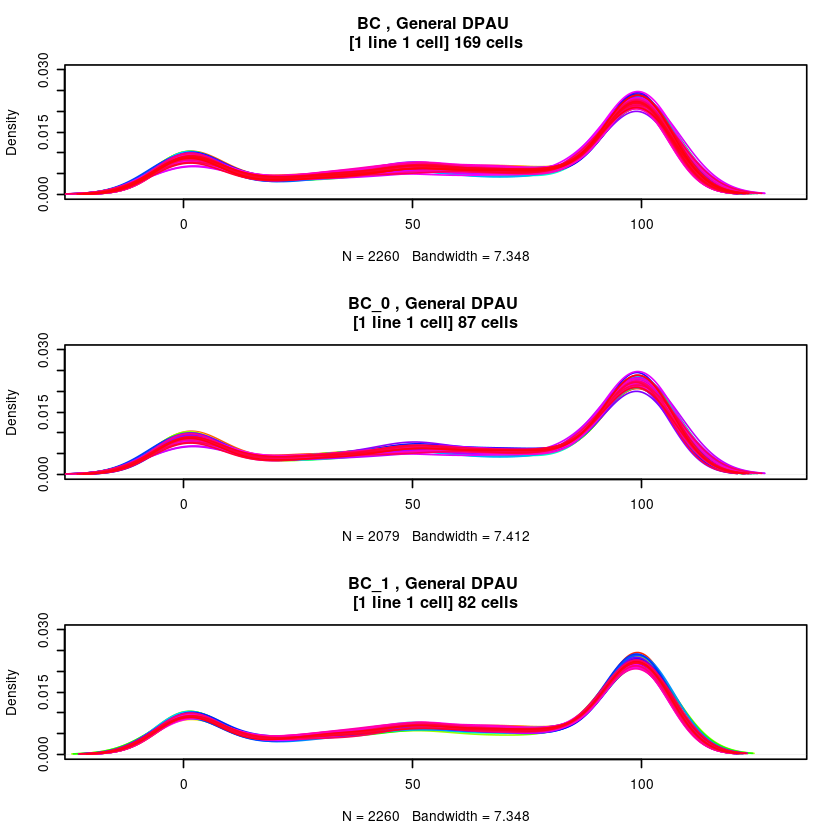

In [790]:
# 1 cell 1 line: BC
par(mfrow=c(3,1))
plotDens(gDPAU.BC, title="BC", xlim=c(-20,130), ylim=c(0,0.03))
plotDens(gDPAU.BC[,rownames(cellInfo[cellInfo$cellType=="BC_0", ])], title="BC_0", xlim=c(-20,130), ylim=c(0,0.03))
plotDens(gDPAU.BC[,rownames(cellInfo[cellInfo$cellType=="BC_1", ])], title="BC_1", xlim=c(-20,130), ylim=c(0,0.03))

[1] 56
[1] 27
[1] 29


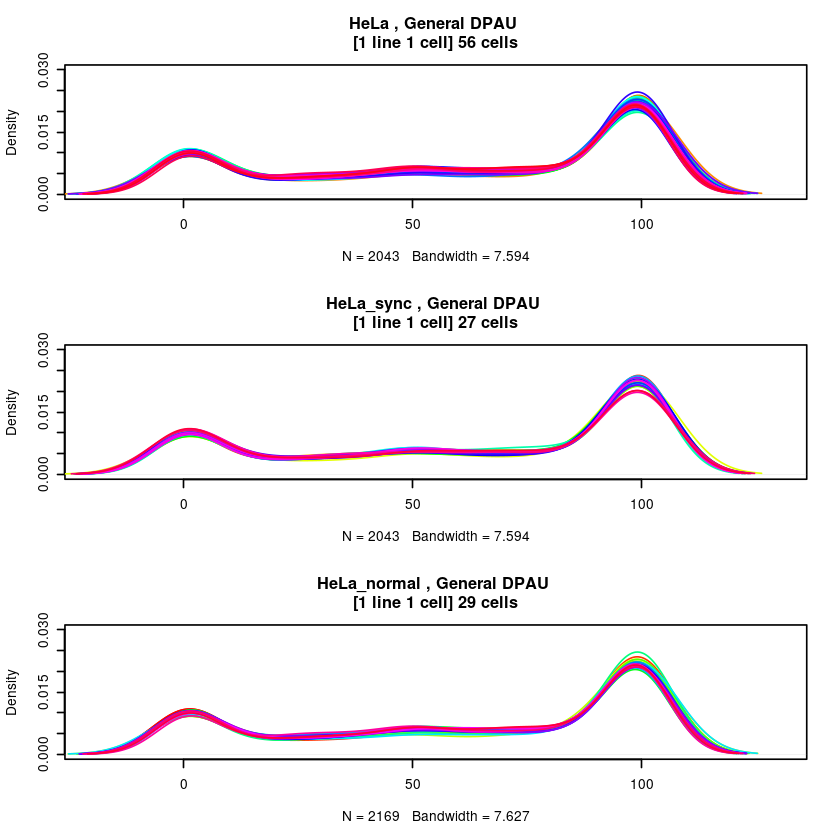

In [791]:
# 1 cell 1 line: HeLa
par(mfrow=c(3,1))
plotDens(gDPAU.HeLa, title="HeLa", xlim=c(-20,130), ylim=c(0,0.03))

plotDens(gDPAU.HeLa[,rownames(cellInfo[cellInfo$cellType=="HeLa_sync", ])], title="HeLa_sync", xlim=c(-20,130), ylim=c(0,0.03))
plotDens(gDPAU.HeLa[,rownames(cellInfo[cellInfo$cellType=="HeLa_normal", ])], title="HeLa_normal", xlim=c(-20,130), ylim=c(0,0.03))

#### 1 gene 1 line

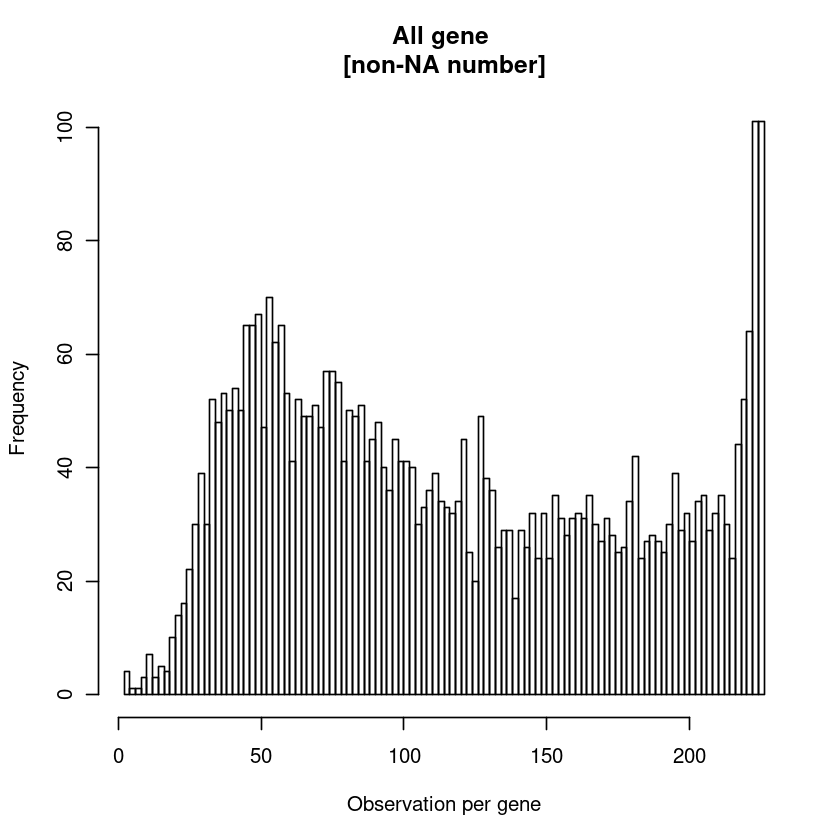

[1] "4103 4102"


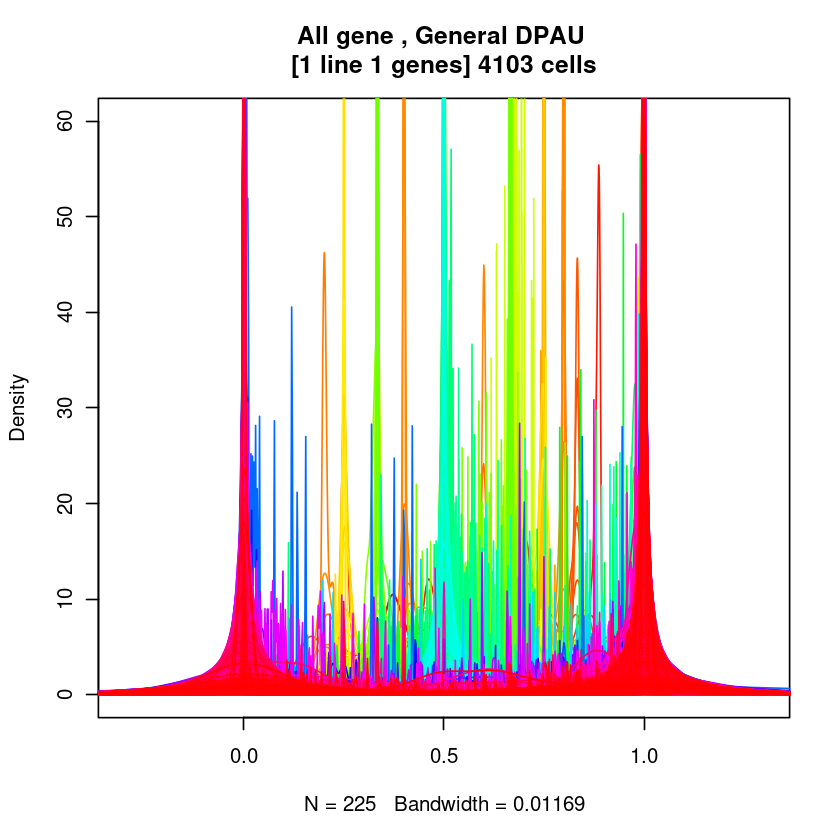

In [975]:
# 1 cell 1 line
plotDensGene=function(mt, xlim=c(-0.3,1.3), ylim=c(0,30), title=""){
    #mt=gDPAU
    mt=t(mt)
    
    obsPerGene=apply(mt, 2, function(x){
        sum(!is.na(x))
    });
    hist( obsPerGene, n=100, xlab="Observation per gene", main=paste(title,'\n[non-NA number]') )
    
    plot(density(mt[, 1], na.rm = T),xlim=xlim, ylim=ylim, 
         main=paste(title, ", General DPAU \n[1 line 1 genes]", ncol(mt),'cells'),
         col=rainbow(ncol(mt))[1])
    #
    j=0
    for(i in 1:ncol(mt)){
        gene=colnames(mt)[i]
        arr=as.numeric( mt[, gene] )
        arr=arr[!is.na(arr)]
        if(length(arr)>2){
            j=j+1
            lines(density(arr), col=rainbow(ncol(mt))[i])
        }
    }
    pP(i, j)
}
plotDensGene(gDPAU, title="All gene",ylim=c(0,60))

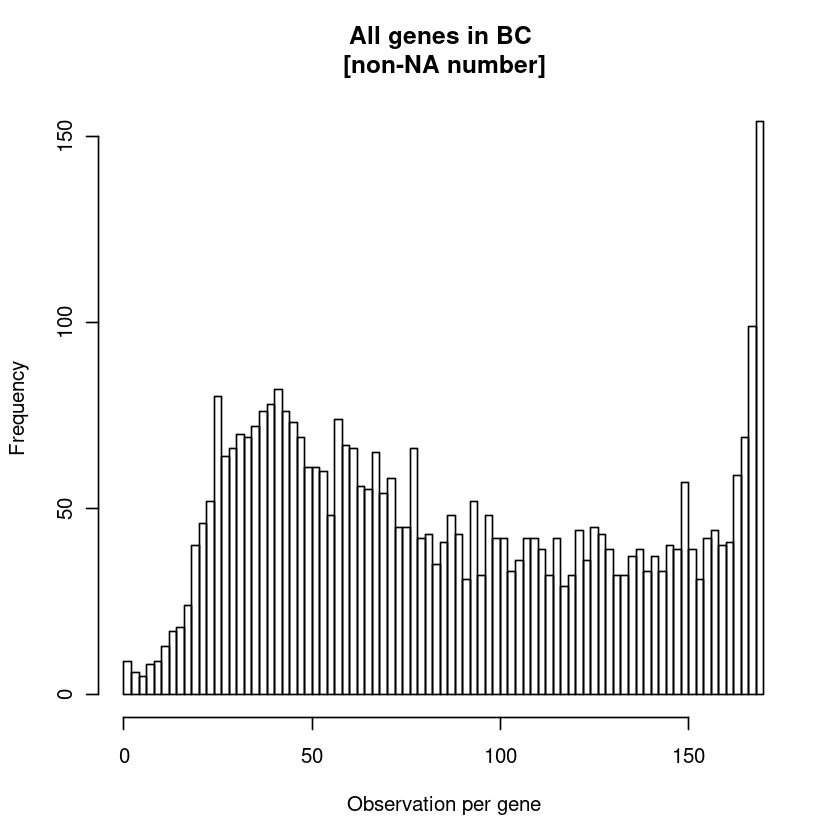

[1] "4033 4024"


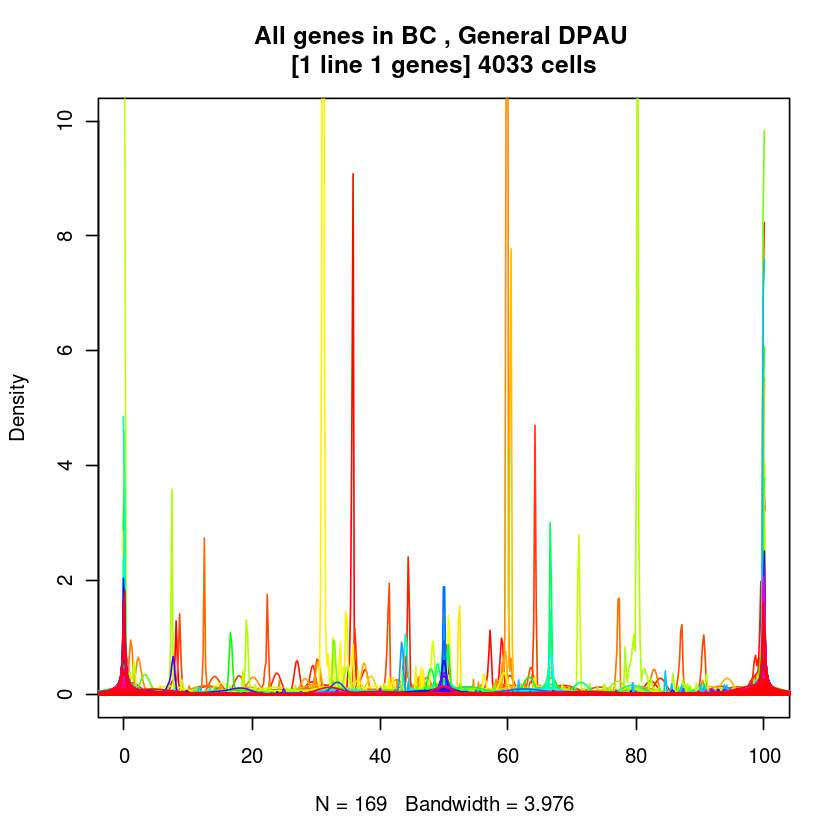

In [976]:
plotDensGene(gDPAU.BC, title="All genes in BC",xlim=c(0,100),ylim=c(0,10))

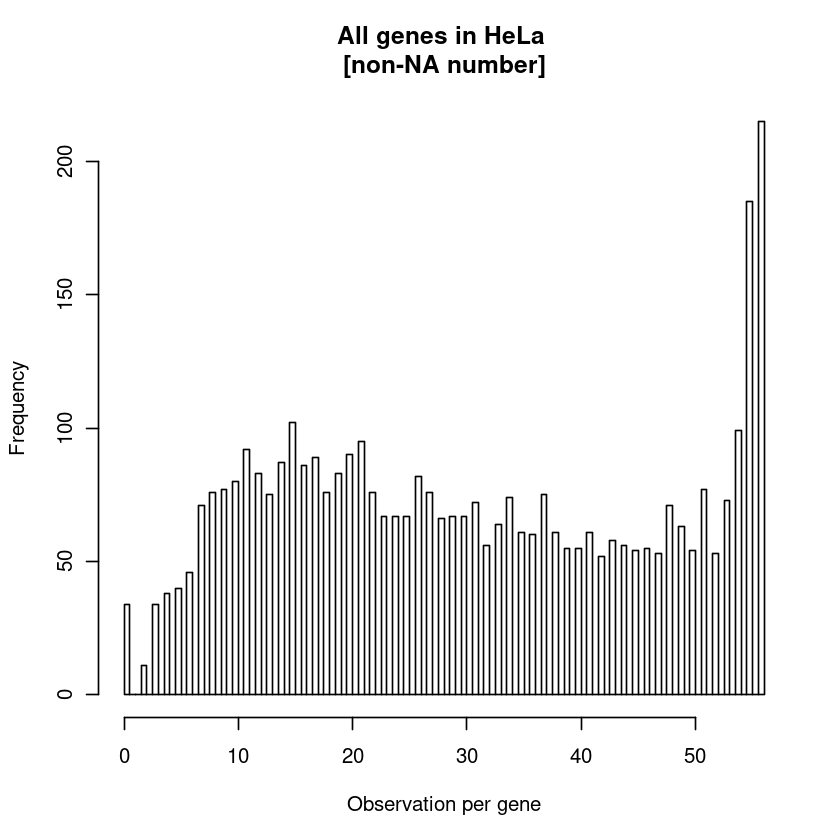

[1] "4012 3967"


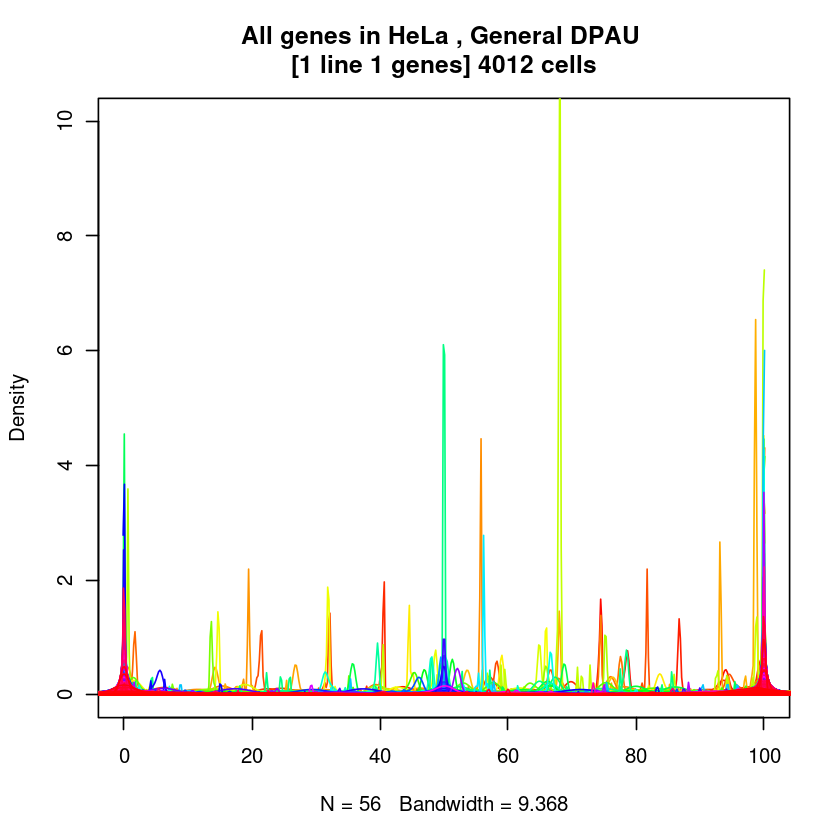

In [977]:
plotDensGene(gDPAU.HeLa, title="All genes in HeLa",xlim=c(0,100),ylim=c(0,10))

#### 2polyA gene(1 line / cell)

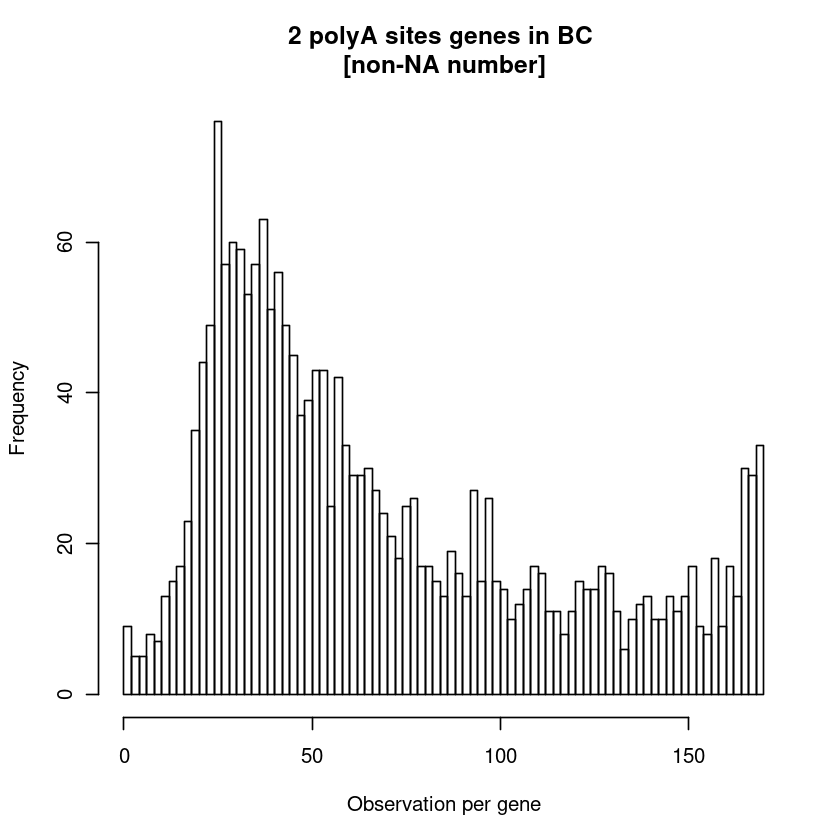

[1] "2032 2023"


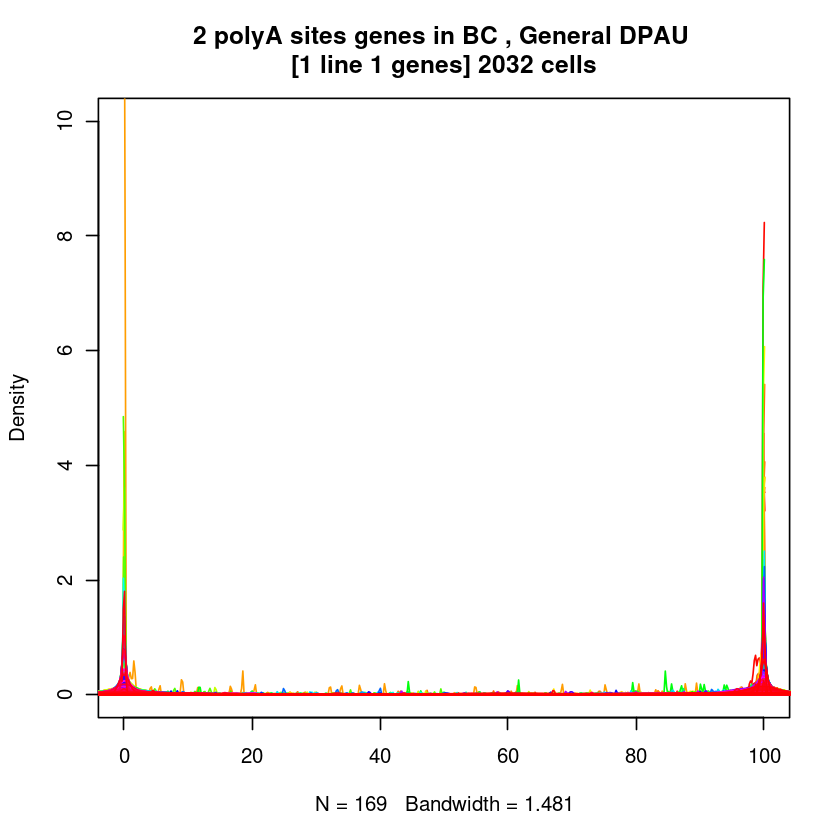

In [983]:
plotDensGene(gDPAU.BC[ intersect(rownames( gDPAU.BC ), 
                                   rownames(polyAsites.per.gene[polyAsites.per.gene$apaSites==2,]) ),], 
             title="2 polyA sites genes in BC",xlim=c(0,100),ylim=c(0,10))

#### 2polyA genes(1 line/gene)

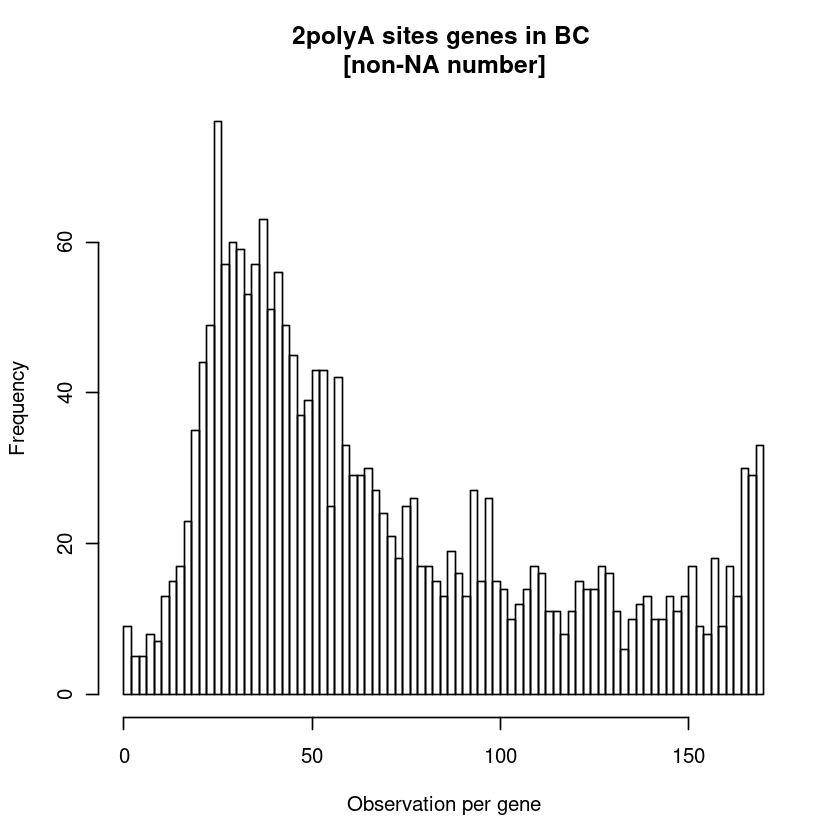

[1] "2032 2023"


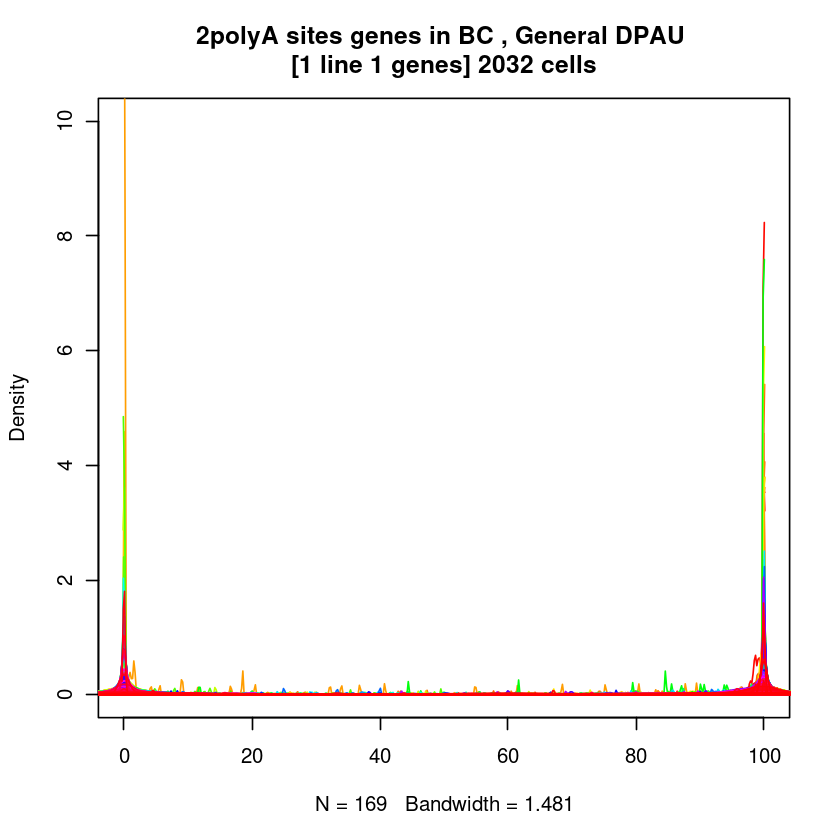

In [979]:
# gene with 2 polyA sites;
plotDensGene(gDPAU.BC[ intersect(rownames( gDPAU.BC ), 
                                   rownames(polyAsites.per.gene[polyAsites.per.gene$apaSites==2,]) ),], 
             title="2polyA sites genes in BC",xlim=c(0,100),ylim=c(0,10))

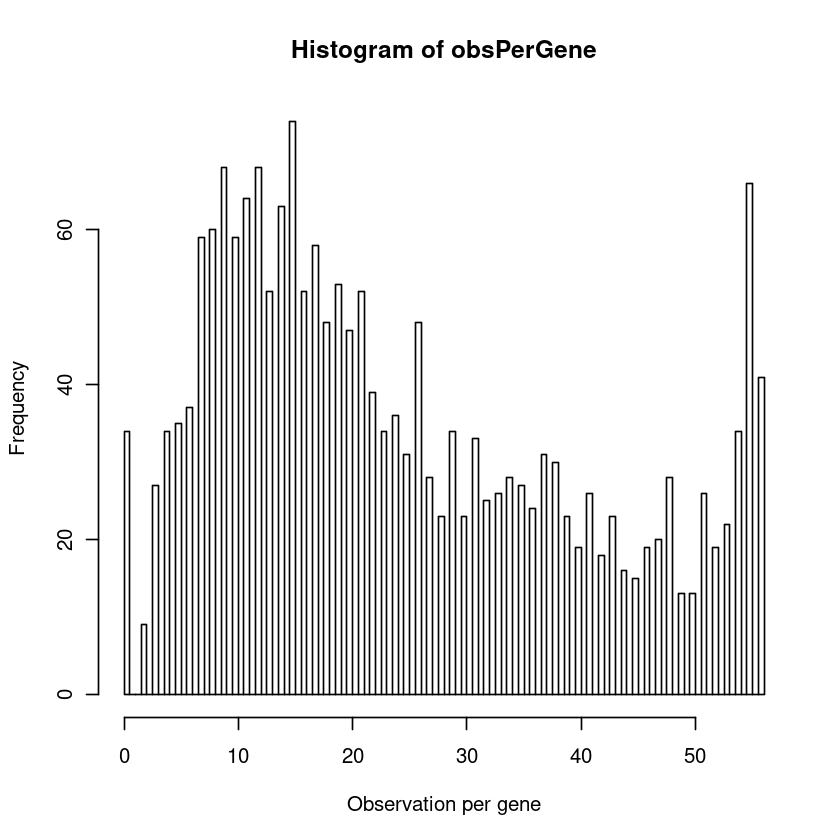

[1] "2014 1971"


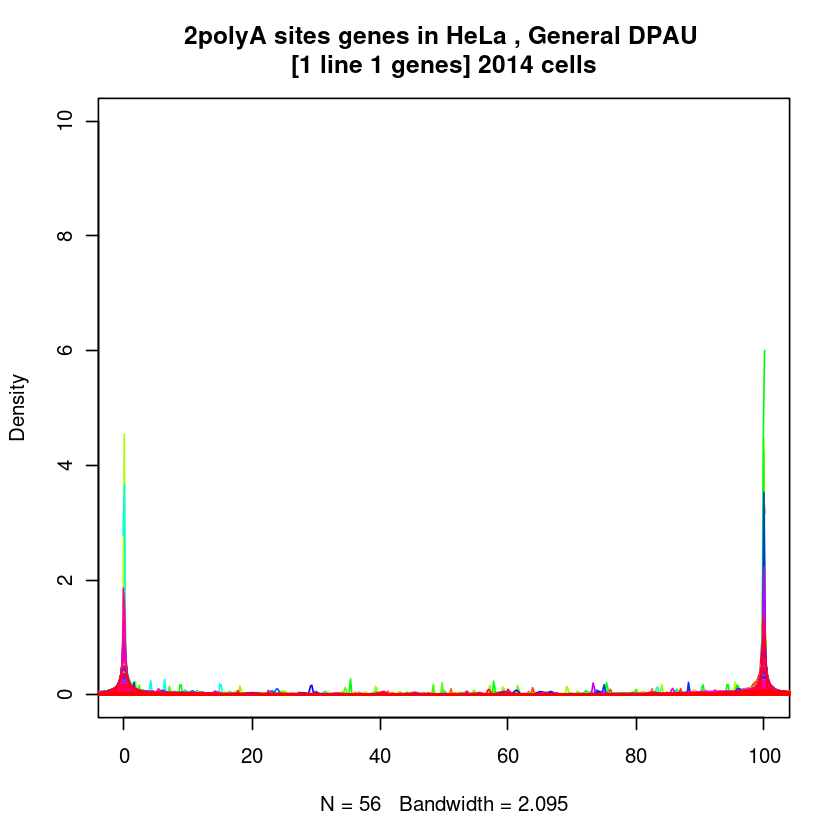

In [809]:
# gene with 2 polyA sites;
plotDensGene(gDPAU.HeLa[ intersect(rownames( gDPAU.HeLa ), 
                                   rownames(polyAsites.per.gene[polyAsites.per.gene$apaSites==2,]) ),], 
             title="2polyA sites genes in HeLa",xlim=c(0,100),ylim=c(0,10))

#### heatmap

In [922]:
table(is.na(gDPAU.HeLa))


 FALSE   TRUE 
121978 102694 

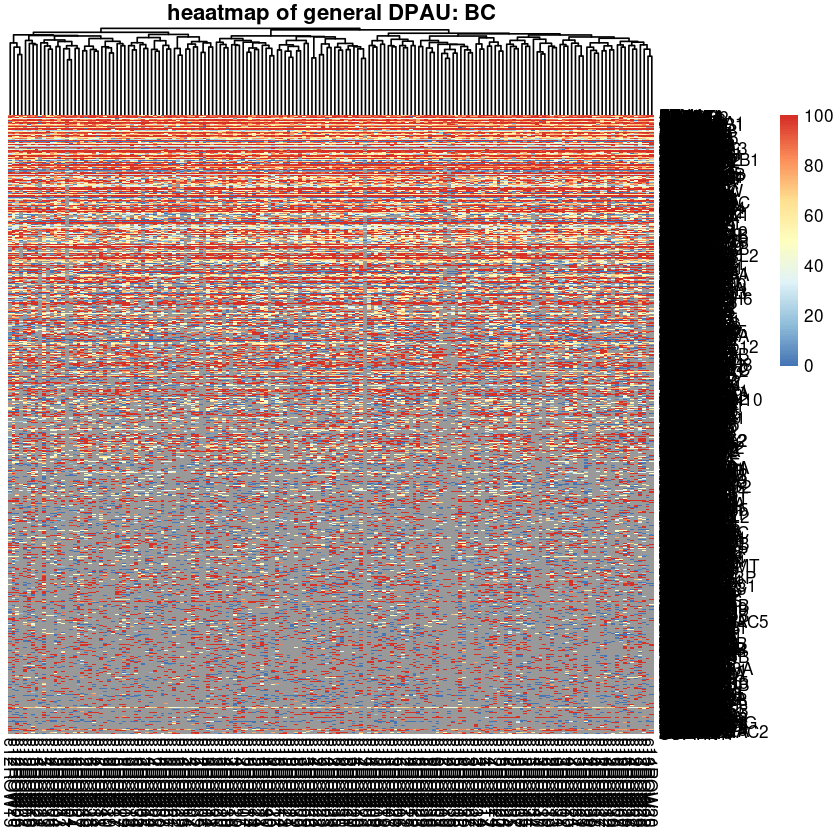

In [932]:
pheatmap(gDPAU.BC, border_color = NA, #scale='row',
        clustering_method="ward.D2", na_col ="grey60",
        cluster_rows=F,  #对row聚类会报错 
        main="heaatmap of general DPAU: BC")

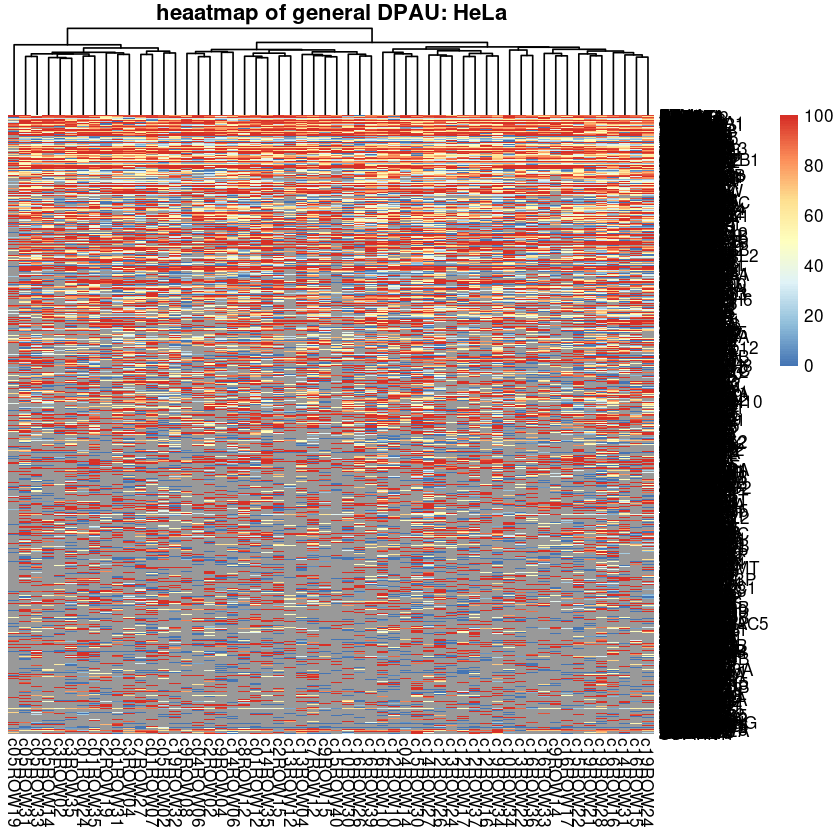

In [941]:
# consume 15s
pheatmap(gDPAU.HeLa, border_color = NA, #scale='row',
        clustering_method="ward.D2", na_col ="grey60",
         
        cluster_rows=F,  #对row聚类会报错 
        main="heaatmap of general DPAU: HeLa")

### gene feature(APA and RNA): BC and HeLa

In [1017]:
getGeneMD_gDPAU=function(df, output, keyword){
    #df=gDPAU.BC
    #keyword="BC"
    #apaSites=4

    pd(df)
    ph(df[, 1:4])
    #tail(df[, 1:4])
    
    ####### get each gene's non-NA cell number, mean, sd of gDPAU
    draw01=function(apaSites=0, test=F){
        rsDF=NULL
        j=0;
        for(i in 1:nrow(df)){
            gene=rownames(df)[i]

            #filter gene, by polyA sites/gene
            if(test==T){
                if( polyAsites.per.gene[gene, 'apaSites']!=apaSites ){
                    next;
                }
            }
            j=j+1

            dataRow1=df[gene, which( !is.na(df[gene,]) )];
            tmp=as.numeric(dataRow1)

            if(length(tmp)<2){
                printP(i, ' ', gene)
                next;
            }

            tmpDF=data.frame(
                gene=gene,
                gDPAUcellNumber=length(tmp),
                meangDPAU=mean(tmp),
                sdgDPAU=sd(tmp)
            )
            rsDF=rbind(rsDF, tmpDF)
        } #10seconds
        #
        rownames(rsDF)=rsDF$gene
        dim(rsDF) #2036 4
        head(rsDF)
        #    gene cellNumber meangDPAU     sdgDPAU
        #1   RPL8        225 99.86553  0.3462266
        #2   RPL3        225 99.73653  0.9470744
        #3  RPS23         19 82.75423 36.9176673
        #View(rsDF)
        plot(rsDF$mean, rsDF$sd, cex=0.5,
             xlab="Mean of gDPAU", ylab="sd of gDPAU", sub="[One gene one point]", col="#00000055",
             main=paste(keyword, ncol(df), "cells\n",apaSites," polyA sites per gene,", j, 'genes') )
        return(rsDF)
    }
    
    CairoPDF(paste0(output, keyword,'_gene_mean_sd_byPolyA_per_gene.pdf'), width=3*5, height=3*2 )
    par(mfrow=c(2,5))
    for(d in 2:10){
        #message(d)
        draw01(d, test=T)
    }
    rt=draw01('ALL',test=F)
    dev.off()
    pd(rt)
    #
    return(rt)
}

GeneMD_gDPAU.BC=getGeneMD_gDPAU(gDPAU.BC, 'gDPAU_BC/', 'BC')

[1] 4033  169
       c12ROW02 c12ROW03 c12ROW04 c12ROW05
PTMA   40.83419 55.21355 59.73642 65.36816
FTH1   37.21289 73.10386 40.01211 43.07042
RPS11  93.33746 91.43975 71.92043 95.44972
MALAT1 53.77369 18.71030 76.25607 18.99599
GAPDH  99.63121 98.11620 98.04088 98.29165
RPS27A 63.06015 43.98759 53.56557 51.21513
[1] "3076   CPS1"
[1] "3727   CRTC3"
[1] "3753   BMP6"
[1] "3864   PICSAR"
[1] "3937   KLF13"
[1] "3940   PCGF2"
[1] "4004   HMGA2"
[1] "3076   CPS1"
[1] "3727   CRTC3"
[1] "3753   BMP6"
[1] "3864   PICSAR"
[1] "3937   KLF13"
[1] "3940   PCGF2"
[1] "4004   HMGA2"
[1] 4026    4


In [1018]:
GeneMD_gDPAU.HeLa=getGeneMD_gDPAU(gDPAU.HeLa, 'gDPAU_HeLa/', 'HeLa')

[1] 4012   56
        c01ROW24 c01ROW35 c01ROW31 c05ROW02
PTMA    64.23496 47.06687 54.81510 80.21611
FTH1    26.52436 79.66808 62.37912 14.06122
RPS11   95.59990 96.07937 96.13359 92.32248
MALAT1  45.58899 25.46391 40.54748 32.77072
GAPDH  100.00000 95.04583 33.57746 98.85973
RPS27A  42.74916 52.61888 61.39453 39.89367
[1] "1230   TMEM54"
[1] "1807   MAGI3"
[1] "2031   WWTR1"
[1] "2189   TMPRSS2"
[1] "2205   TBC1D1"
[1] "2590   CTSH"
[1] "2909   IP6K2"
[1] "2934   NIN"
[1] "2999   ZNF354A"
[1] "3014   GCLC"
[1] "3051   MPP5"
[1] "3165   FRMD4A"
[1] "3252   CSKMT"
[1] "3261   CENPC"
[1] "3296   MAP4K5"
[1] "3386   ZNF704"
[1] "3410   CYYR1"
[1] "3471   SNAPC1"
[1] "3521   TRAF3IP1"
[1] "3534   TRIM4"
[1] "3606   RALGAPA1"
[1] "3641   SPOPL"
[1] "3719   CRTC3"
[1] "3755   NMU"
[1] "3765   WDR75"
[1] "3782   LRRC8A"
[1] "3788   CCDC71L"
[1] "3808   CUTALP"
[1] "3814   STARD13"
[1] "3866   WNK2"
[1] "3957   ARHGEF6"
[1] "3959   DHRS12"
[1] "3975   SPSB2"
[1] "3993   SLC6A11"
[1] "1230   T

#### add RNA read counts for each genes

In [1064]:
###
# add RNA read counts for each genes

getGenefeatures25=function(df,cid, output, keyword){
    #df=GeneMD_gDPAU.BC
    
    # RNA level
    df2=getDF_fromNamesXX( apply(rnaM.cpm[,cid],1,sum) )
    
    # polyA sites
    df3=polyAsites.per.gene
    #
    gene.common=intersect(rownames(df2), rownames(df))
    df=df[gene.common,]
    df2=df2[gene.common,]
    df3=df3[gene.common,]
    #
    df$cpm=df2$value
    #
    df$log2cpm=log2(1+df$cpm)
    df$polyAsites=df3$apaSites
    df$cv=df$sdgDPAU / df$meangDPAU
    #
    df=df[,-1]
    debug(df) #4033    6
    
    #save to file
    write.table(df, paste0(output, keyword, '_gene_gDPAUcellNumber_meanDPAU_sdDPAU_RNACounts_cpm_polyASites.txt') )
    return(df)
}

##
genefeatures.BC=getGenefeatures25(GeneMD_gDPAU.BC, cid.BC, "gDPAU_BC/", 'BC') #4033    6
genefeatures.HeLa=getGenefeatures25(GeneMD_gDPAU.HeLa, cid.HeLa, "gDPAU_HeLa/", 'HeLa') #4012    6

[1] 18679     2
           name   value
MT-ATP6 MT-ATP6 7536759
MT-ND4   MT-ND4 7356263
MT-RNR2 MT-RNR2 4994112
MT-CO2   MT-CO2 4164762
MT-CYB   MT-CYB 3699379
MT-CO3   MT-CO3 3654738
[1] 4026    7
       gDPAUcellNumber meangDPAU   sdgDPAU       cpm  log2cpm polyAsites
PTMA               169  74.07068 14.857189 1128041.4 20.10539         18
FTH1               169  45.43764 15.618550  980453.5 19.90309          7
RPS11              169  89.54276 11.404671  877676.8 19.74333          4
MALAT1             169  39.03473 16.633021  724454.1 19.46654         46
MGP                169  94.82888  9.872078  702973.8 19.42311         10
CHCHD2             169  49.20701  9.220026  539251.5 19.04060          5
              cv
PTMA   0.2005812
FTH1   0.3437359
RPS11  0.1273656
MALAT1 0.4261083
MGP    0.1041041
CHCHD2 0.1873722
[1] 18679     2
           name   value
MT-ATP6 MT-ATP6 2199957
MT-ND4   MT-ND4 2102535
MT-RNR2 MT-RNR2 1367763
MT-CYB   MT-CYB 1138438
MT-CO2   MT-CO2 1119547
MT-CO3   MT-

In [1108]:
draw_geneFeature_251=function(rsDF, cellNumber, output, keyword){
    #rsDF=genefeatures.BC
    #keyword="BC"

    corA=cor.test( rsDF$meangDPAU, log2(rsDF$cpm+1), method = "spearman" )
    corA
    corA$p.value
    p.value=formatC(corA$p.value, format = "e", digits = 2)
    p.value


    dev.off()
    CairoPDF(paste0(output, keyword,"2_5_gene_gDPAUcellNumber_meangDPAU_sdgDPAU_RNACounts_BC.pdf"), width=5, height=4)

    #hist( rsDF$cpm, n=100)
    hist( log2(rsDF$cpm), n=600, main=keyword)
    abline(v=13, col='red', lty=2 )
    ##1
    g1=ggplot(rsDF, aes(meangDPAU, sdgDPAU, color=log2( cpm+1 ) ))+
      geom_point(size=0.1) + 
      #scale_colour_gradientn('CPM', colours=c('blue', 'yellow', 'red') )+
      scale_color_gradient2('log2cpm', low="navy", mid='white',  high="red", midpoint =13 )+
      labs(x="Mean of genes' DPAU across cells", y="Standard deviation of genes' DPAU across cells", 
           title=paste(keyword,"[One gene one point]1") )+
      theme_bw()
    print(g1)
    ##1_0
    g1=ggplot(#rsDF,
        rsDF[rownames( polyAsites.per.gene[which(polyAsites.per.gene$apaSites==2),] ),], 
           aes(meangDPAU, sdgDPAU, color=log2( cpm+1 ) ))+
      geom_point(size=0.1) + 
      #scale_colour_gradientn('CPM', colours=c('blue', 'yellow', 'red') )+
      scale_color_gradient2('log2cpm',low="navy", mid='white',  high="red", midpoint =13 )+
      labs(x="Mean of genes' DPAU across cells", y="Standard deviation of genes' DPAU across cells", 
           title=paste(keyword,"[One gene one point]1_0 ( Genes with 2 polyA sites)") )+
      theme_bw()
     print(g1)

    ##1_2
    rsDF2=rsDF
    rsDF2[which(rsDF2$polyAsites>10),]$polyAsites=10
    g1=ggplot(rsDF2, aes(meangDPAU, sdgDPAU, color=polyAsites ))+
      geom_point(size=0.1, alpha=0.5) + 
      #scale_colour_gradientn('CPM', colours=c('blue', 'yellow', 'red') )+
      scale_color_gradient2(low="navy", mid='white',  high="red", midpoint =4 )+
      labs(x="Mean of genes' DPAU across cells", y="Standard deviation of genes' DPAU across cells", 
           title=paste(keyword,"[One gene one point]1_2"))+
      theme_bw()
     print(g1)
    ##1_3
    rsDF2=rsDF
    rsDF2[which(rsDF2$polyAsites>10),]$polyAsites=10
    g1=ggplot( rsDF2,
        #rsDF2[rownames( polyAsites.per.gene[which(polyAsites.per.gene$apaSites==7),] ),], 
           aes(meangDPAU, log10(cv), color=gDPAUcellNumber ))+
      geom_point(size=0.1, alpha=0.9) + 
      scale_color_gradient2('Cell number',low="navy", mid='white',  high="red", midpoint =cellNumber )+
      labs(x="Mean of genes' DPAU across cells", y="CV of genes' DPAU across cells(log10 scale)", 
           title=paste(keyword,"[One gene one point]1_3"))+
    xlim(0,100)+ #ylim(0,8)+
      theme_bw()
     print(g1)
    ##1_4
    g1=ggplot( rsDF2,
        #rsDF2[rownames( polyAsites.per.gene[which(polyAsites.per.gene$apaSites==7),] ),], 
           aes(meangDPAU, log10(cv), color=polyAsites ))+
      geom_point(size=0.1, alpha=0.9) + 
      scale_color_gradient2(low="navy", mid='white',  high="red", midpoint =4 )+
      labs(x="Mean of genes' DPAU across cells", y="CV of genes' DPAU across cells(log10 scale)", 
           title=paste(keyword,"[One gene one point]1_4"))+
    xlim(0,100)+ #ylim(0,8)+
      theme_bw()
     print(g1)

    ###2
   g1= ggplot(rsDF, aes(meangDPAU, sdgDPAU, color=gDPAUcellNumber ))+
      geom_point(size=0.4) + 
      #scale_colour_gradientn('CPM', colours=c('blue', 'yellow', 'red') )+
      scale_color_gradient2('Cell number',low="navy", mid='white',  high="red", midpoint =cellNumber )+
      labs(x="Mean of genes' DPAU across cells", y="Standard deviation of genes' DPAU across cells", 
           title=paste(keyword,"[One gene one point]2"))+
      theme_bw()
     print(g1)

    ###3
    g1=ggplot(rsDF, aes(meangDPAU,  log2(1+cpm) , color=sdgDPAU ))+
      geom_point(size=0.4) + 
    #   #scale_colour_gradientn('CPM', colours=c('blue', 'yellow', 'red') )+
       scale_color_gradient2('sd(DPAU)', low="navy", mid='white',  high="red", midpoint =30 )+
       labs(x="Mean of genes' DPAU across cells", y="RNA expression [log2(CPM+1)]" , 
            title=paste(keyword, "[One gene one point]3")  )+
      annotate("text", x=0, y=3,hjust = 0, label=paste0("Spearman correlation. \nrho=", 
                         round(corA$estimate,2), '\np=', p.value) )+
      theme_bw()
     print(g1)

    ###4
    g1=ggplot(rsDF, aes(log2( cpm+1 ), sdgDPAU, color=gDPAUcellNumber ))+
      geom_point(size=0.4, alpha=0.3) + 
      #scale_colour_gradientn('CPM', colours=c('blue', 'yellow', 'red') )+
      scale_color_gradient2('Cell number',low="navy", mid='white',  high="red", midpoint =cellNumber )+
      labs(x="RNA expression [log2(CPM+1)]", y="Standard deviation of genes' DPAU across cells", 
           title=paste(keyword,"[One gene one point]4"))+
      theme_bw()
     print(g1)

    ###4_2
    g1=ggplot(rsDF2, aes(log2( cpm+1 ), sdgDPAU, color=polyAsites ))+
      geom_point(size=0.4, alpha=0.3) + 
      #scale_colour_gradientn('CPM', colours=c('blue', 'yellow', 'red') )+
      scale_color_gradient2(low="navy", mid='white',  high="red", midpoint =4 )+
      labs(x="RNA expression [log2(CPM+1)]", y="Standard deviation of genes' DPAU across cells", 
           title=paste(keyword,"[One gene one point]4_2"))+
      theme_bw()
     print(g1)

    ###5
    g1=ggplot(rsDF, aes(gDPAUcellNumber,log2(cpm+1), color=meangDPAU))+
      geom_point(size=0.4) + 
      scale_color_gradient2('mean(DPAU)', low="navy", mid='white',  high="red", midpoint =70 )+
      labs(x="DPAU cell number",y="RNA expression [log2(CPM+1)]", 
           title=paste(keyword,"[One gene one point]5"))+
      theme_bw()
     print(g1)
    ###6
    g1=ggplot(rsDF, aes(meangDPAU,log2(cpm+1), color=gDPAUcellNumber))+
      geom_point(size=0.4) + 
      scale_colour_gradientn('Cell number', colours=c('navy', 'white', 'red') )+
      labs(x="Mean of genes' DPAU across cells",y="RNA expression [log2(CPM+1)]",
           title=paste(keyword,"[One gene one point]6"))+
      theme_bw()
    print(g1)
    ###7
    g1=ggplot(rsDF, aes( log2(cpm+1), log10(cv), color=gDPAUcellNumber))+
      geom_point(size=0.4) + 
      #scale_colour_gradientn('Cell number', colours=c('blue', 'white', 'red') )+
       scale_color_gradient2('Cell number', low="navy", mid='white',  high="red", midpoint =cellNumber )+
      labs(x="RNA expression [log2(CPM+1)]",y="CV of genes' DPAU across cells(log10 scale)",
           title=paste(keyword,"[One gene one point]7"))+
      theme_bw()
     print(g1)
    ###7_2
    g1=ggplot(rsDF2, aes( log2(cpm+1), log10(cv), color=polyAsites))+
      geom_point(size=0.4) + 
      #scale_colour_gradientn('Cell number', colours=c('blue', 'white', 'red') )+
      scale_color_gradient2(low="navy", mid='white',  high="red", midpoint =4 )+
      labs(x="RNA expression [log2(CPM+1)]",y="CV of genes' DPAU across cells(log10 scale)",
           title=paste(keyword,"[One gene one point]7_2"))+
      theme_bw()
     print(g1)
    
    dev.off()
    print('==end==')
}

draw_geneFeature_251(genefeatures.BC,100,'gDPAU_BC/', 'BC')

Warning message in cor.test.default(rsDF$meangDPAU, log2(rsDF$cpm + 1), method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message:
“Removed 56 rows containing missing values (geom_point).”


[1] "==end=="


In [1111]:
draw_geneFeature_251(genefeatures.HeLa, 25,'gDPAU_HeLa/', 'HeLa')

Warning message in cor.test.default(rsDF$meangDPAU, log2(rsDF$cpm + 1), method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message:
“Removed 101 rows containing missing values (geom_point).”


[1] "==end=="


In [1131]:
# save gene set, by line
#
# RNA low -> CV(gDPAU) high
# RNA high -> CV(gDPAU) low
#
get_geneSet_by_geneFeature_252=function(rsDF, rnaThreshold, cellNumber, output, keyword){
    # dev.off()
    CairoPDF(paste0(output, keyword,"2_5_2_plot_RNA_expression_CVofDPAU.pdf"), width=5, height=4)
    g=ggplot(rsDF, aes( log2(cpm+1), log10(cv), color=gDPAUcellNumber))+
          geom_point(size=0.4, alpha=0.7) + 
          #scale_colour_gradientn('Cell number', colours=c('blue', 'white', 'red') )+
           scale_color_gradient2('Cell number', low="navy", mid='white',  high="red", midpoint =cellNumber )+
          labs(x="RNA expression [log2(CPM+1)]",y="CV of genes' DPAU across cells(log10 scale)",
               title=paste(keyword,"[One gene one point]7"))+
          theme_bw()+
        geom_vline(aes(xintercept=rnaThreshold), colour="black", linetype="dashed")
    print(g)
    dev.off()
    ## save to files
    g1=rownames( rsDF[which( log2(rsDF$cpm+1)<rnaThreshold ),]) #low
    writeLines(g1, paste0(output, keyword, '2_5_2_low_expression.gene.txt') )
    #
    g2=rownames( rsDF[which( log2(rsDF$cpm+1)>=rnaThreshold ),]) #high
    writeLines(g2, paste0(output, keyword, '2_5_2_high_expression.gene.txt') )
    pP(keyword, 'saved: low=', length(g1),'; high=', length(g2))
}

#genefeatures.BC
get_geneSet_by_geneFeature_252(genefeatures.BC,14,100,'gDPAU_BC/', 'BC')
get_geneSet_by_geneFeature_252(genefeatures.HeLa,12, 25,'gDPAU_HeLa/', 'HeLa')

[1] "BC saved: low= 2625 ; high= 1401"
[1] "HeLa saved: low= 2240 ; high= 1738"


In [1150]:
# cv of gene and cv of gDPAU
draw_cvgDPAU_cvRNA=function(df, cid, cellNumber=25, output="gDPAU_HeLa", keyword="HeLa"){
    #df=genefeatures.HeLa
    pd(df)
    #cid=cid.HeLa
    #cellNumber=25
    #
    #debug(df)
    
    rna.cv=as.data.frame( apply( rnaM.cpm[,cid], 1, function(x){
        sd(x)/mean(x)
    }) )
    colnames(rna.cv)=c('rnaCV')
    rna.cv$gene=rownames(rna.cv)
    #
    gene.common=intersect(rownames(df), rownames(rna.cv))
    df=df[gene.common,]
    rna.cv=rna.cv[gene.common,]
    #
    df$cvRNA=rna.cv$rnaCV
    
    pd(df)
    ph(df, n=2)
    
    g1=ggplot( df,
          #rsDF2[rownames( polyAsites.per.gene[which(polyAsites.per.gene$apaSites==7),] ),], 
               aes(log10(cvRNA), log10(cv), color=gDPAUcellNumber ))+
          geom_point(size=0.1, alpha=0.9) + 
          scale_color_gradient2('Cell number',low="navy", mid='white',  high="red", midpoint =cellNumber )+
          labs(x="CV of RNA expression level(log10 scale)", y="CV of genes' DPAU across cells(log10 scale)", 
               title=paste(keyword, length(cid) ,"cells [One gene one point]1_3"))+
        #xlim(0,100)+ #ylim(0,8)+
          theme_bw()
    CairoPDF( paste0(output, keyword, "_252_plot_cvgDPAU_cvRNA.pdf"), width=5, height=4)
     print(g1)
    dev.off()
}

draw_cvgDPAU_cvRNA(genefeatures.BC, cid.BC, 100, "gDPAU_BC/", "BC")
draw_cvgDPAU_cvRNA(genefeatures.HeLa, cid.HeLa, 25, "gDPAU_HeLa/", "HeLa")

[1] 4026    7
[1] 4026    8
     gDPAUcellNumber meangDPAU  sdgDPAU       cpm  log2cpm polyAsites        cv
PTMA             169  74.07068 14.85719 1128041.4 20.10539         18 0.2005812
FTH1             169  45.43764 15.61855  980453.5 19.90309          7 0.3437359
         cvRNA
PTMA 0.3475726
FTH1 0.4921786


png 
  2

[1] 3978    7
[1] 3978    8
       gDPAUcellNumber meangDPAU  sdgDPAU      cpm  log2cpm polyAsites
MALAT1              56  44.17877 17.24908 545011.3 19.05593         46
UBB                 56  96.91766 13.32567 266619.8 18.02443          3
              cv     cvRNA
MALAT1 0.3904381 0.7030164
UBB    0.1374948 0.4021160


Warning message:
“Removed 2 rows containing missing values (geom_point).”


png 
  2

### sync vs normal HeLa

In [1495]:
## test the condition to select cycle related gene at apa level

getP_by_DPAU=function(df, cid.A, cid.B, output='gDPAU_HeLa/', keyword="HeLa_sync_normal"){    
    # df=gDPAU
    pd(df) #4028   56
    pP(length(cid.A), length(cid.B))
    
    #############
    genes=rownames(df)
    tmp_df=NULL;
    j=0
    
    # compare each gene between 2 groups: group A compare with group B
    for(i in 1:nrow(df)){
        gene=genes[i]
        
        d1=as.numeric( df[gene, cid.A] )
        d2=as.numeric( df[gene, cid.B] )
        # remove NA
        d1=d1[!is.na(d1)]
        d2=d2[!is.na(d2)]
        #
        p=1
        # at least 2 observation in each group, or filter out this gene
        if(length(d1)>=2 & length(d2)>=2 & ( sd(d1)!=0 | sd(d2)!=0 ) ){
            j=j+1
            p=t.test(d1, d2)$p.value
        }else{
            next;
        }
        #
        tmp_df=rbind(tmp_df, data.frame(
            gene=gene,
            delta=mean(d1)-mean(d2),
            nA=length(d1), nB=length(d2),
            meanA=mean(d1), meanB=mean(d2),
            sdA=sd(d1), sdB=sd(d2),
            fc=mean(d1)/mean(d2),
            p=p
        ))
    }
    rownames(tmp_df)=tmp_df$gene
    # order by p
    tmp_df$adj.p=p.adjust(tmp_df$p, method = 'fdr')
    tmp_df=tmp_df[order(tmp_df$p),]
    debug(tmp_df)
    
    # write to file
    write.table(tmp_df, paste0(output, keyword,"_253_P_by_DPAU.txt") )
    #
    return( tmp_df )
}

##
cid.A=rownames(cellInfo[cellInfo$cellType=="HeLa_sync",])
cid.B=rownames(cellInfo[cellInfo$cellType=="HeLa_normal",])
P_by_DPAU.HeLa=getP_by_DPAU(gDPAU.HeLa, cid.A, cid.B, output='gDPAU_HeLa/', keyword="HeLa_sync_normal") #4028   11

[1] 4012   56
[1] "27 29"
[1] 3779   11
             gene     delta nA nB      meanA    meanB       sdA       sdB
HIST3H2A HIST3H2A -89.80504 27  6   8.661464 98.46650 21.185270  3.250418
NPM1P39   NPM1P39  94.85431 15  6  94.854307  0.00000  8.527886  0.000000
RPL18A     RPL18A -79.48895 20  7  15.590419 95.07937 31.378335  9.114208
HSD17B12 HSD17B12 -69.44459 20  9  13.665390 83.10998 28.835346 19.440601
RPS7         RPS7 -42.31868 27 29  44.271347 86.59002 32.609237 14.822553
MGP           MGP  24.43560 10 29 100.000000 75.56440  0.000000 22.453860
                 fc            p        adj.p
HIST3H2A 0.08796356 1.769333e-19 6.686311e-16
NPM1P39         Inf 2.772965e-16 5.239517e-13
RPL18A   0.16397269 2.580403e-10 3.250447e-07
HSD17B12 0.16442537 1.215424e-07 1.148272e-04
RPS7     0.51127537 4.173791e-07 3.154551e-04
MGP      1.32337448 2.665753e-06 1.678980e-03


In [1497]:
#save genes to file
# fc is not a good method for [0,100] dataset;
# try to use delta
save_gene=function(df0,cid.A, cid.B, output='gDPAU_HeLa/', keyword="HeLa_sync_normal"){
    pP('================>>', output, keyword)
    
    pP("to save genes, from cell number: ",length(cid.A), length(cid.B))
    # filter out genes, whose obs at ether group less than 2
    df0=df0[df0$nA>=2 & df0$nB>=2,]
    #filter out NA in fc
    df0=df0[!is.na(df0$delta),]
    # rm Inf
    #df0=df0[is.finite(df0$delta),]
    pd(df0) #3780   11

    arr=df0$delta
    
    t1 = mean(arr)-2*sd(arr)
    t2 = mean(arr)+2*sd(arr)    
    pP('Threshold: ',t1,t2)
    #
    df1=df0[df0$delta < t1, ] #[1] 112  11
    df2=df0[df0$delta > t2, ] #[1] 77  11
    pP('nrow of short and long: ',nrow(df1), nrow(df2))
    #
    CairoPDF(paste0(output, keyword,"_gDPAU_delta_hist.pdf"), width=4,height=4)
    hist( arr, n=100, 
         xlab="delta gDPAU",
         main=paste(keyword,"\n", length(cid.A),'vs', length(cid.B), "cells" ),
        sub=paste0("shorten:", nrow(df1), ', lengthen:', nrow(df2) ))
    abline(v=c(t1,t2), lty=2, col="red");
    dev.off()
    #
    writeLines( rownames(df1), paste0(output, keyword,'_gDPAU_delta_shorten.gene.txt') )
    writeLines( rownames(df2), paste0(output, keyword,'_gDPAU_delta_lengthen.gene.txt') )
}
## 
#dev.off()
save_gene(P_by_DPAU.HeLa,cid.A, cid.B, 'gDPAU_HeLa/', "HeLa_sync_normal")

[1] "================>> gDPAU_HeLa/ HeLa_sync_normal"
[1] "to save genes, from cell number:  27 29"
[1] 3779   11
[1] "Threshold:  -36.2986816849964 38.1116116556493"
[1] "nrow of short and long:  115 123"


In [1154]:
table( cellInfo$cellType)


       BC_0        BC_1 HeLa_normal   HeLa_sync 
         87          82          29          27 

[1] 3779   11

         ns significant 
       3667         112 


[1] "FAM199X"   "NADK2"     "PDE8A"     "SMU1"      "GTF3C3"    "TMEM63A"  
 [7] "INSIG1"    "PTPN11"    "BACE1"     "MECP2"     "RNF130"    "C18orf21" 
[13] "RCCD1"     "PRRC1"     "AMFR"      "SLC49A4"   "WDR13"     "MPPE1"    
[19] "NBEAL1"    "PPP3CB"    "STC2"      "SH3BP4"    "TRMT5"     "URB1"     
[25] "OBSCN"     "AMN1"      "TGFB2"     "GTSE1"     "AP5M1"     "SNRNP48"  
[31] "SAP30L"    "AGPS"      "PURA"      "INPP5K"    "SP100"     "RYK"      
[37] "TM9SF1"    "NUAK1"     "DESI2"     "LYRM7"     "ORC6"      "CBLL1"    
[43] "RBM26"     "ZC3H7A"    "UMAD1"     "RUFY3"     "MAX"       "IQCB1"    
[49] "STK35"     "UBE2D4"    "KIN"       "DHDDS"     "ENOX2"     "COX11"    
[55] "BAZ2B"     "HIST1H4C"  "IAH1"      "IQSEC1"    "BTAF1"     "SAFB2"    
[61] "CENPE"     "CDC42EP3"  "ERBB2"     "RBM19"     "NIPSNAP3A" "AKIRIN2"  
[67] "SYTL4"     "TBL1XR1"   "FAM210B"   "TRIM56"    "STX7"      "SNHG20"   
[73] "TMTC4"     "CASC10"    "CLEC2D"    "INTS6"

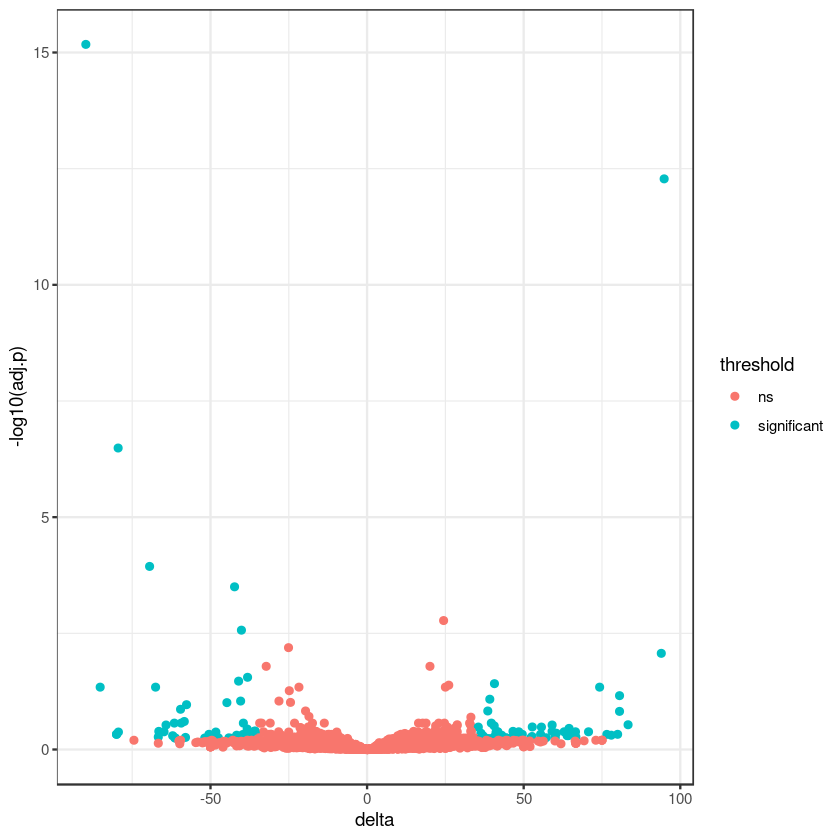

In [1498]:
(function(){
    #ph(P_by_DPAU)
    dif=P_by_DPAU.HeLa
    threshold=35
    
    dif=dif[dif$nA>=2 & dif$nB>=2,]
    
    # filter na in fc
    dif=dif[!is.na(dif$delta),]
    pd(dif)
    

    dif$threshold="ns"
    dif[ dif$p<0.05 & abs( dif$delta )> threshold, ]$threshold="significant"
    
    print(table(dif$threshold))
    #print( rownames(dif[which(dif$threshold=='significant'), ]) )
    
    #ph(dif)
    g=ggplot(dif, aes( delta, -log10(adj.p), color=threshold))+geom_point()+
        theme_bw()
    print(g)
    
    rs1=dif[which( dif$p>0.05 & (dif$delta >threshold) ),-1]
    rs2=dif[which( dif$p>0.05 & (dif$delta < (-threshold) ) ),-1]
    #print(rownames(rs1))
    #print('')
    rownames(rs2)
})()

[1] 100 100   0 100
[1] "========"
[1] 0 0 0 0 0


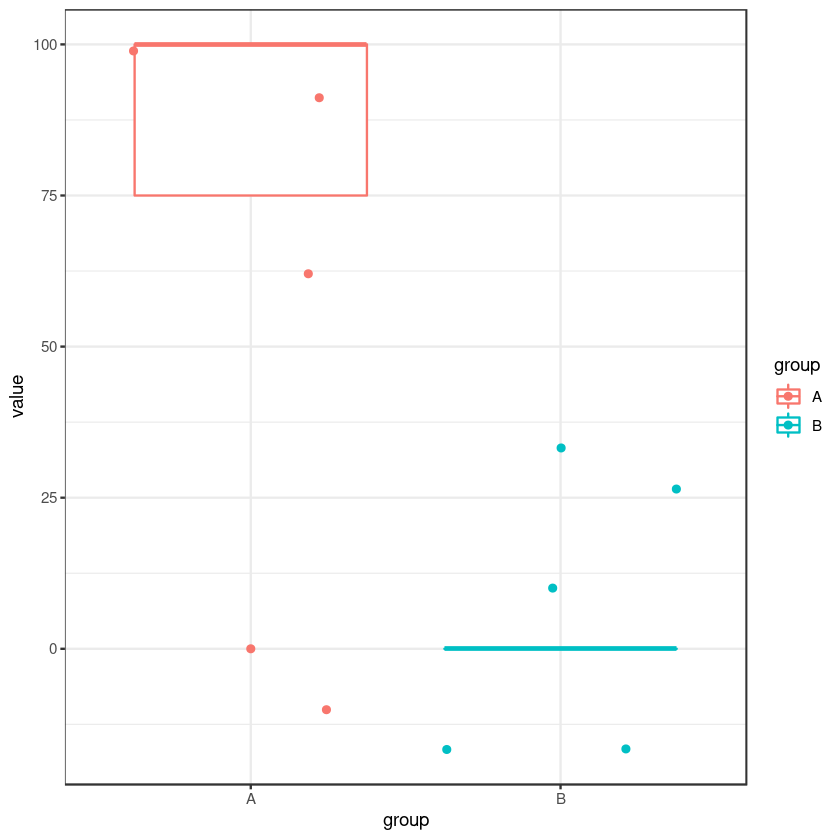

In [908]:
(function(){
    df=gDPAU.HeLa
    gene='MIGA1'
    #
    d1=as.numeric( df[gene, cid.A] )
    d2=as.numeric( df[gene, cid.B] )
    #
    d1=d1[!is.na(d1)]
    d2=d2[!is.na(d2)]
    #
    tmp=data.frame(
        value= c(d1, d2),
        group=c(rep("A", length(d1)), rep('B', length(d2)))
    )
    g=ggplot(tmp, aes(group, value, color=group))+geom_boxplot()+geom_jitter()+theme_bw()
    print(g)
    #
    print(d1)
    print('========')
    print(d2)
})()

### compare cell cycle

In [1499]:
compareA_B=function(df, cid.A, cid.B, output='gDPAU_HeLa/', keyword="HeLa_sync_normal"){
    delta_df=getP_by_DPAU(df, cid.A, cid.B, output, keyword)
    save_gene(delta_df,cid.A, cid.B, output, keyword)
    
    pP('==end==', output, keyword)
}

In [1500]:
# BC, BC_0 vs BC_1
cid.A=rownames(cellInfo[which(cellInfo$cellType=="BC_0"),])
cid.B=rownames(cellInfo[which(cellInfo$cellType=="BC_1"),])
pP('cell number:',length(cid.A), length(cid.B))
#
compareA_B(gDPAU.BC, cid.A, cid.B, output='gDPAU_BC/', keyword="BC0_vs_BC1")

[1] "cell number: 87 82"
[1] 4033  169
[1] "87 82"
[1] 4013   11
         gene     delta nA nB     meanA    meanB      sdA      sdB       fc
CAP2     CAP2  37.70088 17 52  95.75163 58.05075 12.03285 44.63722 1.649447
PTPN11 PTPN11  79.23395  5 15 100.00000 20.76605  0.00000 41.05875 4.815553
NFRKB   NFRKB  42.05063 28 53  86.81247 44.76184 32.19078 43.60403 1.939431
CCNA2   CCNA2 -48.45192 24 24  40.55390 89.00582 44.59300 26.59260 0.455632
SPIRE1 SPIRE1  33.11024  8 34 100.00000 66.88976  0.00000 41.63805 1.494997
HPS4     HPS4  61.75505  8 18 100.00000 38.24495  0.00000 49.30631 2.614724
                  p       adj.p
CAP2   6.442046e-07 0.002585193
PTPN11 2.994979e-06 0.006009426
NFRKB  5.366588e-06 0.007178706
CCNA2  5.122705e-05 0.038215476
SPIRE1 5.358275e-05 0.038215476
HPS4   5.713752e-05 0.038215476
[1] "================>> gDPAU_BC/ BC0_vs_BC1"
[1] "to save genes, from cell number:  87 82"
[1] 4013   11
[1] "Threshold:  -23.040927772647 22.0004728318602"
[1] "nrow of short an

#### BC

In [1173]:
table(cellInfo$cellType)
table(cellInfo$cellCycle)
table( substr(cellInfo$cellType,1,2)=="BC",cellInfo$cellCycle)


       BC_0        BC_1 HeLa_normal   HeLa_sync 
         87          82          29          27 


G1S G2M   M MG1   S 
 63  34  42  50  36 

       
        G1S G2M  M MG1  S
  FALSE  14  10 10   9 13
  TRUE   49  24 32  41 23

In [1176]:
# BC, 
p1="S"
p2="G1S"
cid.A=rownames(cellInfo[which( substr(cellInfo$cellType,1,2)=="BC" & cellInfo$cellCycle==p1),])
cid.B=rownames(cellInfo[which( substr(cellInfo$cellType,1,2)=="BC" & cellInfo$cellCycle==p2),])
pP('cell number:',length(cid.A), length(cid.B))
#
compareA_B(gDPAU.BC, cid.A, cid.B, output='gDPAU_BC/', keyword=paste0("254_",p1,"_vs_",p2 ) )

[1] "cell number: 23 49"
[1] 4033  169
[1] "23 49"
[1] 3937   11
       gene     delta nA nB    meanA    meanB       sdA      sdB         fc
ATF2   ATF2  87.21905  4 10 97.61905 10.40000  4.761905 31.50732 9.38644689
AP4M1 AP4M1 -57.48370  5 17  0.00000 57.48370  0.000000 43.73407 0.00000000
TRIM4 TRIM4 -69.91719  2 16  5.93750 75.85469  8.396893 42.03300 0.07827466
AGA     AGA  63.10026  4 16 88.02013 24.91987 13.449531 44.57894 3.53212618
SIX1   SIX1  70.75373  3  9 83.24827 12.49455  9.521816 33.04521 6.66276922
SMU1   SMU1  68.02514  4  9 88.75998 20.73485  3.760867 33.52020 4.28071563
                 p      adj.p
ATF2  6.978302e-06 0.02747358
AP4M1 5.675585e-05 0.11172389
TRIM4 1.543952e-04 0.14633496
AGA   1.561900e-04 0.14633496
SIX1  1.858458e-04 0.14633496
SMU1  2.604361e-04 0.17088946
[1] "================>> gDPAU_BC/ 254_S_vs_G1S"
[1] 3937   11
[1] "Threshold:  -31.0025092138746 31.6581448477323"
[1] "nrow of short and long:  127 133"
[1] "==end== gDPAU_BC/ 254_S_vs_G1S"


In [1501]:
## HeLa, cycle compare wise
(function(){
    cycles=rev( c('G1S', 'S', 'G2M', 'M', 'MG1') )
    cycles=c(cycles, cycles)
    print(cycles)
    for(i in 1:5){
        pP(i, cycles[i], cycles[(i+1)])
        p1=cycles[i]
        p2=cycles[(i+1)]
        #
        cid.A=rownames(cellInfo[which( substr(cellInfo$cellType,1,2)=="BC" & cellInfo$cellCycle==p1),])
        cid.B=rownames(cellInfo[which( substr(cellInfo$cellType,1,2)=="BC" & cellInfo$cellCycle==p2),])
        pP('cell number:',length(cid.A), length(cid.B))
        #
        compareA_B(gDPAU.BC, cid.A, cid.B, output='gDPAU_BC/', keyword=paste0("254_",p1,"_vs_",p2 ) )
    }
})()

 [1] "MG1" "M"   "G2M" "S"   "G1S" "MG1" "M"   "G2M" "S"   "G1S"
[1] "1 MG1 M"
[1] "cell number: 41 32"
[1] 4033  169
[1] "41 32"
[1] 3952   11
         gene     delta nA nB    meanA      meanB      sdA      sdB        fc
TRMU     TRMU  59.05249 19 18 90.45905  31.406558 25.34328 41.28950 2.8802600
INSIG2 INSIG2 -51.92622 18 17 22.17482  74.101048 32.80900 37.88474 0.2992512
SLF2     SLF2  71.95175 12  6 83.33333  11.381579 38.92495 22.32251 7.3217726
SCAF4   SCAF4  80.70175  9  4 80.70175   0.000000 38.85480  0.00000       Inf
RSPRY1 RSPRY1  72.90100 14  3 81.16145   8.260447 36.22369 14.30751 9.8253099
LCOR     LCOR -78.28641  8  2 21.71359 100.000000 34.62011  0.00000 0.2171359
                  p      adj.p
TRMU   1.575904e-05 0.06227973
INSIG2 1.419629e-04 0.20004266
SLF2   1.518542e-04 0.20004266
SCAF4  2.508190e-04 0.24285761
RSPRY1 3.178271e-04 0.24285761
LCOR   3.687109e-04 0.24285761
[1] "================>> gDPAU_BC/ 254_MG1_vs_M"
[1] "to save genes, from cell number:  41 32"

#### HeLa 

In [1502]:
## HeLa, cycle compare wise
(function(){
    cycles=rev( c('G1S', 'S', 'G2M', 'M', 'MG1') )
    cycles=c(cycles, cycles)
    print(cycles)
    for(i in 1:5){
        pP(i, cycles[i], cycles[(i+1)])
        p1=cycles[i]
        p2=cycles[(i+1)]
        #
        cid.A=rownames(cellInfo[which( substr(cellInfo$cellType,1,2)=="He" & cellInfo$cellCycle==p1),])
        cid.B=rownames(cellInfo[which( substr(cellInfo$cellType,1,2)=="He" & cellInfo$cellCycle==p2),])
        pP('cell number:',length(cid.A), length(cid.B))
        #
        compareA_B(gDPAU.HeLa, cid.A, cid.B, output='gDPAU_HeLa/', keyword=paste0("254HeLa_",p1,"_vs_",p2 ) )
    }
})()

 [1] "MG1" "M"   "G2M" "S"   "G1S" "MG1" "M"   "G2M" "S"   "G1S"
[1] "1 MG1 M"
[1] "cell number: 9 10"
[1] 4012   56
[1] "9 10"
[1] 2998   11
           gene     delta nA nB     meanA       meanB       sdA        sdB
PNISR     PNISR  81.57913  7  4 86.368185   4.7890560 19.265778  5.6204851
S100PBP S100PBP -91.28593  4  4  5.000000  96.2859256 10.000000  5.0588136
EMP1       EMP1  93.86606  4  7 94.223206   0.3571429  7.658105  0.9449112
TPT1       TPT1  40.98900  9 10 68.096278  27.1072813 18.829084 17.9795607
SOD1       SOD1  35.12485  9 10 59.392808  24.2679618 16.733292 16.4686447
PITPNB   PITPNB -96.99571  3  2  3.004292 100.0000000  5.203586  0.0000000
                  fc            p      adj.p
PNISR    18.03449060 9.030339e-06 0.02707296
S100PBP   0.05192867 3.942654e-05 0.05910038
EMP1    263.82497542 1.337635e-04 0.12286567
TPT1      2.51210283 1.639302e-04 0.12286567
SOD1      2.44737520 2.636551e-04 0.15808758
PITPNB    0.03004292 9.579763e-04 0.47866885
[1] "=============

### pool to get unique genes, and cluster

In [1503]:
# load all genes
geneList.BC=list()
cycles=rev( c('G1S', 'S', 'G2M', 'M', "MG1") )
cycles2=c(cycles,cycles)
for(i in 1:length(cycles)){
    fileName1=paste0("gDPAU_BC/254_",cycles2[i],"_vs_",cycles2[i+1],"_gDPAU_delta_shorten.gene.txt")
    fileName2=paste0("gDPAU_BC/254_",cycles2[i],"_vs_",cycles2[i+1],"_gDPAU_delta_lengthen.gene.txt")
    #
    keyword=paste0(cycles2[i], '_vs_',cycles2[i+1])
    printP(i, keyword, fileName)
    geneList.BC[[keyword]]= c( readLines(fileName1),  readLines(fileName2) )
}
sapply(geneList.BC, length) 
#geneList.BC

[1] "1 MG1_vs_M gDPAU_BC/254_G1S_vs_MG1_gDPAU_delta_shorten.gene.txt"
[1] "2 M_vs_G2M gDPAU_BC/254_G1S_vs_MG1_gDPAU_delta_shorten.gene.txt"
[1] "3 G2M_vs_S gDPAU_BC/254_G1S_vs_MG1_gDPAU_delta_shorten.gene.txt"
[1] "4 S_vs_G1S gDPAU_BC/254_G1S_vs_MG1_gDPAU_delta_shorten.gene.txt"
[1] "5 G1S_vs_MG1 gDPAU_BC/254_G1S_vs_MG1_gDPAU_delta_shorten.gene.txt"


MG1_vs_M   M_vs_G2M   G2M_vs_S   S_vs_G1S G1S_vs_MG1 
       264        252        255        252        258

In [1504]:
# load all genes
geneList.HeLa=list()
for(i in 1:length(cycles)){
    fileName1=paste0("gDPAU_HeLa/254HeLa_",cycles2[i],"_vs_",cycles2[i+1],"_gDPAU_delta_shorten.gene.txt")
    fileName2=paste0("gDPAU_HeLa/254HeLa_",cycles2[i],"_vs_",cycles2[i+1],"_gDPAU_delta_lengthen.gene.txt")
    #
    keyword=paste0(cycles2[i], '_vs_',cycles2[i+1])
    printP(i, keyword, fileName)
    geneList.HeLa[[keyword]]= c( readLines(fileName1),  readLines(fileName2) )
}
sapply(geneList.HeLa, length) 
#geneList.HeLa

[1] "1 MG1_vs_M gDPAU_BC/254_G1S_vs_MG1_gDPAU_delta_shorten.gene.txt"
[1] "2 M_vs_G2M gDPAU_BC/254_G1S_vs_MG1_gDPAU_delta_shorten.gene.txt"
[1] "3 G2M_vs_S gDPAU_BC/254_G1S_vs_MG1_gDPAU_delta_shorten.gene.txt"
[1] "4 S_vs_G1S gDPAU_BC/254_G1S_vs_MG1_gDPAU_delta_shorten.gene.txt"
[1] "5 G1S_vs_MG1 gDPAU_BC/254_G1S_vs_MG1_gDPAU_delta_shorten.gene.txt"


MG1_vs_M   M_vs_G2M   G2M_vs_S   S_vs_G1S G1S_vs_MG1 
       203        202        221        230        208

In [1505]:
# pool all genes: BC
getUniq_genes_VennPlot=function(geneList, output, keyword){
    #geneList=geneList.BC
    #output="gDPAU_BC/"
    #keyword="BC"

    ##
    pP('Total gene number:', sum(sapply(geneList, length)) )

    genesDF=data.frame(
        'group'=names(unlist(geneList)),
        'genes'=unname(unlist(geneList))
    )
    dim(genesDF)
    head(genesDF)

    # uniq genes
    genes=unique(as.character( genesDF$genes) )
    pP("Uniq gene number:",length(genes)) #834
    ph(genes)
    
    
    ################
    # Venn plot
    cols=RColorBrewer::brewer.pal(n = 5,name = "Set2")
    #
    library("VennDiagram")
    grid.newpage()
    n=1800
    venn.plot <- venn.diagram(
      x =geneList,
      filename = paste0(output, "Venn/Cycle_gene_APA_level_Venn_5set.png" ), #dpi=300,
        resolution =200, 
        imagetype = "png", units = "px",height = n, width = n, 

      col = "black",
      fill = cols, #c("dodgerblue", "goldenrod1", "darkorange1", "seagreen3", "orchid3"),
      alpha = 0.50,
      cex = c(1.5, 1.5, 1.5, 1.5, 1.5, 1, 0.8, 1, 0.8, 1, 0.8, 1, 0.8,
              1, 0.8, 1, 0.55, 1, 0.55, 1, 0.55, 1, 0.55, 1, 0.55, 1, 1, 1, 1, 1, 1.5),
      cat.col = cols,#c("dodgerblue", "goldenrod1", "darkorange1", "seagreen3", "orchid3"),
      cat.cex = 1.5,
      cat.fontface = "bold",
      margin = 0.3,
        main=paste0("Cycle related genes of ",keyword," at DPAU level")
    );
    
    #########
    writeLines(genes, paste0(output, keyword,'_2543_cellCycle_related_gene_APAlevel_uniq.gene.txt'))
    return(genes);
}

cycleGenes.BC=getUniq_genes_VennPlot(geneList.BC, "gDPAU_BC/", "BC")

[1] "Total gene number: 1281"
[1] "Uniq gene number: 798"
[1] "INSIG2" "LCOR"   "ABI1"   "TNS3"   "MGME1"  "RBM19" 


In [1507]:
cycleGenes.HeLa=getUniq_genes_VennPlot(geneList.HeLa, "gDPAU_HeLa/", "HeLa")

[1] "Total gene number: 1064"
[1] "Uniq gene number: 745"
[1] "S100PBP" "PITPNB"  "CRTAP"   "NDUFC1"  "WDR70"   "FOXP4"  


[1] 798
[1] 745
[1] 285
[1] "798 745 285"


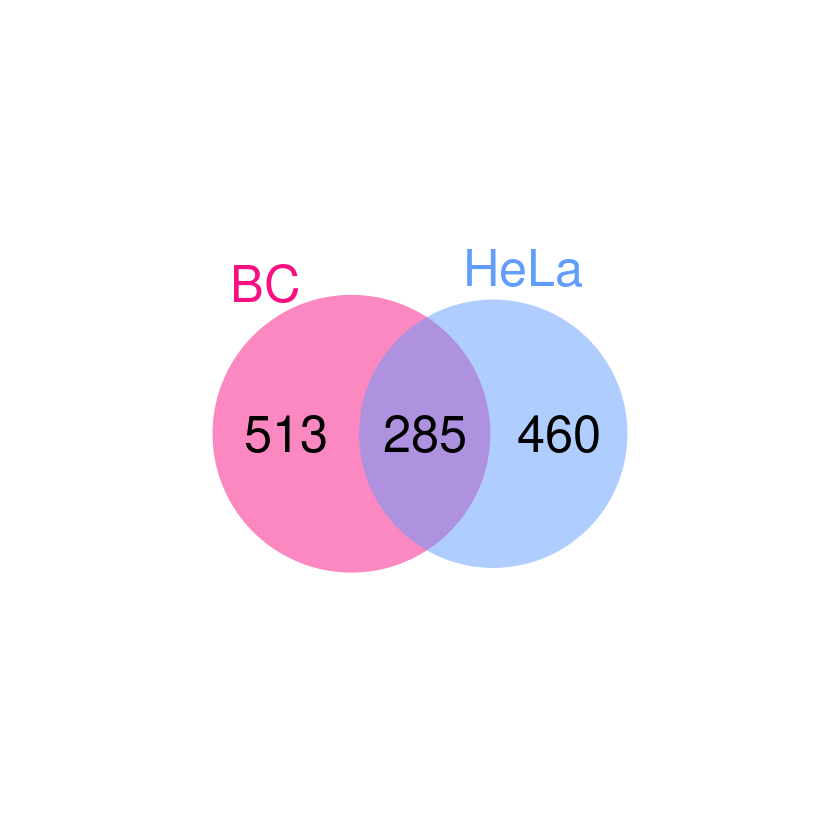

In [1508]:
## intersect genes
(function(){
    g1=cycleGenes.BC
    g2=cycleGenes.HeLa
#     # union
#     cycleGenes.union=union( g1, g2)
#     length(cycleGenes.union)
#     head(cycleGenes.union) # 568
#     #writeLines(cycleGenes.union, 'BC_HeLa_CycleRelatedGene_union_568.txt')
    
    pl(g1)
    pl(g2)
    #
    g3=intersect(g1, g2) #cycleGenes.intersect
    pl(g3)
    writeLines(g3, 'BC_HeLa_CycleRelatedGene_intersect.txt')
    
    library (VennDiagram)
    #grid.newpage()
    pP( length(g1), length(g2), length(g3) )
    venn.plot <- draw.pairwise.venn( length(g1), length(g2), length(g3), 
                                    c("BC", "HeLa"), 
                                fill = c('#F81082', '#619CFF'),
                                col = "transparent",
                                cex = 2.5,cat.cex=2.5,alpha = 0.50,
                                main="Cycle related genes at APA level",
                                
                                cat.pos = c(-30, 10), #angle of text, dgree=0 means top of cycle
                                cat.dist = 0.05,   #distance of text to border, can be negative
                                
                                cat.col = c('#F81082', '#619CFF'),
                                margin=0.3,
                                scaled = T);
})()

#### psudo - time plot

In [1509]:
## step1: get total gene's mean gDPAU at cell cycle time point
get_timeDPAU=function(df, output, keyword){
    if(!( keyword %in% c("BC", "HeLa")) ){
        stop('Error: keyword must in c("BC", "HeLa")');
    }
    #df=gDPAU.BC[cycleGenes.BC, cid.BC]
    pd(df) 
    
    ###############
    ## cell cycle time point, mean DPAU, sd DPAU, num
    cycles=c('G1S', 'S', 'G2M', 'M', "MG1")
    timeDPAU=NULL;

    num=1
    for(gene in rownames(df)){
        #if(num>20){break;}

        tmp_DF=NULL;
        for(cycle in cycles){
            num=num+1
            #if(num>20){break;}
            #
            cid.tmp=rownames(cellInfo[which( substr(cellInfo$cellType,1,2)==substr(keyword,1,2) & cellInfo$cellCycle==cycle ), ] )
            #printP(cycle, length(cid.tmp), head(cid.tmp, n=3))
            DPAU.tmp=as.numeric( df[gene, cid.tmp] )
            DPAU.tmp=DPAU.tmp[!is.na(DPAU.tmp)]
            #
            tmp=data.frame(
                'a'=mean(DPAU.tmp),
                'b'=sd(DPAU.tmp),
                'c'=length(DPAU.tmp)
            );


            colnames(tmp)=paste0(cycle, c('_mean', '_sd', '_n') )
            #
            if(is.null(tmp_DF)){tmp_DF=tmp}else{
                tmp_DF=cbind(tmp_DF, tmp );
            }        
        }
        tmp_DF$gene=gene;
        timeDPAU=rbind(timeDPAU, tmp_DF)
    }
    ##
    rownames(timeDPAU)=timeDPAU$gene
    pd(timeDPAU);ph(timeDPAU, n=2)
    #save to file
    write.table(timeDPAU, paste0(output, keyword, '254_mean_gDPAU_at_cellCycle_timePoint.df.txt'))
    pP('saved at:', output, keyword)
    return(timeDPAU)
}

##
timeDPAU.BC0=get_timeDPAU(gDPAU.BC[cycleGenes.BC, cid.BC], "gDPAU_BC/", 'BC') 
timeDPAU.HeLa0=get_timeDPAU(gDPAU.HeLa[cycleGenes.HeLa, cid.HeLa], "gDPAU_HeLa/", 'HeLa') 

[1] 798 169
[1] 798  16
       G1S_mean   G1S_sd G1S_n   S_mean     S_sd S_n G2M_mean   G2M_sd G2M_n
INSIG2 65.42921 46.76345    20 62.31988 47.06146  12 49.22748 44.55763     7
LCOR   55.55535 49.45481     8 80.00000 44.72136   5  0.00000       NA     1
          M_mean     M_sd M_n MG1_mean   MG1_sd MG1_n   gene
INSIG2  74.10105 37.88474  17 22.17482 32.80900    18 INSIG2
LCOR   100.00000  0.00000   2 21.71359 34.62011     8   LCOR
[1] "saved at: gDPAU_BC/ BC"
[1] 745  56
[1] 745  16
         G1S_mean   G1S_sd G1S_n   S_mean       S_sd S_n  G2M_mean   G2M_sd
S100PBP 33.672392 41.11446     5 79.54545 44.4781495   5  76.09278 42.95466
PITPNB   1.176471       NA     1 99.52830  0.6670819   2 100.00000  0.00000
        G2M_n    M_mean     M_sd M_n MG1_mean    MG1_sd MG1_n    gene
S100PBP     5  96.28593 5.058814   4 5.000000 10.000000     4 S100PBP
PITPNB      4 100.00000 0.000000   2 3.004292  5.203586     3  PITPNB
[1] "saved at: gDPAU_HeLa/ HeLa"


In [1530]:
# step2: filter out genes whose observation are less than 2 at any time point;
filter_timeDPAU=function(df0, output, keyword){
    #df0=timeDPAU.BC
    pP('1. input: ', nrow(df0))
    
    # filter by cell number, at least 2 per time point
    df_n=df0[, seq(3,15,3)]
    lowCellID=apply(df_n, 1, function(x){
        sum(x<2)
    })
    print(table(lowCellID))
    #return(keep)
    df0=df0[!lowCellID,]
    pP("2. after filter out by cell number(<2):", nrow(df0))
    
    #get mean DPAU at each phase
    df=df0[,seq(1,15,3)]
    pd( df[complete.cases(df), ] )
    pP('3. after filter out NA:', nrow(df) )
    
    # simplify col names
    colnames(df)=gsub('_mean','',colnames(df))
    debug(df)
    # pheatmap( as.matrix( df ) )
    #save to file
    write.table(df, paste0(output, keyword, '254_mean_gDPAU_at_cellCycle_timePoint.filterGenesLessThan2cell.df.txt'))
    pP('saved at:', output, keyword)
    return(df)
}

#
timeDPAU.BC=filter_timeDPAU(timeDPAU.BC0, "gDPAU_BC/", 'BC')
timeDPAU.HeLa=filter_timeDPAU(timeDPAU.HeLa0, "gDPAU_HeLa/", 'HeLa')

[1] "1. input:  798"
lowCellID
  0   1   2   3 
670 110  15   3 
[1] "2. after filter out by cell number(<2): 670"
[1] 670   5
[1] "3. after filter out NA: 670"
[1] 670   5
            G1S         S      G2M         M      MG1
INSIG2 65.42921  62.31988 49.22748  74.10105 22.17482
ABI1   58.15217  68.82911 70.08264  72.08813 34.38448
TNS3   92.67800  86.23457 99.89754  97.25701 64.58718
MGME1  56.56397  85.71429 72.61113 100.00000 59.38632
RBM19  42.41629 100.00000 56.25000 100.00000 35.80247
FDX1   62.73292  63.93758 38.56534  83.27093 46.77989
[1] "saved at: gDPAU_BC/ BC"
[1] "1. input:  745"
lowCellID
  0   1   2   3 
438 179  91  37 
[1] "2. after filter out by cell number(<2): 438"
[1] 438   5
[1] "3. after filter out NA: 438"
[1] 438   5
             G1S         S        G2M         M       MG1
S100PBP 33.67239 79.545455 76.0927786  96.28593  5.000000
CRTAP   19.01686  5.373936 21.5653057  69.67753  5.327516
NDUFC1  76.23617 81.765593 68.0059524  89.84838 36.429835
WDR70   61.5639

In [1531]:
# the sd of these DPAU are too high!
(function(){
    df=timeDPAU.BC0
    #ph(df)
    
    ##############################
    # filter out genes whose are less than 3
    df0=df[,seq(3,15,3)] #number
    t1=apply(df0, 1, function(x){
        sum(x<2)
    })
    #print(table(t1))
    # 0   1   2   3   4   5 
    #548 192  66  16  10   2
    
    df=df[!t1,]
    
    ##############################
    # filter out to high sd
    df1=df[,seq(2,15,3)] #sd
    ph(df1)
    t2=apply(df1, 1, function(x){
        sum(x<30)
    })
    print(table(t2))
    
    ##############################
    df3=df[,seq(1,15,3)] #mean
    t3=apply(df3, 1, function(x){
        sum(x>50)
    })
    
    draw=function(dt){
        plot( as.numeric( dt[1,]), type='o', ylim=c(0,100), main="plot of sd" )
        n=nrow(dt)
        for(i in 2:n){
            if(i==20)
             lines( as.numeric( dt[i,]), type='o', col=rainbow(n)[i] )
        }
    }
    #print(table(t2))
    # 0   1   2   3   4 
    #273 217 125  73  16
})()

         G1S_sd     S_sd     G2M_sd      M_sd   MG1_sd
INSIG2 46.76345 47.06146 44.5576275 37.884739 32.80900
ABI1   35.66236 25.81283 44.5597502 23.188050 24.53895
TNS3   21.44573 32.16812  0.2897979  7.841723 43.61626
MGME1  48.99001 37.79645 39.7041646  0.000000 48.70922
RBM19  48.23679  0.00000 61.8718434  0.000000 48.67941
FDX1   34.96139 19.00976 21.9519487 32.263068 26.24752
t2
  0   1   2   3   4   5 
208 291 111  46  12   2 


[1] "670 438 120"


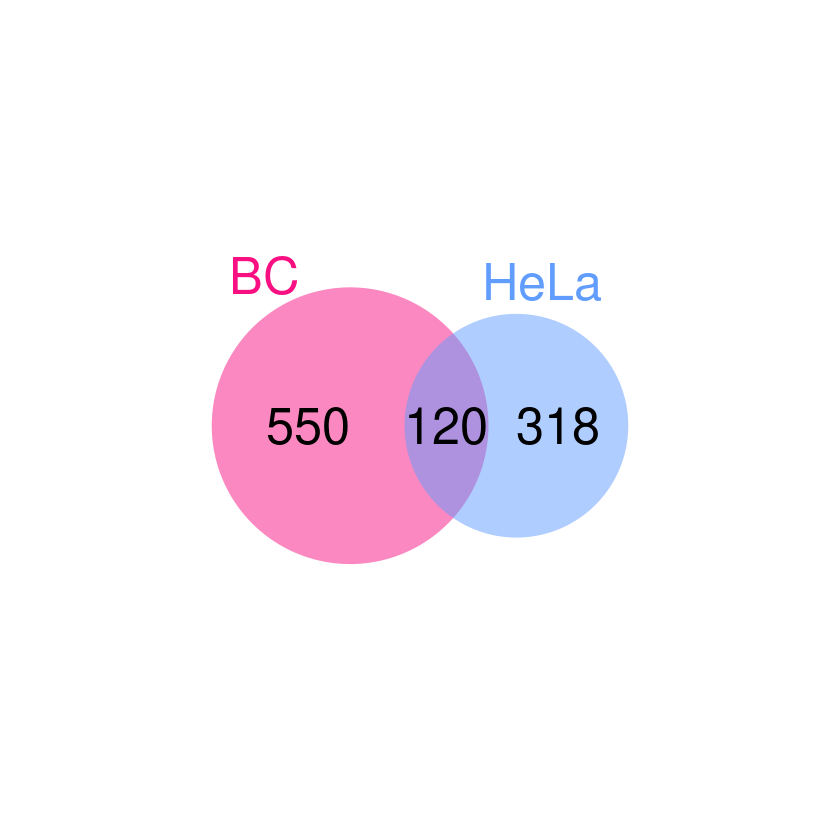

In [1532]:
(function(){
    g1=rownames(timeDPAU.BC)
    g2=rownames(timeDPAU.HeLa)
    g3=intersect( g1, g2 )
    
    pP( length(g1), length(g2), length(g3) )
    writeLines(g3, 'BC_HeLa_CycleRelatedGene_intersect.filterLessThan2cells.txt')
    venn.plot <- draw.pairwise.venn( length(g1), length(g2), length(g3), 
                                c("BC", "HeLa"), 
                            fill = c('#F81082', '#619CFF'),
                            col = "transparent",
                            cex = 2.5,cat.cex=2.5,alpha = 0.50,
                            main="Cycle related genes at APA level, \n
                            after filter out genes whose observation are less than 2 cells at any cell phase time point",

                            cat.pos = c(-30, 10), #angle of text, dgree=0 means top of cycle
                            cat.dist = 0.05,   #distance of text to border, can be negative

                            cat.col = c('#F81082', '#619CFF'),
                            margin=0.3,
                            scaled = T);
})()

#### order gene by correlation

In [1533]:
# cluster genes accoring to their correlation across cell cycle time point
#   - gene correlation heatmap
drawHM01=function(df, output, keyword){
    #df=timeDPAU.BC
    #output="gDPAU_BC/"
    #keyword="BC"
    pd(df)
    #
    clusterNum=6 ##----------todo: set parameters
    #
    dev.off()
    CairoPDF( paste0(output, keyword, '254_2_heatmap_cycleGene.pdf'), width=6, height=6)

    ## using correlation
    df.cor=cor( t(as.matrix( df ) ), use = 'pairwise.complete.obs', 
           method="spearman"
            #method="pearson"
          )
    #diag(df.cor)=NA;
    
    colors.cluster=c("#E41E25", "#FBD800", "#208A41", "#446CFF", "#36AFE5", "#AF4A9C")
    # pic1
    clust_ward <- hclust( dist(df.cor) , method = 'ward.D2')
    plot(clust_ward)
    rect.hclust(clust_ward, k = clusterNum, border =colors.cluster )
    
    # pic2
    pHM=pheatmap( df.cor, 
                 clustering_method = 'ward.D2', na_col = 'grey',
                 #clustering_distance_rows = "correlation",
             #scale='row',
             show_rownames=F,show_colnames=F,

             cutree_rows = clusterNum, #对row聚类时，设置加几个白横分割线
             treeheight_row = 100,

             main=paste0("Correlation of cell cycle related genes \nAt APA level(", keyword,") ", nrow(df),' genes' ),
             border=FALSE)
    dev.off()
    pP('draw end: ', output, keyword)
    return(pHM)
}

#
pheatmapRS.BC=drawHM01(timeDPAU.BC, "gDPAU_BC/", "BC" )

[1] 670   5
[1] "draw end:  gDPAU_BC/ BC"


In [1534]:
# order from heatmap
getNewOrder=function(pheatmapRS, df, output="gDPAU_BC/",keyword="BC"){
    clusterNum=6
    # get gene order after cluster
    row_cluster = cutree(pheatmapRS$tree_row,k=clusterNum)
    # reorder data frame, add Cluster column
    newOrder = df[pheatmapRS$tree_row$order,]
    newOrder[,ncol(newOrder)+1]= row_cluster[match(rownames(newOrder),names(row_cluster))]
    colnames(newOrder)[ncol(newOrder)]="Cluster"
    #order by cluster
    newOrder=newOrder[order(newOrder$Cluster),]
    #head(newOrder)

    # how many clusters?
    print(unique(newOrder$Cluster))
    # how many genes each cluster?
    print(table(newOrder$Cluster))
    # 1   2   3   4   5  6
    #159  70 103 148 103 121 
    #
    # write df to file
    newOrder$Cluster = paste0("Cluster",newOrder$Cluster)
    write.table(newOrder, paste0(output, keyword,"2552_gDPAU_cycleRelatedGenes.pheatmap.cluster.df.txt"),
                sep="\t",quote = F,row.names = T,col.names = T)
    return(newOrder)
}

#
newOrder.BC=getNewOrder(pheatmapRS.BC, timeDPAU.BC )
dim(newOrder.BC) #7046
head(newOrder.BC)

[1] 1 2 3 4 5 6

  1   2   3   4   5   6 
 82 106  97 121 140 124 


[1] 670   6

G1S      S        G2M      M        MG1      Cluster 
NCOA6   72.22222 68.84032 42.82434 68.86447 38.25364 Cluster1
ZNF410  84.67532 79.68414 75.00000 81.04389 54.98238 Cluster1
TTC32   99.10714 91.53996 66.66667 97.97980 39.49065 Cluster1
SLC35E1 75.00000 35.39604 34.78261 45.83333 27.61905 Cluster1
ZFP82   62.50000 60.00000 50.00000 74.24242 37.78471 Cluster1
ZNF473  75.00000 43.00813 33.33333 80.00000 29.00000 Cluster1

In [1535]:
# plot heatmap for newOrdered data with Cluster number - 
#    long heatmap
plotHM02=function(newOrder, output, keyword, is_cluster_rows=F){
    # anno for rows
    annotation_row=data.frame(
        gene=rownames(newOrder),
        Cluster=newOrder$Cluster, 
        row.names=1
    )
    #head(annotation_row)

    # define color list
    colors.cluster=c("#E41E25", "#FBD800", "#208A41", "#446CFF", "#36AFE5", "#AF4A9C")
    col=colors.cluster # RColorBrewer::brewer.pal(n = 8,name = "Set2")
    #
    num=length(unique(newOrder$Cluster))
    Cluster=col[1:num]
    names(Cluster)=paste0('Cluster',1:num)
    #
    ann_colors = list( Cluster = Cluster )
    #print(head(ann_colors))
    #
    gaps_row =(table(newOrder$Cluster))
    gaps_row=cumsum(gaps_row)
    #
    ######################
    ## plot gene's DPAU across cycles
    ######################
    fileName=paste0(output,keyword,'2552_2_heatmap_cycle_gDPAU_long.pdf')
    
    CairoPDF(fileName, width=ifelse(is_cluster_rows, 5,3), height=7)
    p1.DPAU=pheatmap( newOrder[,1:5], clustering_method = 'ward.D2', scale='row',
                     clustering_distance_rows = "correlation",
                     annotation_row =annotation_row,
                     annotation_colors = ann_colors,
                     #
                     gaps_row=gaps_row,
                     #scale='row',
                     show_rownames=F, #show_colnames=F,
                     cluster_rows=is_cluster_rows,  #--------------<<< 是否对基因聚类
                     cluster_cols=F,
                     cutree_rows = 6,
                     treeheight_row = 100,
             main=paste0(" gDPAU of cell cycle related \ngenes at APA level ", keyword),
             angle_col=90,
             border=FALSE)
    dev.off()
    #
    printP('heatmap end: ',fileName)
}
dev.off()
plotHM02(newOrder.BC,output="gDPAU_BC/",keyword="BC", is_cluster_rows=F)

null device 
          1

[1] "heatmap end:  gDPAU_BC/BC2552_2_heatmap_cycle_gDPAU_long.pdf"


In [1536]:
(function(){
    df0=timeDPAU.BC
    df1=newOrder.BC
    #
    df1=df1[rownames(df0),]
     #
    pt=function(...){
        print(tail(...))
    }
    pt(df0)
    pt(df1)
    #
    
})()

             G1S        S       G2M        M      MG1
STK35   83.16151 99.63768  75.92593 79.73568 54.19814
SEC23IP 62.50000 49.77011  66.42686 40.00000 34.55326
RMDN1   64.28571 50.00000  66.66667 31.45833 35.32574
NUP98   80.00000 66.84982  68.13725 74.63235 51.19048
RFK     75.00000 57.14286  65.68627 54.32099 44.54023
PARPBP  75.00000 85.03584 100.00000 65.59618 42.37916
             G1S        S       G2M        M      MG1  Cluster
STK35   83.16151 99.63768  75.92593 79.73568 54.19814 Cluster1
SEC23IP 62.50000 49.77011  66.42686 40.00000 34.55326 Cluster5
RMDN1   64.28571 50.00000  66.66667 31.45833 35.32574 Cluster5
NUP98   80.00000 66.84982  68.13725 74.63235 51.19048 Cluster2
RFK     75.00000 57.14286  65.68627 54.32099 44.54023 Cluster5
PARPBP  75.00000 85.03584 100.00000 65.59618 42.37916 Cluster5


#### plot gene by gene cluster

In [1537]:
# add gene number after cluster number
addGeneNumber2Cluster=function(newOrder){
    #print(head(newOrder))
    mapCN=sapply(split(newOrder, newOrder$Cluster), nrow)
    #print( mapCN )

    for(C in names(mapCN)){
        N=unname(mapCN[C])
        C2=sub('Cluster', 'Cluster ', C)
        newOrder[which(newOrder$Cluster==C), ]$Cluster=paste0(C2, " (",N, " genes)" )
    }
    newOrder
}
# test
head( addGeneNumber2Cluster(newOrder.BC) )

G1S      S        G2M      M        MG1      Cluster             
NCOA6   72.22222 68.84032 42.82434 68.86447 38.25364 Cluster 1 (82 genes)
ZNF410  84.67532 79.68414 75.00000 81.04389 54.98238 Cluster 1 (82 genes)
TTC32   99.10714 91.53996 66.66667 97.97980 39.49065 Cluster 1 (82 genes)
SLC35E1 75.00000 35.39604 34.78261 45.83333 27.61905 Cluster 1 (82 genes)
ZFP82   62.50000 60.00000 50.00000 74.24242 37.78471 Cluster 1 (82 genes)
ZNF473  75.00000 43.00813 33.33333 80.00000 29.00000 Cluster 1 (82 genes)

In [1538]:
# plot genes by cluster
plotLineByCluster=function(newOrder, output="gDPAU_BC/", keyword='BC'){
    #add gene column
    newOrder$gene = rownames(newOrder)
    
    # add gene numbers per Cluster
    newOrder=addGeneNumber2Cluster(newOrder)

    #change factor to number
    cycleName=colnames(newOrder.BC)
    colnames(newOrder.BC)=c(1:5,"Cluster")

    #wide to long
    library(reshape2)    
    data_new = melt(newOrder)

    dev.off()
    CairoPDF( paste0(output, keyword, '2553_3_clusterLinesByCycle.pdf'), width=3, height=8)
    # line plot for each cluster
    colors.cluster=c("#E41E25", "#FBD800", "#208A41", "#446CFF", "#36AFE5", "#AF4A9C")
    p=ggplot(data_new,aes( as.numeric( variable ), value, group=gene)) + geom_line(color="gray90",size=0.4) + 
      geom_hline(yintercept =50,linetype=2, size=0.1) +
      geom_vline(xintercept =c(2,3,4),linetype=2, size=0.01, color="#999999") +
     #stat_summary(aes(group=1, color=Cluster),fun.y=mean, geom="line", size=0.8, color="#F81082" )+
      stat_summary(aes(group=1, color=Cluster),fun.y=mean, geom="line", size=0.8, #color="#c51b7d"
                  ) + scale_color_manual('Gene cluster',values = colors.cluster)+
      facet_wrap(Cluster~., ncol=1) +
      labs(x="Cell cycle", y='Mean DPAU', title=paste0("gene cluster: ", keyword))+
      theme_bw() + 
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
            axis.text = element_text(size=8, face = "bold"),
            axis.text.x=element_text(angle=60, hjust=1), #x标签旋转60度
            legend.position = 'none', 
            strip.text = element_text(size = 8, face = "bold"))+
    scale_x_discrete(expand = c(0,0), limits=1:5, labels = cycleName)
    print(p)
    dev.off()
    
    
    ## output gene list for each cluster
    #head(newOrder)
    num=length(unique(newOrder$Cluster))
    for(i in 1:num){
        CName=unique(newOrder$Cluster)[i]
        gene.tmp=rownames( newOrder[which(newOrder$Cluster==CName ),] )
        printP(i, length(gene.tmp))
        writeLines(gene.tmp, paste0(output, keyword, "2553_3_cycleCluster",i,".gene.txt") )
    }
}
## 
plotLineByCluster(newOrder.BC, output="gDPAU_BC/", keyword='BC')

Using Cluster, gene as id variables



[1] "1 82"
[1] "2 106"
[1] "3 97"
[1] "4 121"
[1] "5 140"
[1] "6 124"


In [1539]:
# for HeLa:
pheatmapRS.HeLa=drawHM01(timeDPAU.HeLa, "gDPAU_HeLa/", "HeLa" )
#
newOrder.HeLa=getNewOrder(pheatmapRS.HeLa, timeDPAU.HeLa )
dim(newOrder.HeLa) #7046
head(newOrder.HeLa)
#
plotHM02(newOrder.HeLa,output="gDPAU_HeLa/",keyword="HeLa", is_cluster_rows=F)

[1] 438   5
[1] "draw end:  gDPAU_HeLa/ HeLa"
[1] 1 2 3 4 5 6

  1   2   3   4   5   6 
 64  77  66 109  72  50 


[1] 438   6

G1S      S         G2M        M        MG1      Cluster 
DNAJB4  72.91667  71.20000 33.7349398  0.00000 60.00000 Cluster1
TWISTNB 54.19414  52.71061  0.1025641 11.52505 41.47693 Cluster1
MYO19   71.89216  76.66667 24.2595819  0.00000 55.80342 Cluster1
CSTF2   86.66667  99.83080 52.0000000 40.00000 70.23810 Cluster1
IGBP1   99.52381 100.00000 49.0384615 88.41463 97.84488 Cluster1
MNAT1   39.09091  50.00000  0.0000000  0.00000 33.33333 Cluster1

[1] "heatmap end:  gDPAU_HeLa/HeLa2552_2_heatmap_cycle_gDPAU_long.pdf"


In [1540]:
plotLineByCluster(newOrder.HeLa,  output="gDPAU_HeLa/", keyword='HeLa')

Using Cluster, gene as id variables



[1] "1 64"
[1] "2 77"
[1] "3 66"
[1] "4 109"
[1] "5 72"
[1] "6 50"


#### How about intigrade the core genes in BC?

In [1541]:
# for BC, HeLa intersect genes:
timeDPAU.BC2=timeDPAU.BC[intersect(rownames(timeDPAU.BC), rownames(timeDPAU.HeLa)), ]
pheatmapRS.BC2=drawHM01(timeDPAU.BC2, "gDPAU_BC2/", "BC2" )
#
newOrder.BC2=getNewOrder(pheatmapRS.BC2, timeDPAU.BC2 )
dim(newOrder.BC2) #7046
head(newOrder.BC2)

[1] 120   5
[1] "draw end:  gDPAU_BC2/ BC2"
[1] 1 2 3 4 5 6

 1  2  3  4  5  6 
20 19 30 25 15 11 


[1] 120   6

G1S      S          G2M       M        MG1      Cluster 
CHMP5   39.90664 47.6190476  89.07407 84.04255 63.56643 Cluster1
FAM118B 24.53960  0.9009009  52.96472 38.46154 26.63900 Cluster1
OSTF1   81.61765 58.8414634 100.00000 85.02304 81.99761 Cluster1
PHF12   67.36111 33.3333333 100.00000 66.66667 61.98924 Cluster1
CEBPZOS 60.00000 33.5784314  86.98413 57.35714 51.66667 Cluster1
TSPAN6  47.62391 46.1232024  85.21639 72.04343 41.39547 Cluster1

In [1543]:
dev.off()
plotHM02(newOrder.BC2,output="gDPAU_BC2/",keyword="BC2", is_cluster_rows=T)

null device 
          1

[1] "heatmap end:  gDPAU_BC2/BC22552_2_heatmap_cycle_gDPAU_long.pdf"


In [1435]:
(function(){
    g1=rownames(timeDPAU.BC)
    g2=rownames(timeDPAU.HeLa)
    g3=intersect(g1, g2)
    pP(length(g1), length(g2), length(g3))
})()

[1] "704 449 129"


In [1544]:
plotLineByCluster(newOrder.BC2,  output="gDPAU_BC2/", keyword='BC2')

Using Cluster, gene as id variables



[1] "1 20"
[1] "2 19"
[1] "3 30"
[1] "4 25"
[1] "5 15"
[1] "6 11"


#### cluster number(failed)

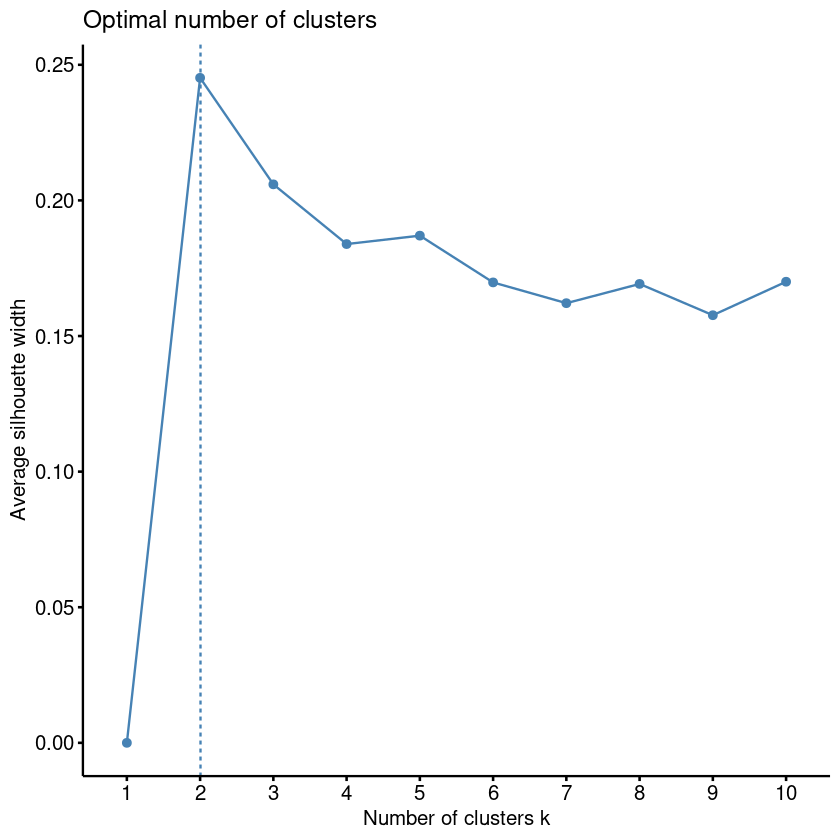

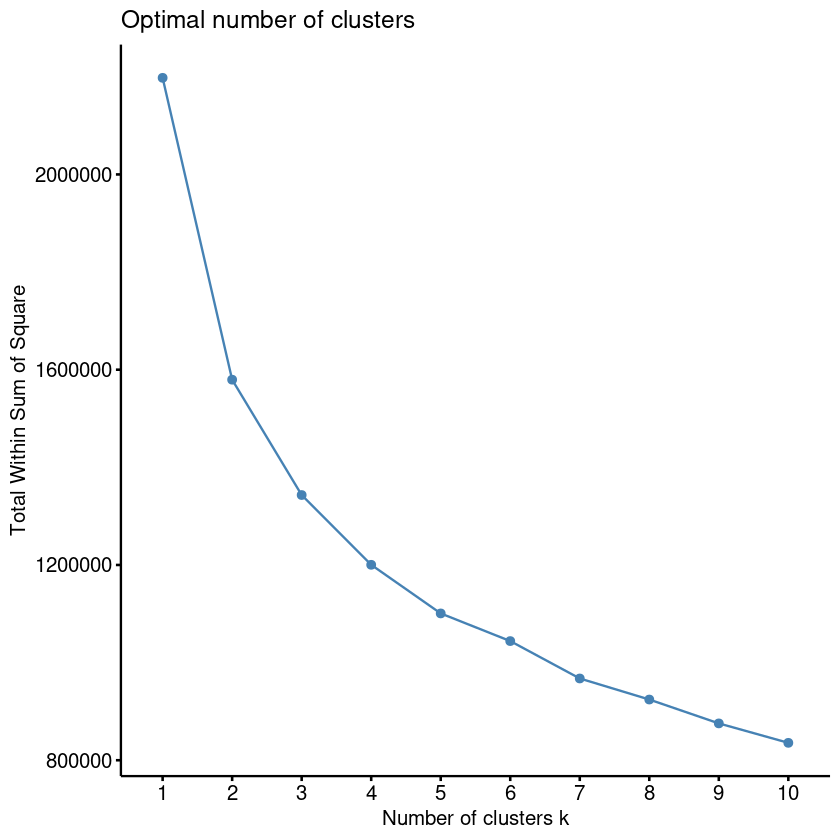

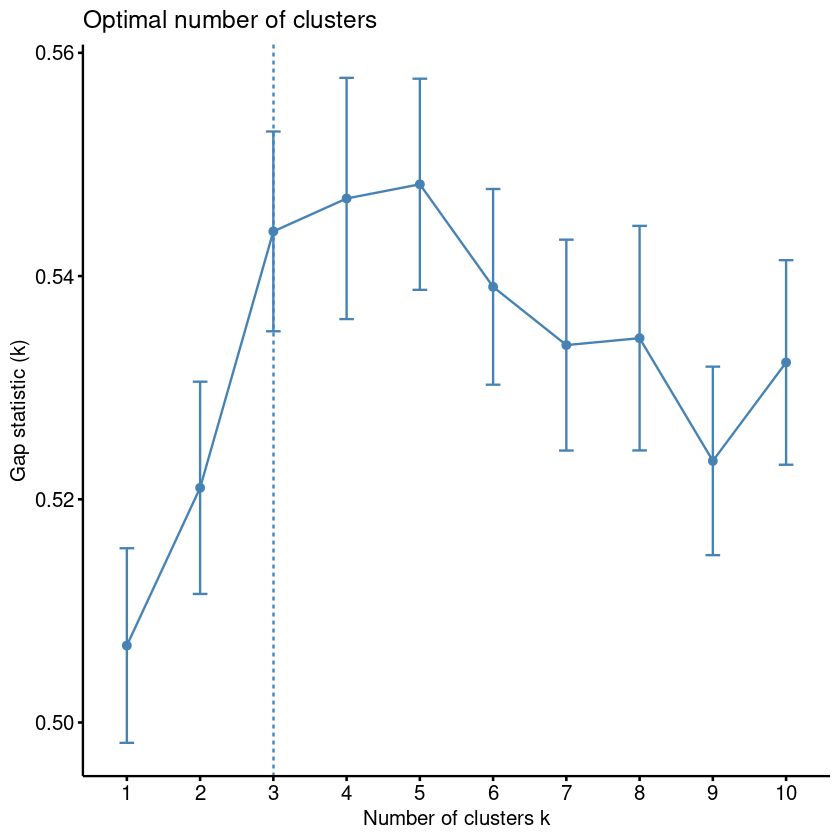

In [1311]:
(function(){
    # 确定最佳分类数： 貌似只能是 kmeans 方法
    # Allowed values include: kmeans, cluster::pam, cluster::clara, 
    #  cluster::fanny, hcut, etc.
    library("factoextra")
    dt=timeDPAU.BC
    dim(dt) #704 5
    g1=fviz_nbclust( dt, FUNcluster=kmeans, method="silhouette")
    g2=fviz_nbclust( dt, FUNcluster=kmeans, method="wss")
    g3=fviz_nbclust( dt, FUNcluster=kmeans, method="gap_stat")
    print(g1)
    print(g2)
    print(g3)
    # method = c("silhouette", "wss", "gap_stat")
})()

### select gene by delta, and p

In [1550]:
# select gene by delta>30, and record P value
(function(){
    # input
    output='gDPAU_BC/';
    keyword="BC"
        
    #
    cycles=rev( c("G1S", 'S','G2M','M','MG1') )
    cycles=c(cycles,cycles)
    total_df=NULL;
    for(i in 1:5){
        groups=paste0( cycles[i],'_', cycles[i+1] )
        #if(i>2){break;}
        pP( groups )
        fileName=paste0(output, '/254_',cycles[i],'_vs_',cycles[i+1],'_253_P_by_DPAU.txt')
        df=read.table(fileName)
        # df=df[,-11]; 
        df$group=groups;
        rownames(df)=paste0(rownames(df),'|',groups )
        #
        #
        df=df[ abs(df$delta)>35,] # filter by delta>30
        df=df[ df$adj.p < 0.05,] #filter by p value
        #
        df=df[order(df$adj.p),]
        pd(df)
        total_df=rbind(total_df, df)
    }
    debug(total_df)
    genes.final=unique( as.character(total_df$gene) )
    genes.final=as.character(genes.final)
    pP('uniq gene length: ',length(genes.final))
    
    writeLines(genes.final,"tmp.genes.txt")
})()

[1] "MG1_M"
[1]  0 12
[1] "M_G2M"
[1]  1 12
[1] "G2M_S"
[1]  1 12
[1] "S_G1S"
[1]  1 12
[1] "G1S_MG1"
[1]  1 12
[1]  4 12
                  gene     delta nA nB     meanA     meanB       sdA       sdB
SPATA33|M_G2M  SPATA33 -96.38752  7  2  3.612479 100.00000  9.557722  0.000000
AGPS|G2M_S        AGPS -95.77957  4  7  1.162791  96.94236  2.325581  8.089766
ATF2|S_G1S        ATF2  87.21905  4 10 97.619048  10.40000  4.761905 31.507318
ANTXR1|G1S_MG1  ANTXR1 -90.00000 10  2 10.000000 100.00000 31.622777  0.000000
                       fc            p        adj.p   group
SPATA33|M_G2M  0.03612479 1.829964e-07 6.963012e-04   M_G2M
AGPS|G2M_S     0.01199466 4.802366e-09 1.816735e-05   G2M_S
ATF2|S_G1S     9.38644689 6.978302e-06 2.747358e-02   S_G1S
ANTXR1|G1S_MG1 0.10000000 8.538051e-06 3.412659e-02 G1S_MG1
[1] "uniq gene length:  4"


In [1482]:
apaSite[apaSite$gene=='ZSCAN16',]

PASid           chr  pos      strand count region
chr6:28097854:+ chr6:28097854:+ chr6 28097854 +      4829  PA    
chr6:28090787:- chr6:28090787:- chr6 28090787 -      2644  exon  
                transcript      down20                gene   
chr6:28097854:+ ZSCAN16-201     AAAGAATCTACCTGAGTAAAA ZSCAN16
chr6:28090787:- ZSCAN16-AS1-202 TTATTATTTTGGCTGCTATGT ZSCAN16
                up60                                                         
chr6:28097854:+ AGAAACCTTGAGTTTCCTCAATGTGGTCAAAGCTTCAGTCATCATTAAACTTCTCTGGACC
chr6:28090787:- agcatggctcatttgagatttctgagtagagaagtaacatgattaaacttgggtattgaga
                motif  distance
chr6:28097854:+ ATTAAA 18      
chr6:28090787:- .      NA

### visual APA among the psudo-time plot

In [ ]:
## goto : 191111Figure/f3/script/cycle_related_genes_Using_DPAU.R.ipynb#drawRNA_DPAU